# Probelm Statments

- Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters, Draw the inferences from the clusters obtained.

#Data Description:

- The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

- ID --Unique ID

- Balance--Number of miles eligible for award travel

- Qual_mile--Number of miles counted as qualifying for Topflight status

- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

- 1 = under 5,000
- 2 = 5,000 - 10,000
- 3 = 10,001 - 25,000
- 4 = 25,001 - 50,000
- 5 = over 50,000

- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
- Bonus_trans--Number of non-flight bonus transactions in the past 12 months
- Flight_miles_12mo--Number of flight miles in the past 12 months
- Flight_trans_12--Number of flight transactions in the past 12 months
- Days_since_enrolled--Number of days since enrolled in flier program
- Award--whether that person had award flight (free flight) or not

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style= "darkgrid")

# Import data set

In [18]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data', index_col=0)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

# Describing the data

In [19]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [21]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [23]:
df.duplicated().sum()

1

# Print the duplicated values

In [24]:
df[df.duplicated(keep = False)]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
3393     1000           0          1          1          1            0   
3899     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
3393            0                  0                0               1597   
3899            0                  0                0               1597   

      Award?  
ID#           
3393       0  
3899       0

# Drop Duplicated records

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

# Rename the columns¶

In [27]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3998 rows x 11 columns]

In [28]:
df.rename(columns ={"ID#": "ID", "Award?": "Award"}, inplace = True)

In [29]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3998 rows x 11 columns]

# Missing value imputation

- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
    - Incomplete data entry
    - Issues with machines
    - Improper handling of data
    - And many more.
         

# Checking null values

In [30]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

# Visualizing missing values

<Axes: ylabel='ID#'>

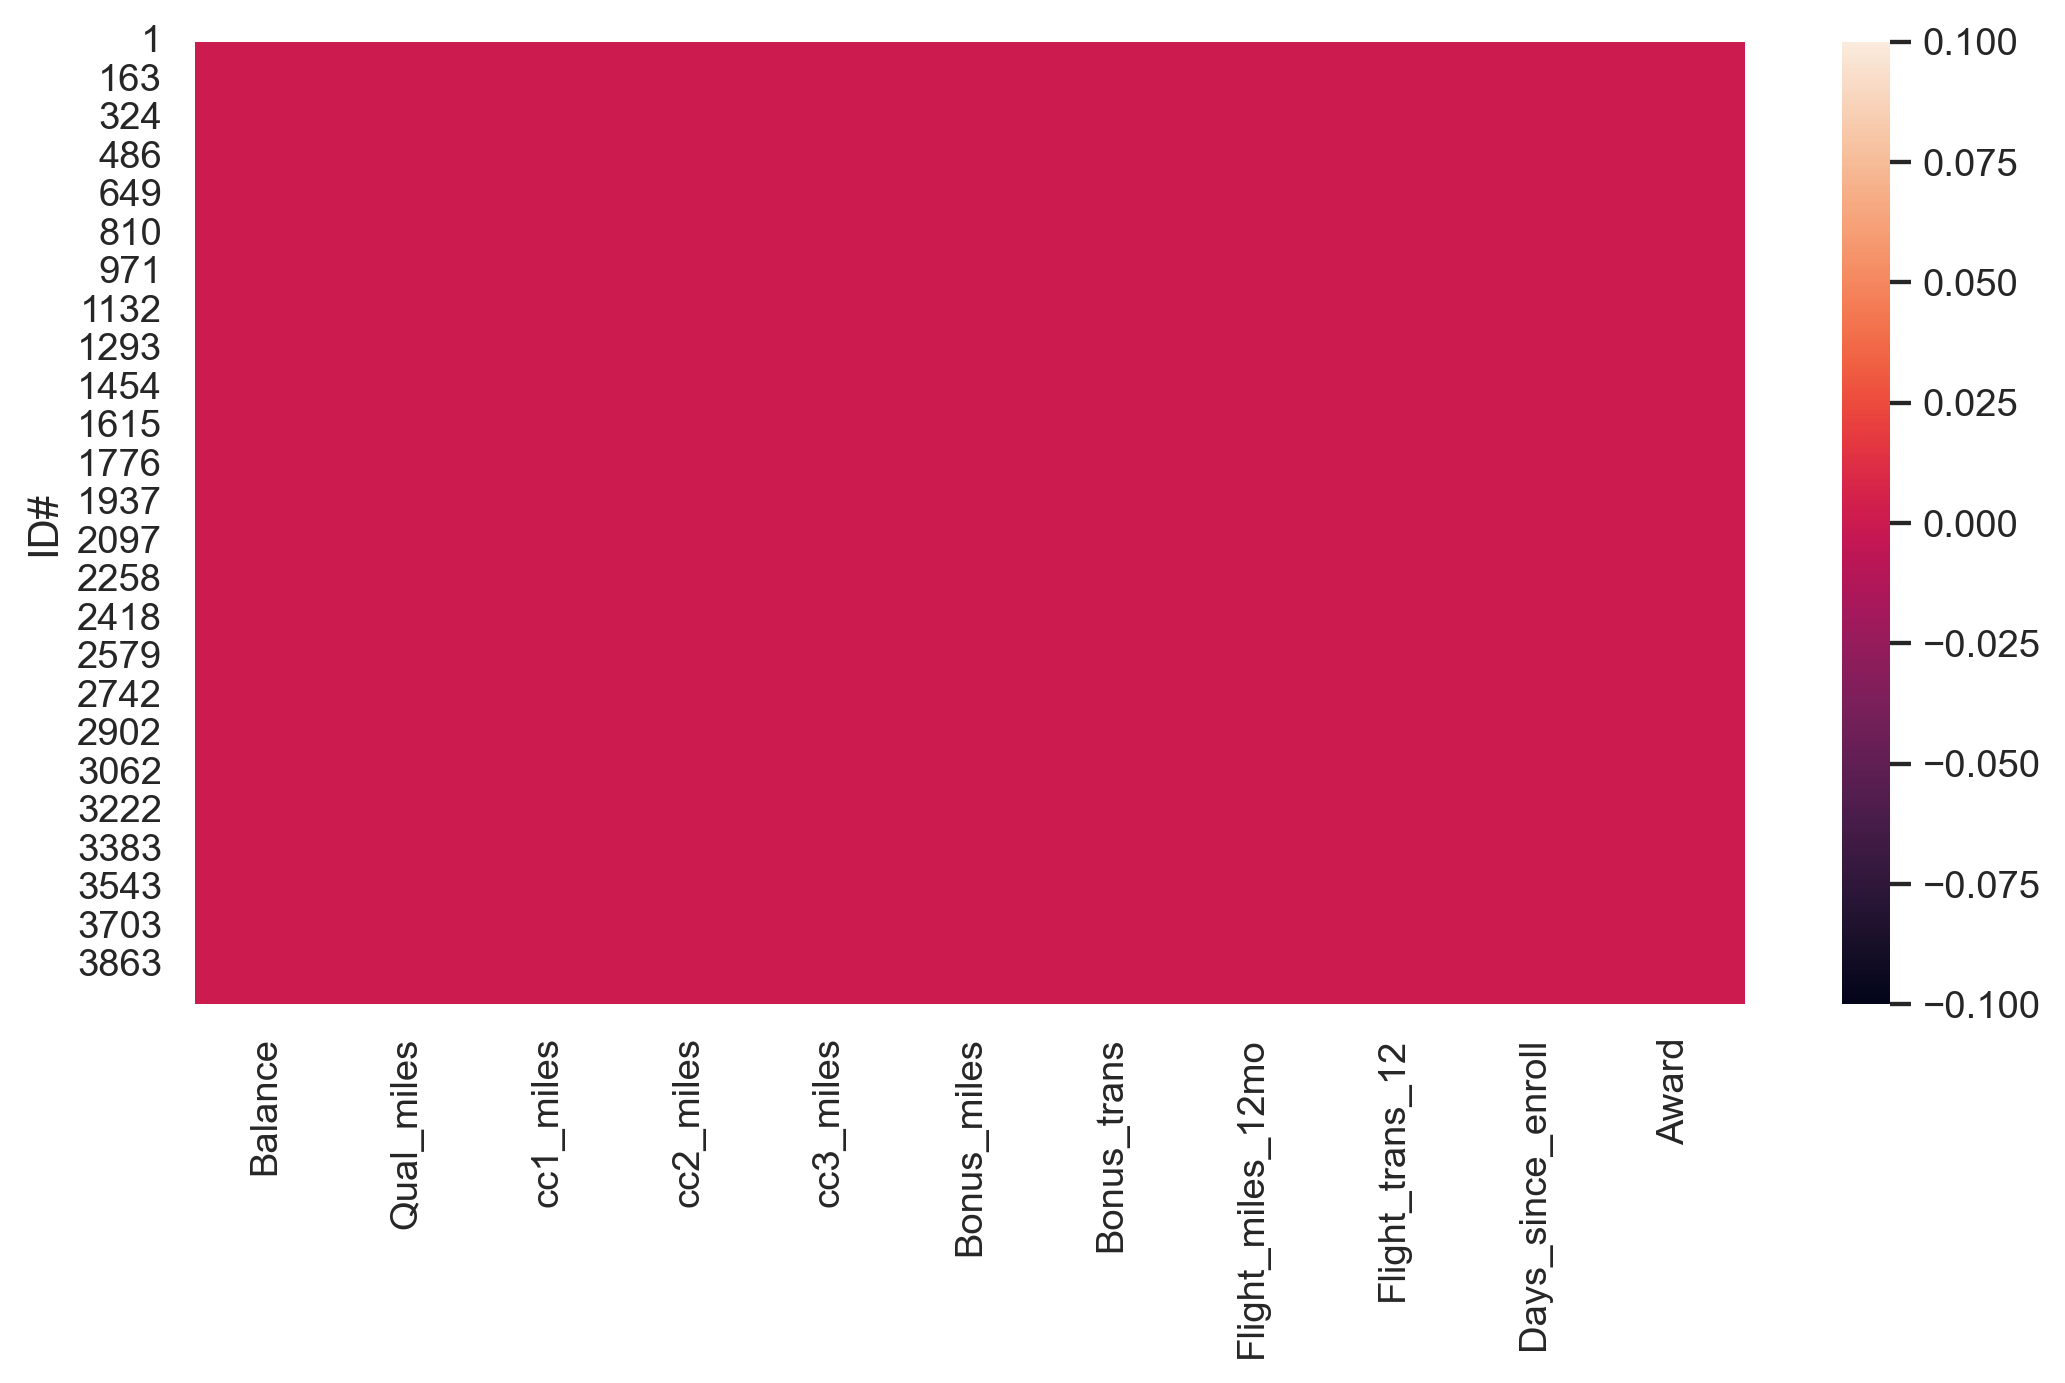

In [31]:
sns.heatmap(df.isnull())

# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [33]:
df.describe()

Balance    Qual_miles   cc1_miles    cc2_miles    cc3_miles  \
count  3.998000e+03   3998.000000  3998.00000  3998.000000  3998.000000   
mean   7.361949e+04    144.150575     2.05978     1.014507     1.012256   
std    1.007817e+05    773.757220     1.37699     0.147669     0.195265   
min    0.000000e+00      0.000000     1.00000     1.000000     1.000000   
25%    1.853425e+04      0.000000     1.00000     1.000000     1.000000   
50%    4.313800e+04      0.000000     1.00000     1.000000     1.000000   
75%    9.240500e+04      0.000000     3.00000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.00000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3998.000000  3998.000000        3998.000000      3998.000000   
mean    17149.134567    11.604802         460.170835         1.373937   
std     24152.465996     9.603258        1400.365407         3.793585   
min         0.000000     0.000000           0.000000         0.000000   
25%      1250.000000     3.000000           0.000000         0.000000   
50%      7183.000000    12.000000           0.000000         0.000000   
75%     23810.750000    17.000000         313.500000         1.000000   
max    263685.000000    86.000000       30817.000000        53.000000   

       Days_since_enroll        Award  
count        3998.000000  3998.000000  
mean         4119.190095     0.370435  
std          2065.007629     0.482982  
min             2.000000     0.000000  
25%          2331.250000     0.000000  
50%          4097.500000     0.000000  
75%          5790.750000     1.000000  
max          8296.000000     1.000000

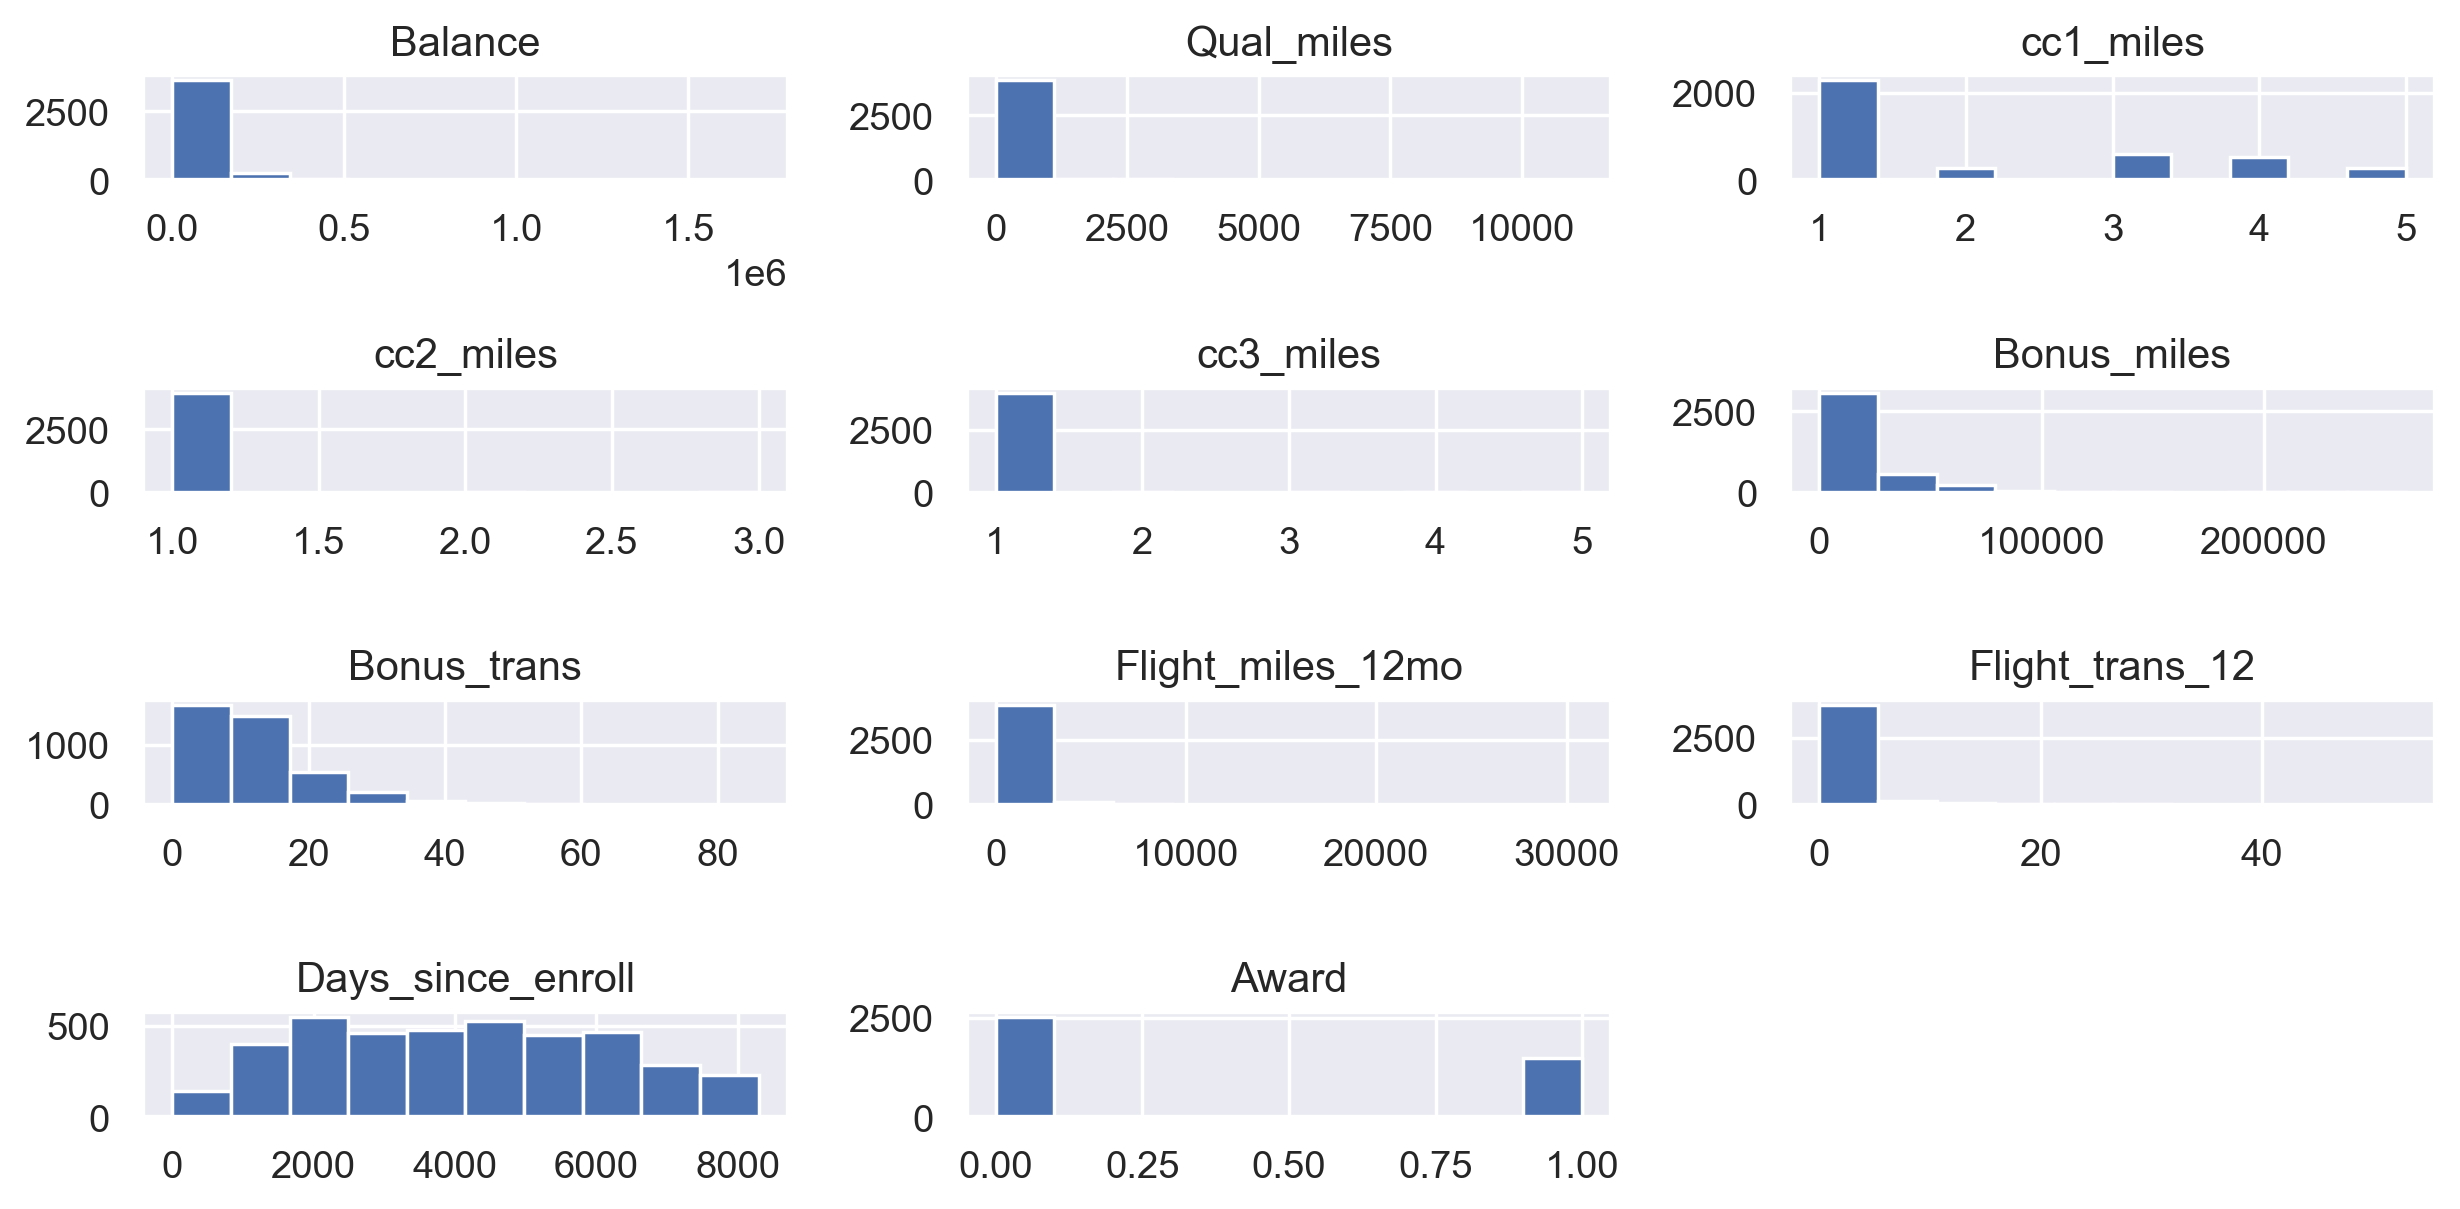

In [34]:
df.hist()
plt.tight_layout()

<Axes: >

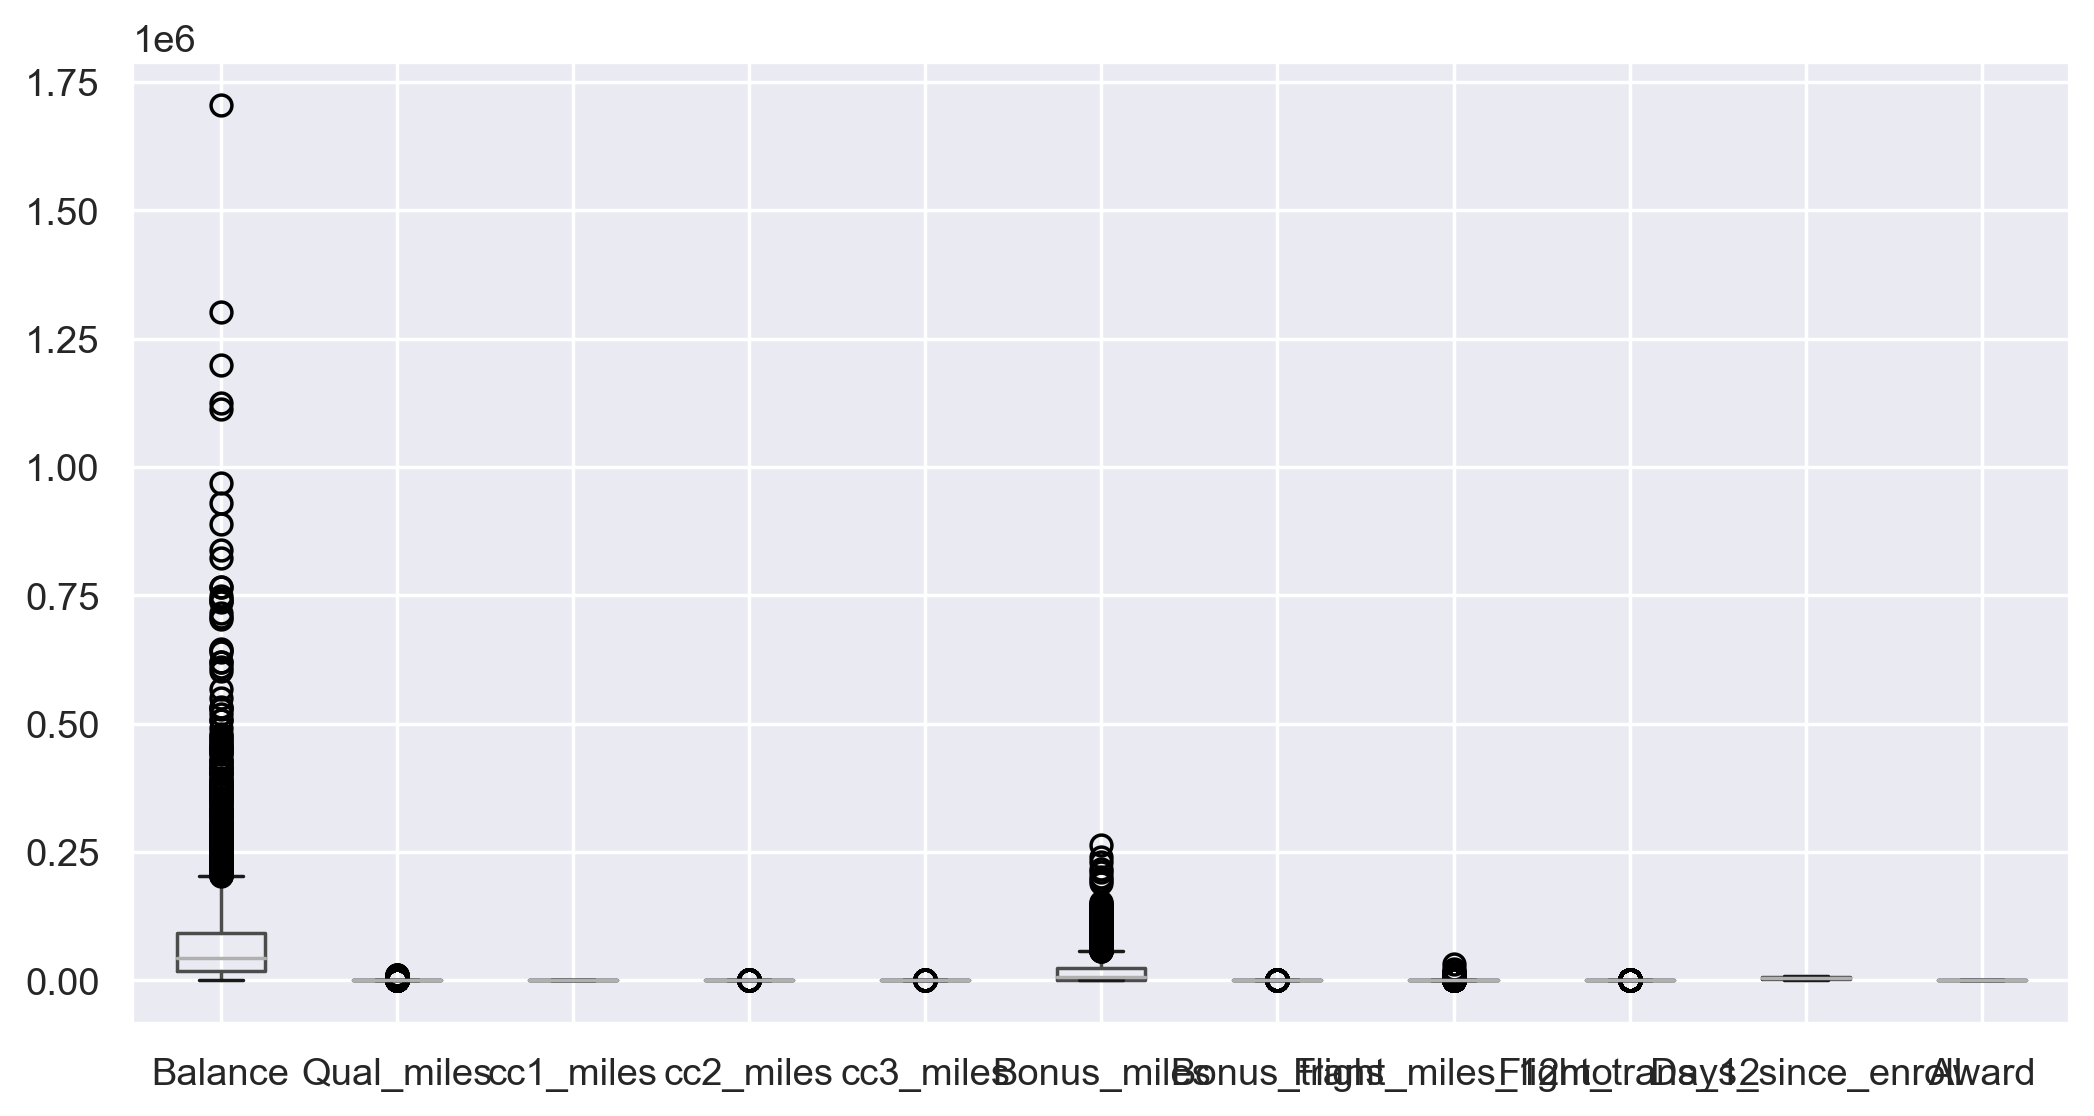

In [35]:
df.boxplot()

# While looking at the above box plot all the columns have outlier. Hence, before creating the model we should handle the outilers.

# Outlier detection function

In [41]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1
    
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    
    return lower, upper

In [42]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [43]:
outlier_detection(df, "Balance")

(-92271.875, 203211.125)

Text(0.5, 1.0, 'Before replacing the outlier with upper extreme values')

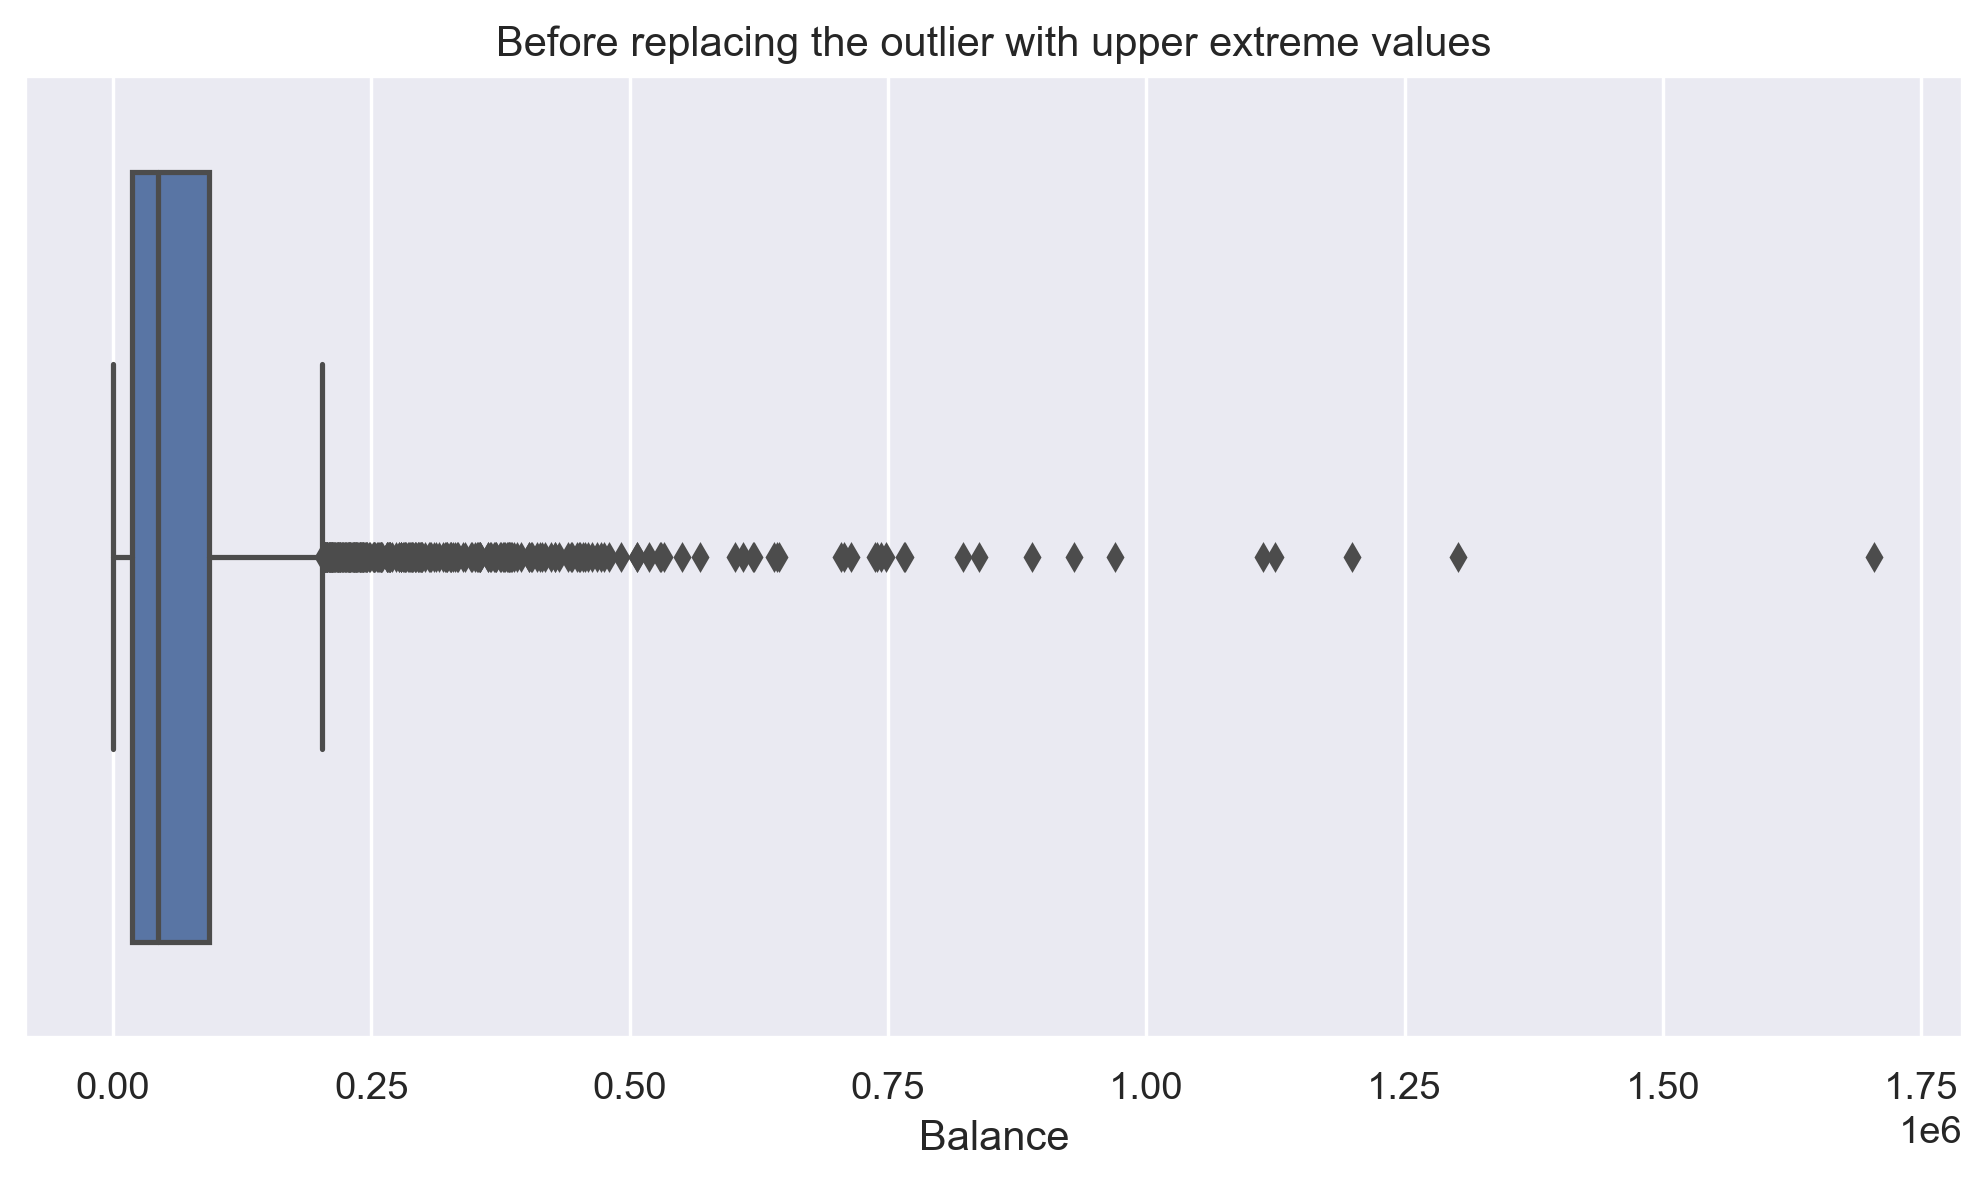

In [44]:
sns.boxplot(x =df["Balance"])
plt.xlabel("Balance")
plt.title("Before replacing the outlier with upper extreme values")

In [45]:
df[df["Balance"]>203211.125]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
9      443003           0          3          2          1         1753   
25     205651         500          1          1          1         4025   
33     276571           0          4          1          1        42044   
44     619393           0          3          1          1        15008   
46     288865         967          1          1          1        23600   
...       ...         ...        ...        ...        ...          ...   
3777   221543           0          1          1          1        10300   
3779   203353           0          1          1          1        14000   
3795   822321           0          5          1          1       138334   
3811   374613           0          1          2          1        23592   
3862   204693           0          1          1          1         5159   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
9              43               3850               12               6948   
25             21                700                4               7932   
33             23                  0                0               7872   
44             14                  0                0               7819   
46             14               2000                4               6884   
...           ...                ...              ...                ...   
3777            5                200                3               3554   
3779           13               4000                8               3557   
3795           26                600                2               3288   
3811           31               5000               14               3463   
3862            5                  0                0               1672   

      Award  
ID#          
9         1  
25        0  
33        0  
44        1  
46        1  
...     ...  
3777      1  
3779      1  
3795      1  
3811      1  
3862      0  

[266 rows x 11 columns]

# Capping Outliers

In [47]:
df.loc[df["Balance"]>203211.125, "Balance"] = 203211.125

Text(0.5, 1.0, 'After replacing the outlier with upper extreme values')

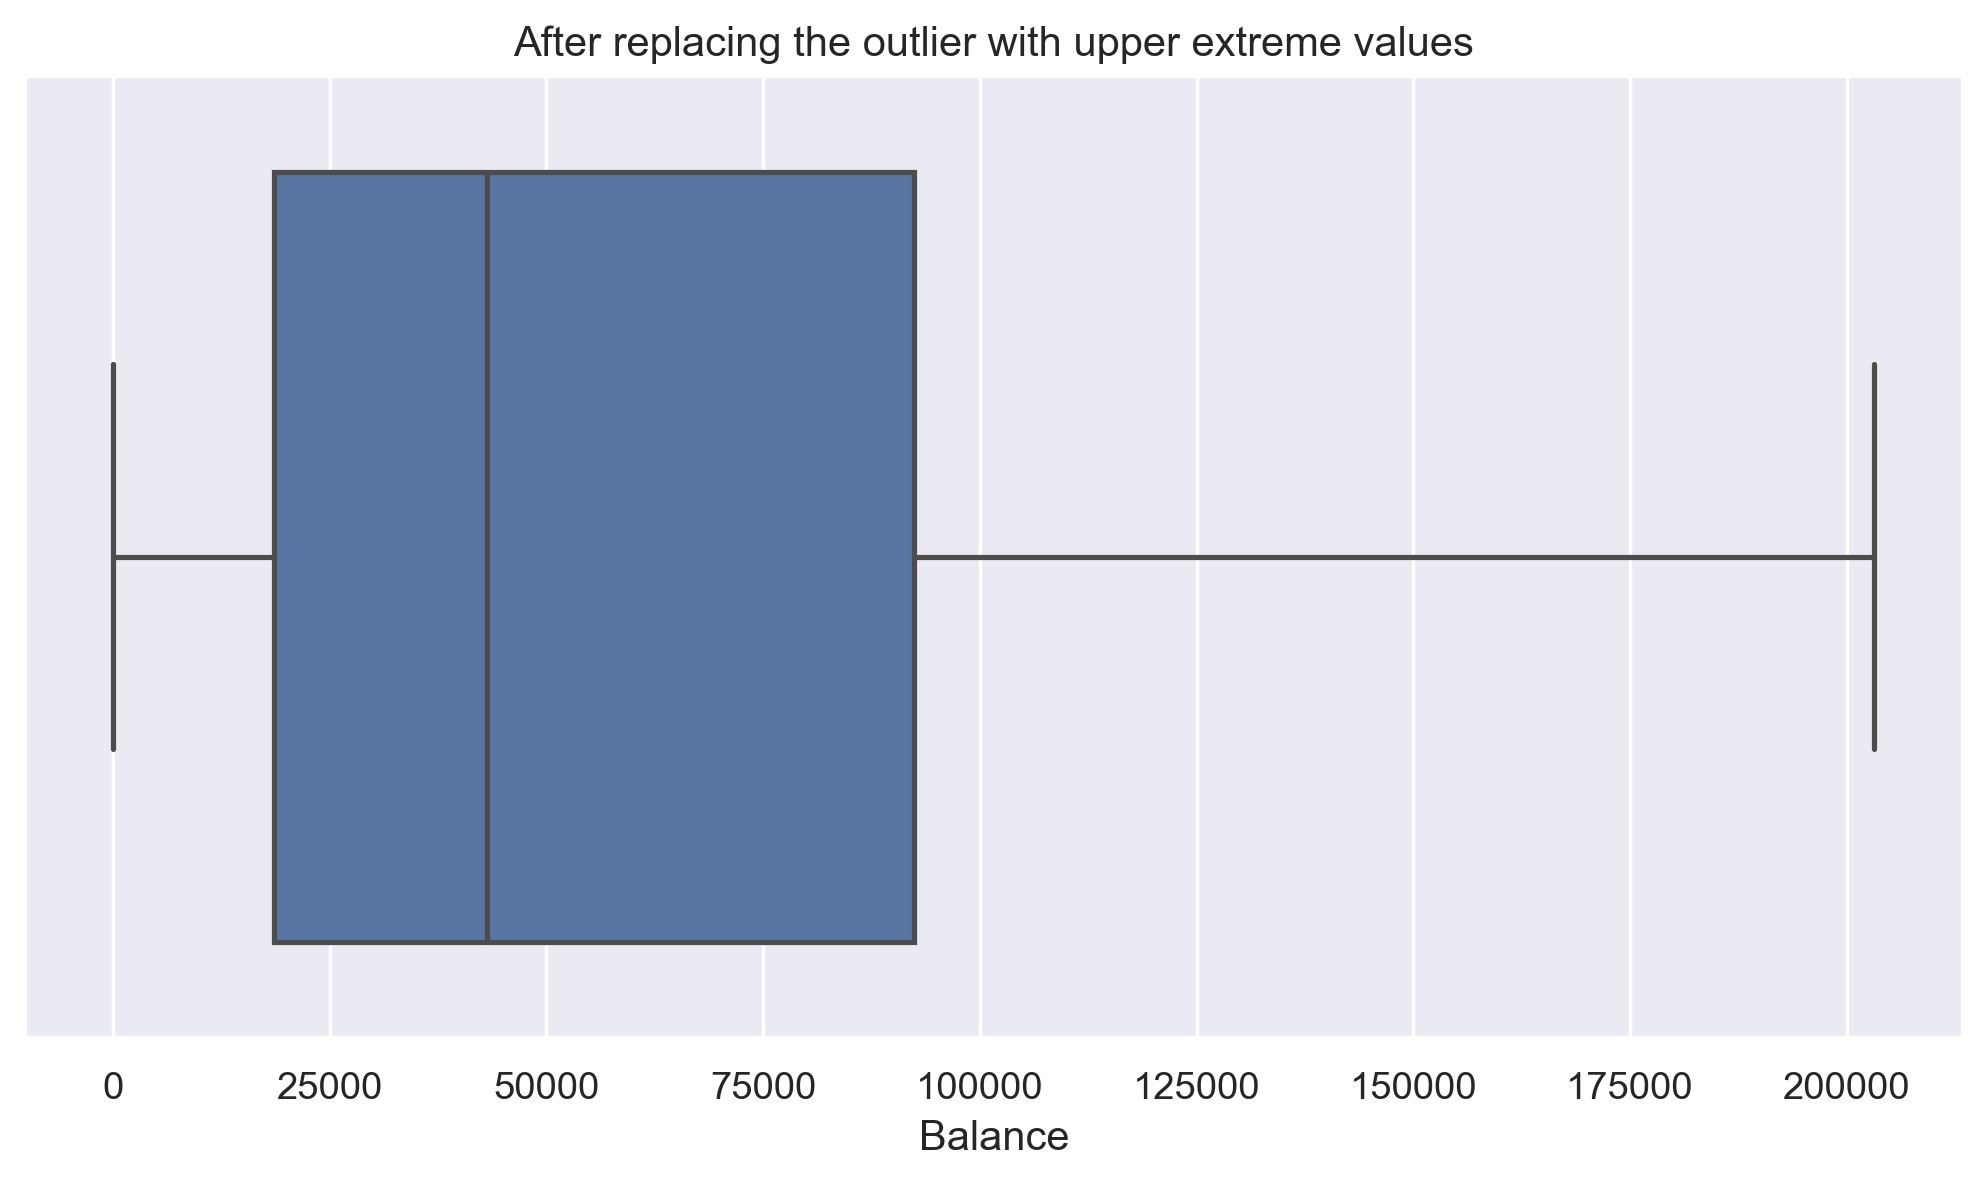

In [48]:
sns.boxplot(x =df["Balance"])
plt.xlabel("Balance")
plt.title("After replacing the outlier with upper extreme values")

In [49]:
outlier_detection(df, "Qual_miles")

(0.0, 0.0)

Text(0.5, 1.0, 'Before the replacing outiler with upper extreme values')

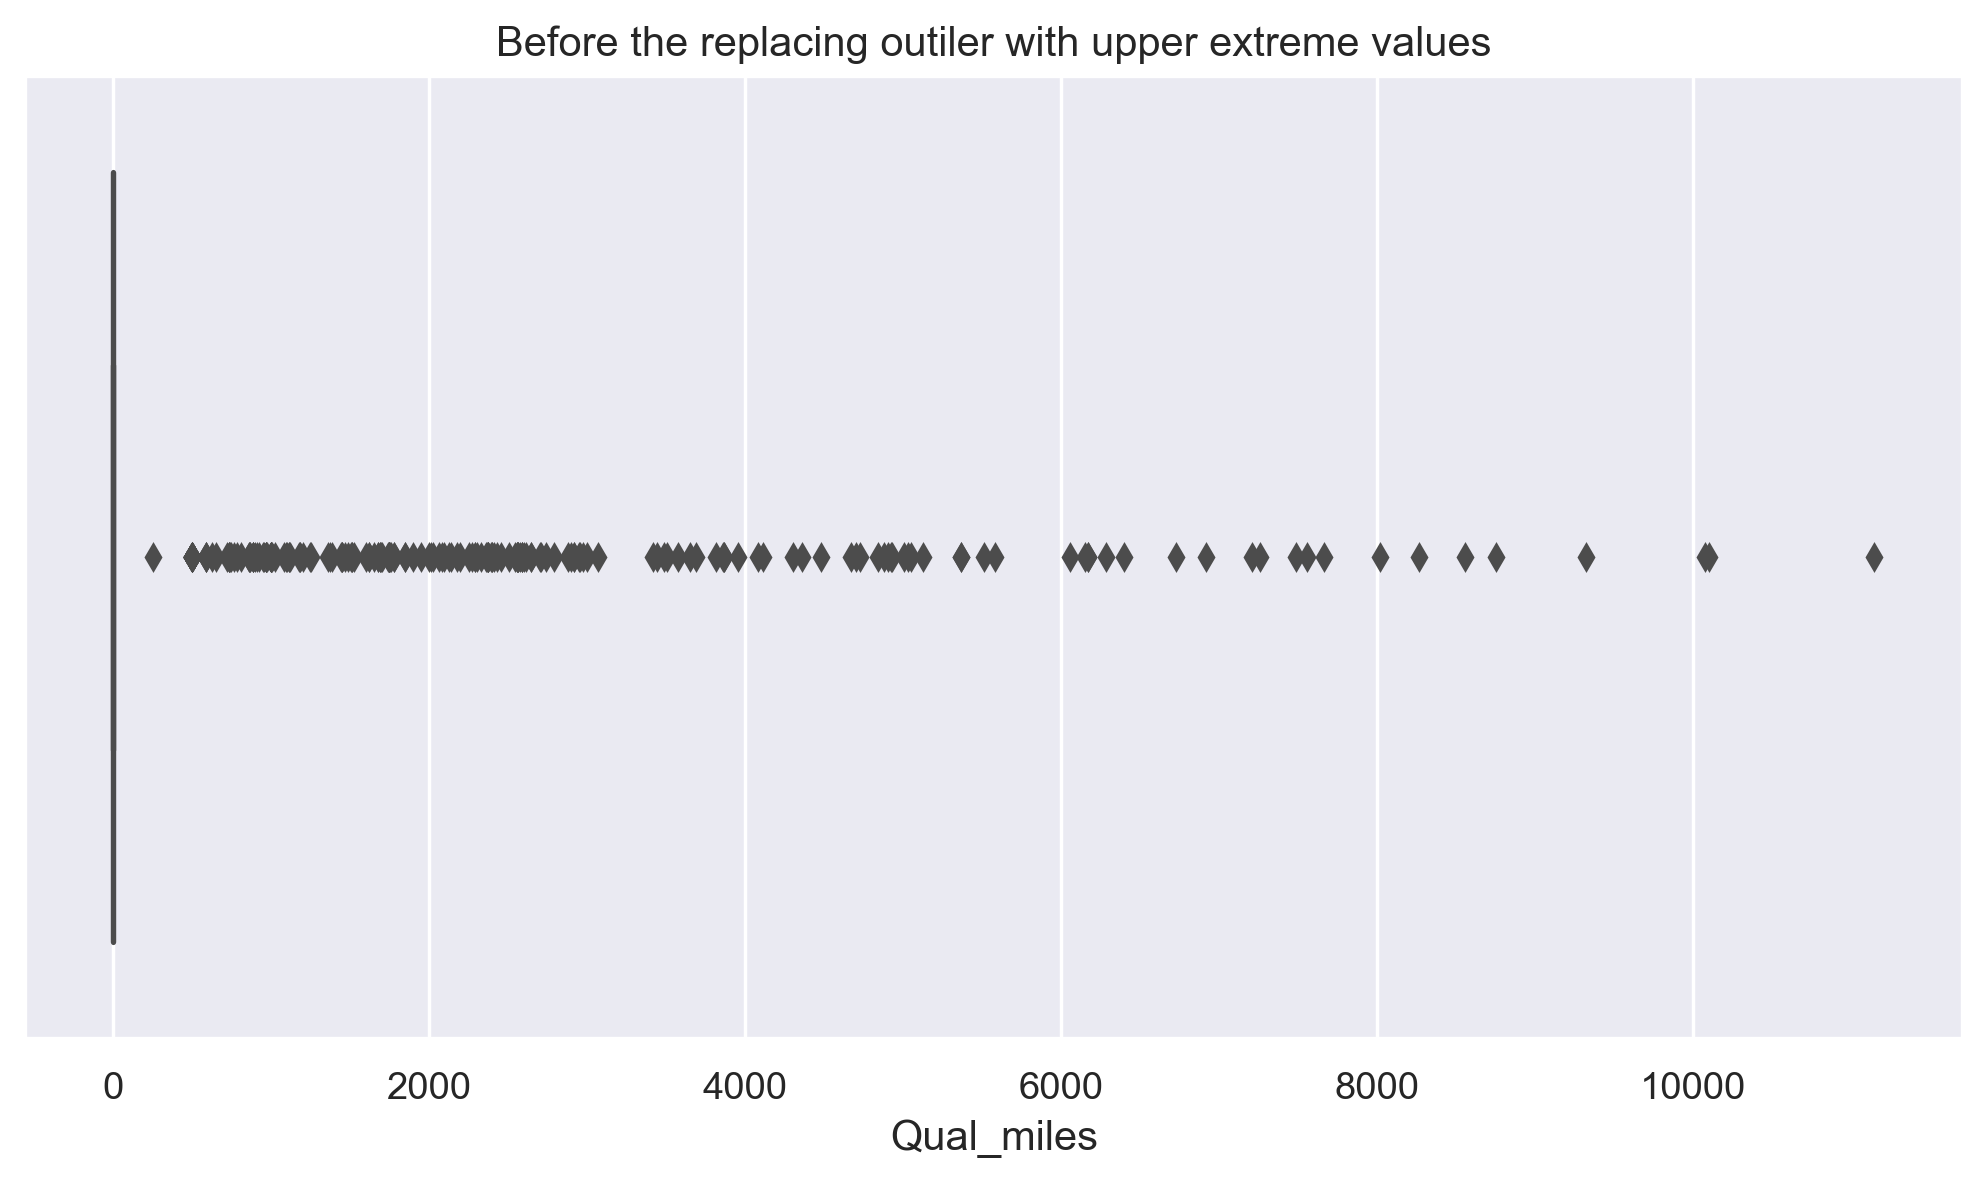

In [51]:
sns.boxplot(x =df["Qual_miles"])
plt.xlabel("Qual_miles")
plt.title("Before the replacing outiler with upper extreme values")

In [53]:
df.loc[df["Qual_miles"]>0.0, "Qual_miles"] = 0.0

Text(0.5, 1.0, 'After the replacing outiler with upper extreme values')

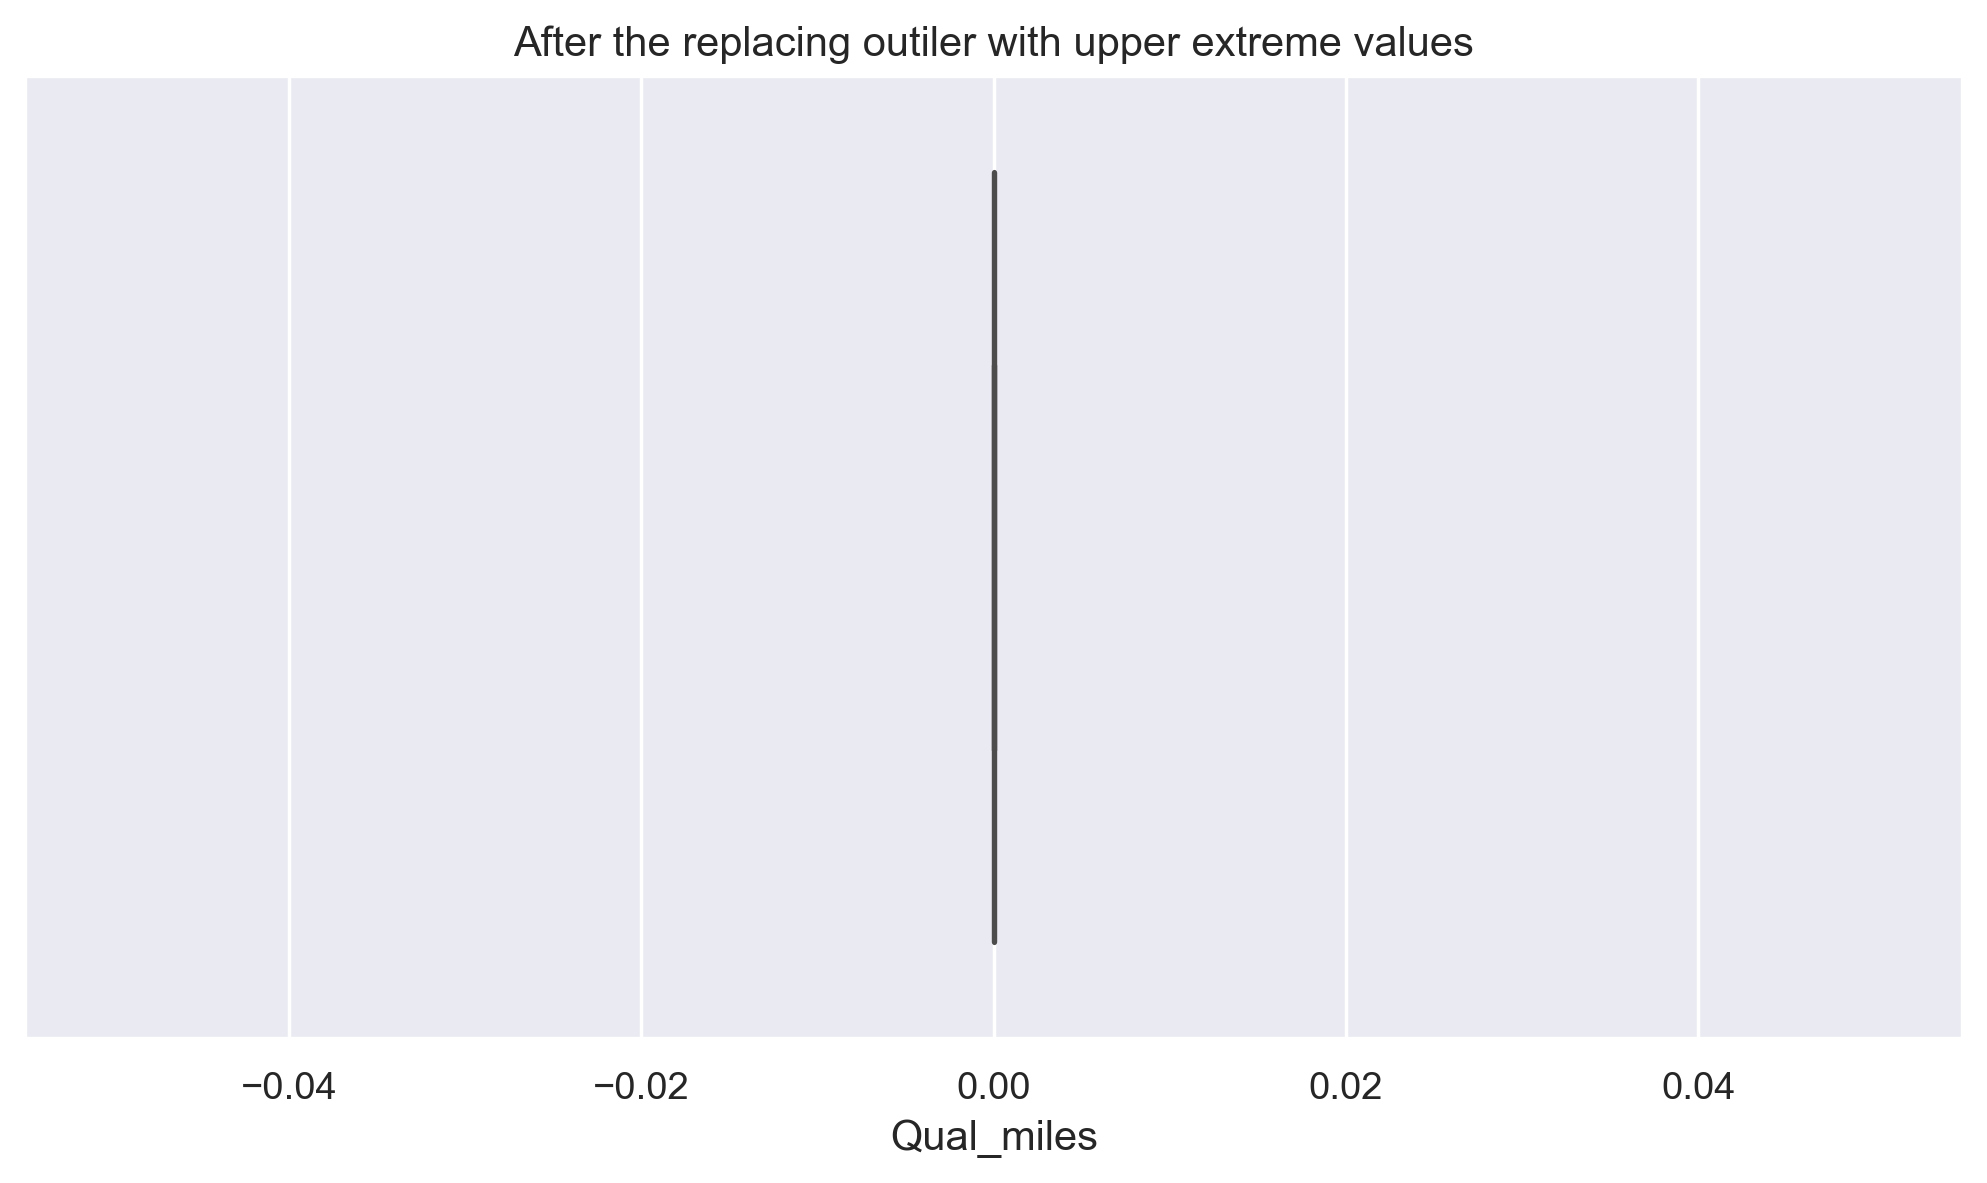

In [54]:
sns.boxplot(x =df["Qual_miles"])
plt.xlabel("Qual_miles")
plt.title("After the replacing outiler with upper extreme values")

In [61]:
outlier_detection(df, "cc2_miles")

(1.0, 1.0)

In [59]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

Text(0.5, 1.0, 'Before the outliers replacing with upper extreme values')

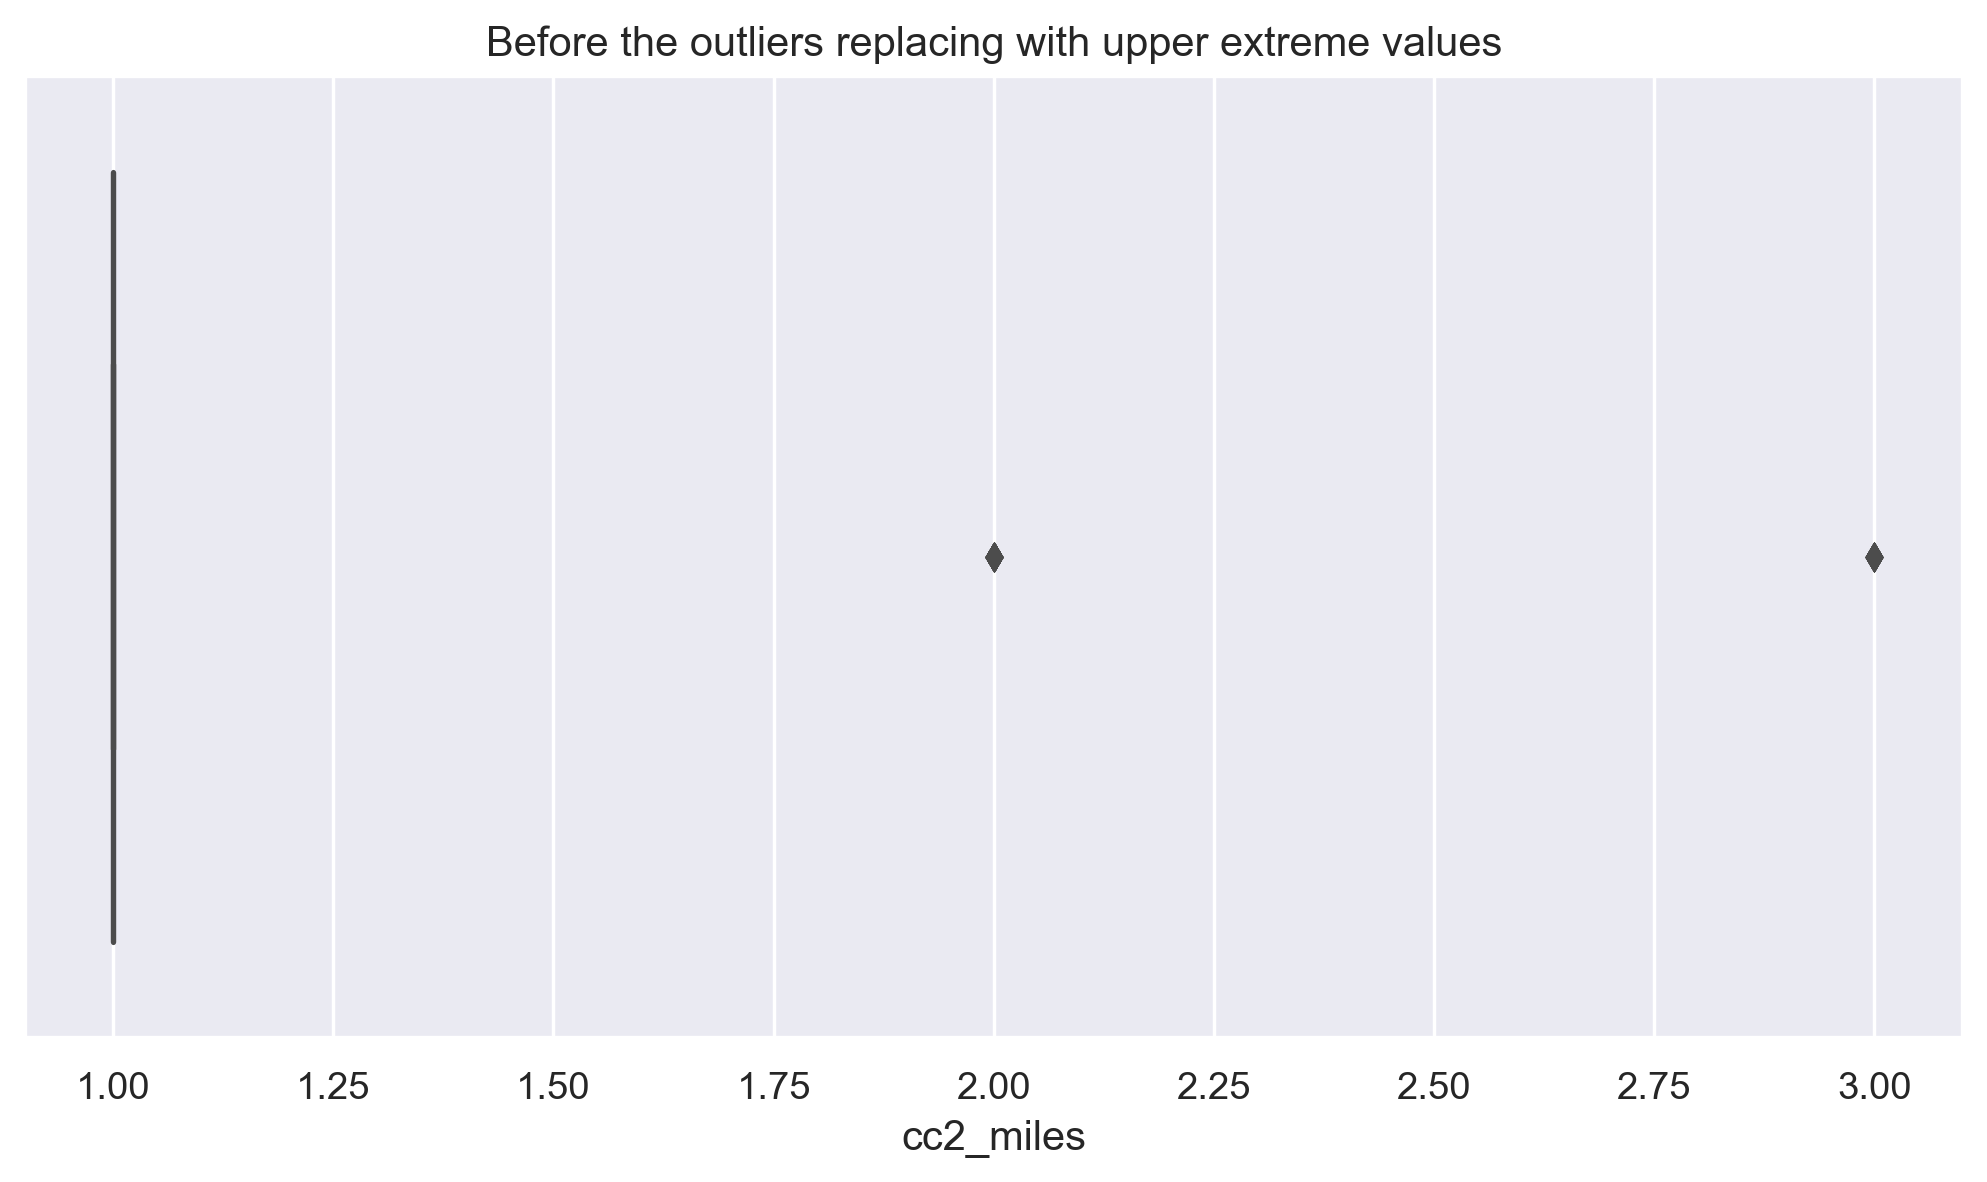

In [62]:
sns.boxplot(x = df["cc2_miles"])
plt.xlabel("cc2_miles")
plt.title("Before the outliers replacing with upper extreme values")

In [64]:
df.loc[df["cc2_miles"]>1.0, "cc2_miles"] = 1.0

Text(0.5, 1.0, 'After the outliers replacing with upper extreme values')

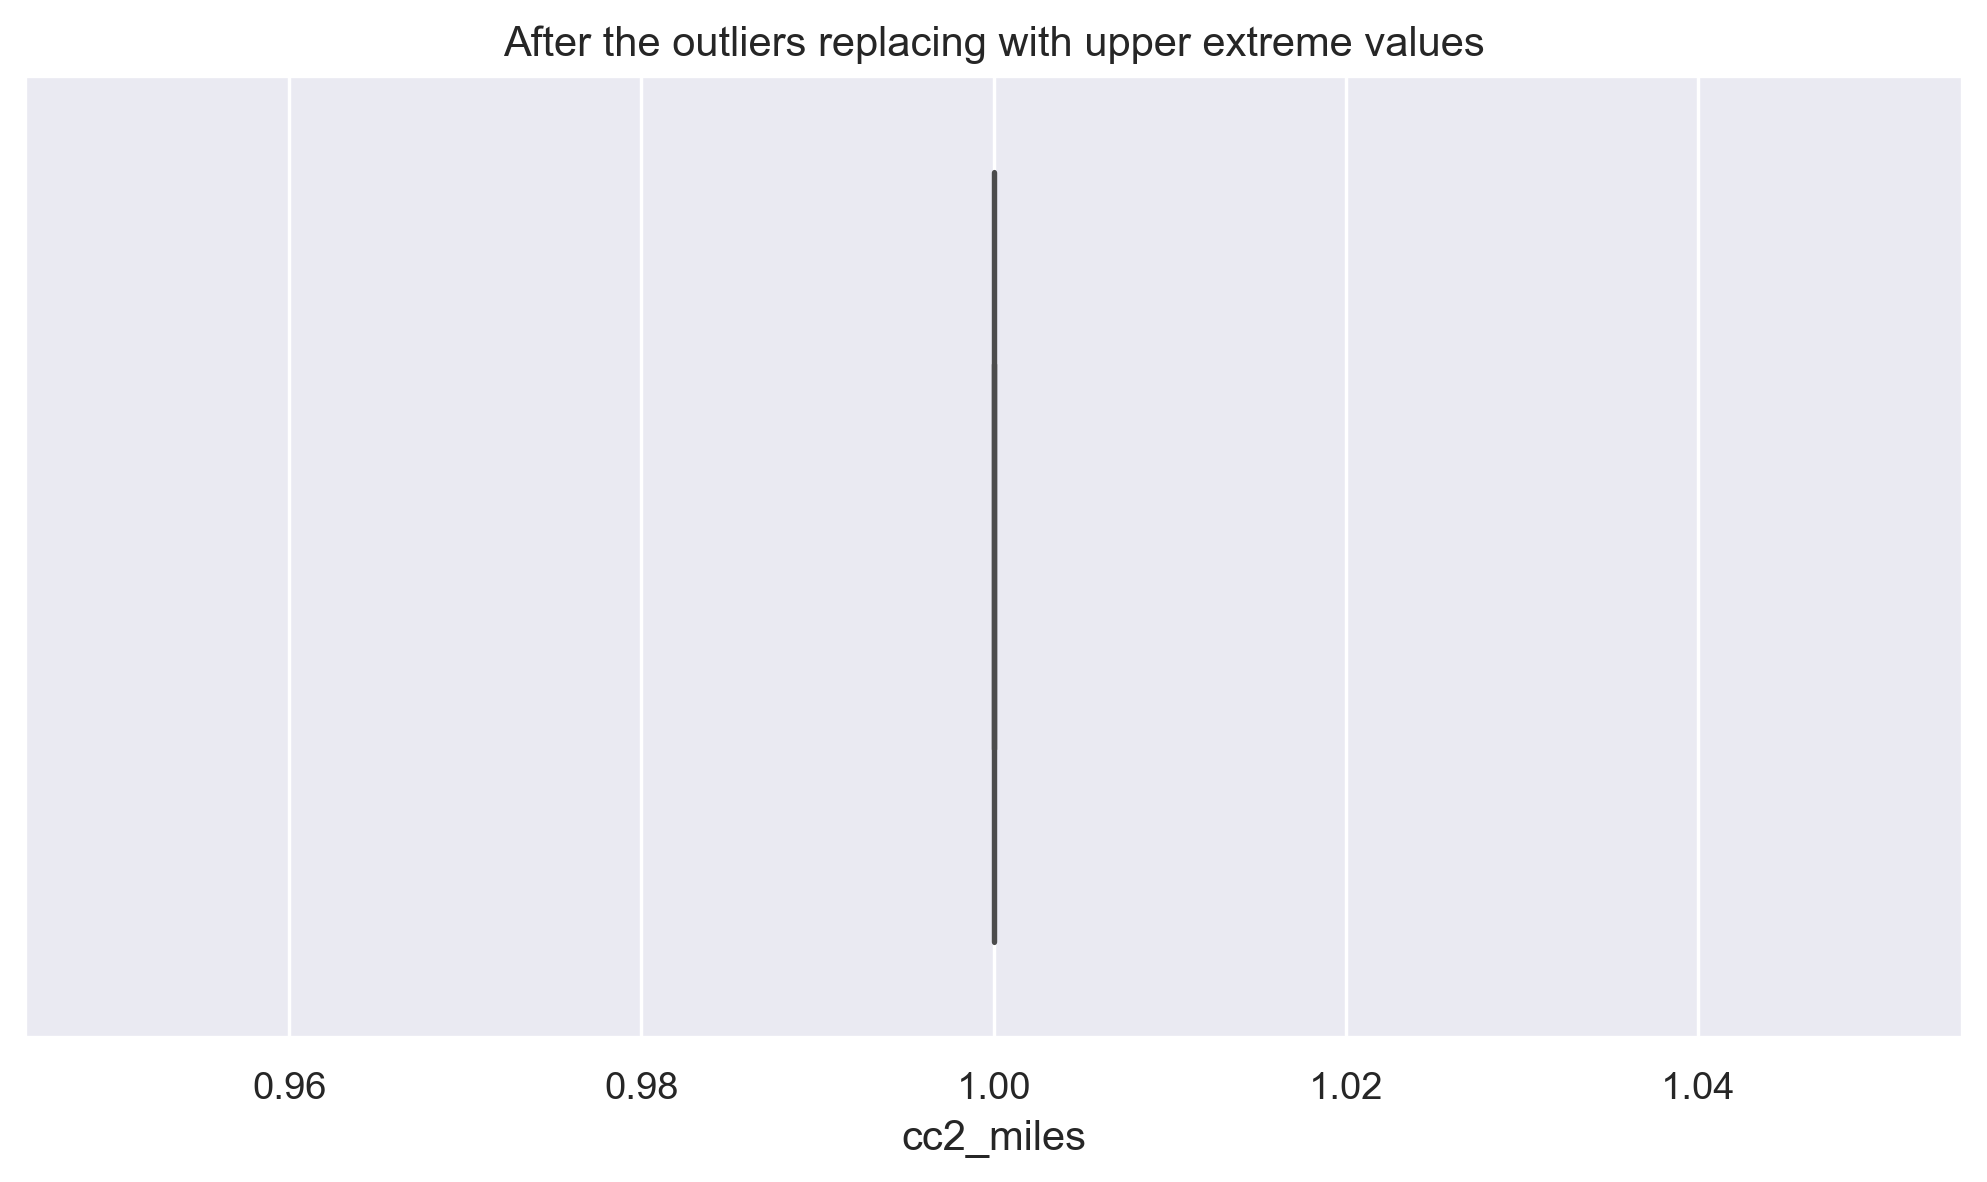

In [65]:
sns.boxplot(x = df["cc2_miles"])
plt.xlabel("cc2_miles")
plt.title("After the outliers replacing with upper extreme values")

In [67]:
outlier_detection(df, "cc3_miles")

(1.0, 1.0)

Text(0.5, 1.0, 'Before the outliers replacing with upper extreme values')

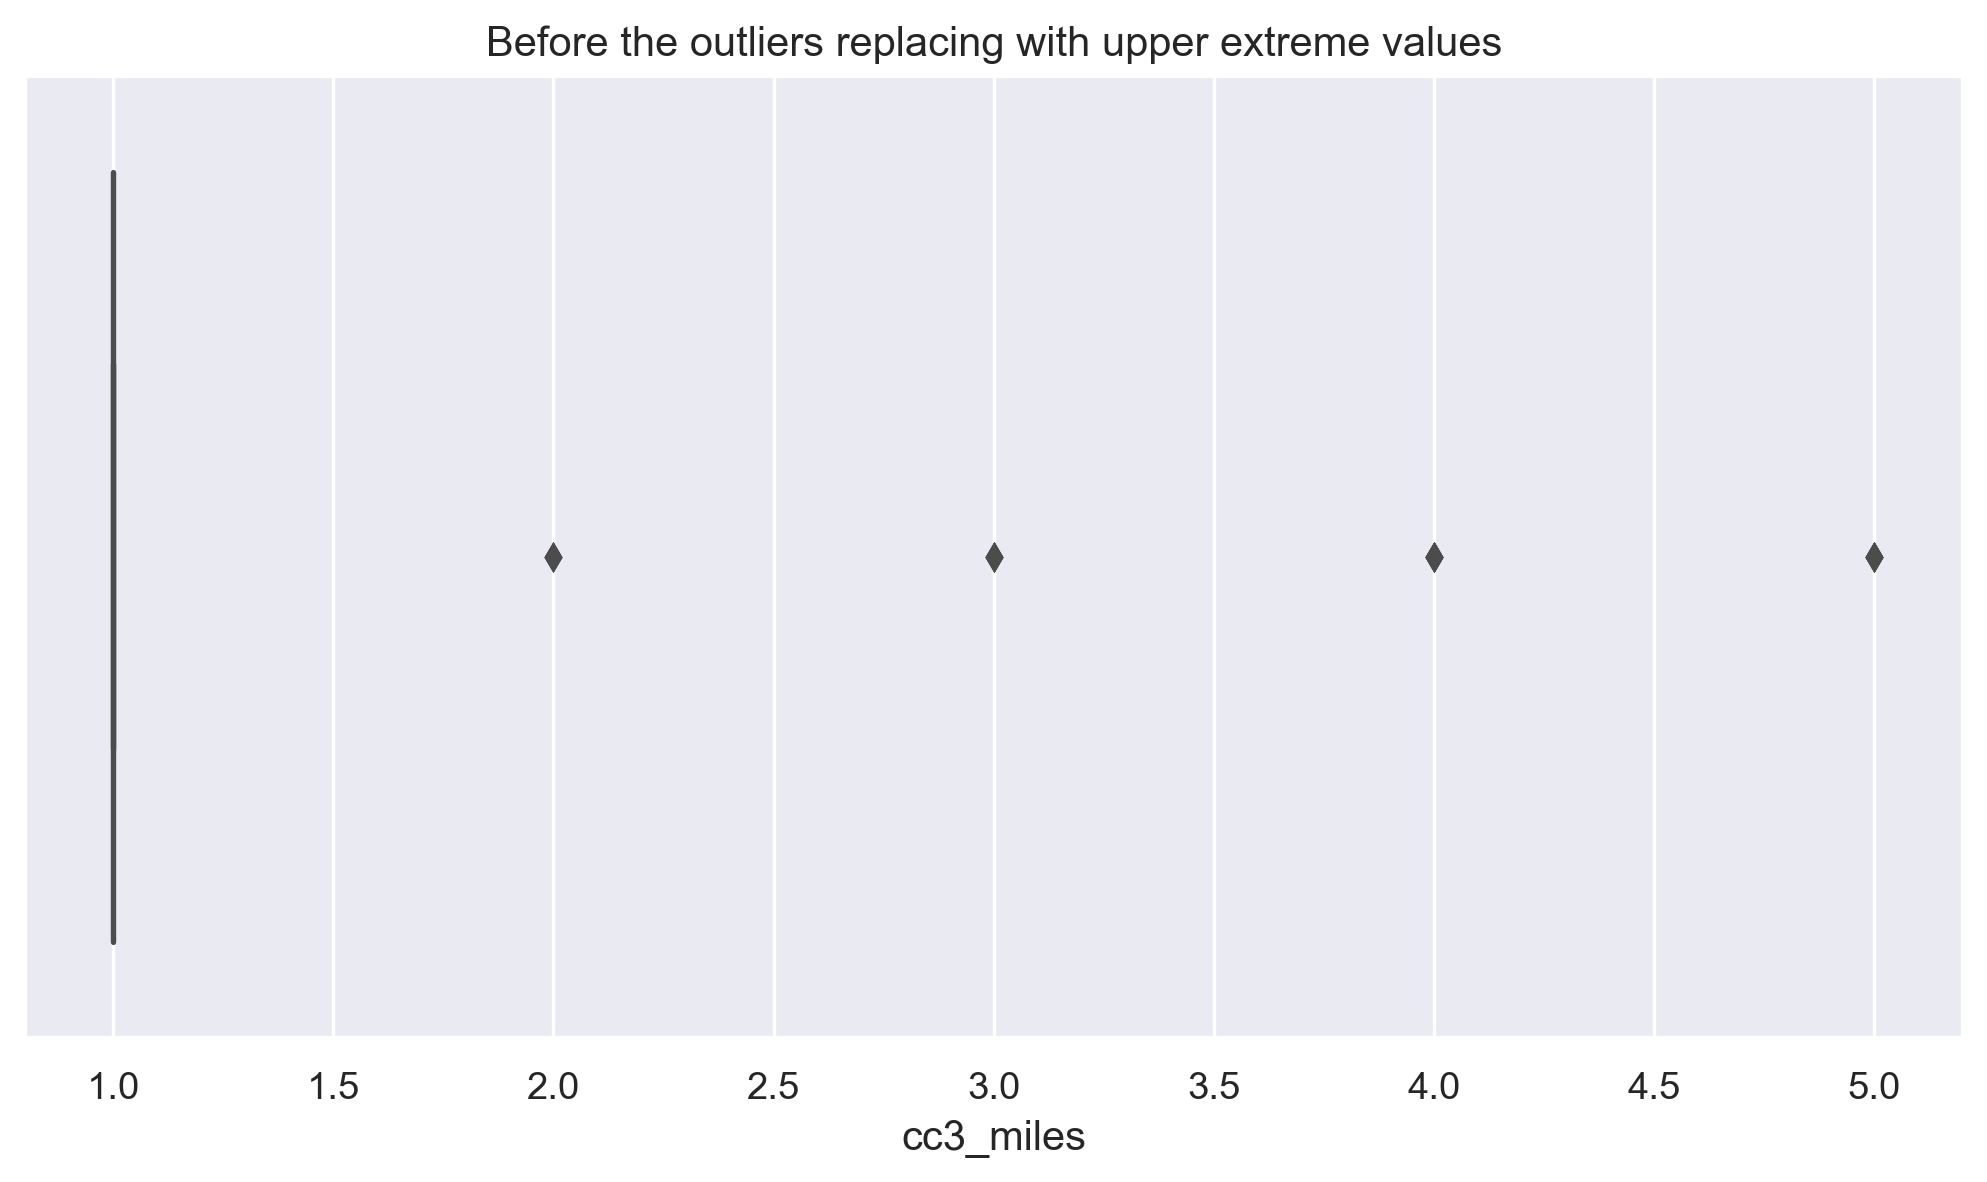

In [68]:
sns.boxplot(x = df["cc3_miles"])
plt.xlabel("cc3_miles")
plt.title("Before the outliers replacing with upper extreme values")

In [70]:
df.loc[df["cc3_miles"]>1.0, "cc3_miles"] = 1.0

Text(0.5, 1.0, 'After the outliers replacing with upper extreme values')

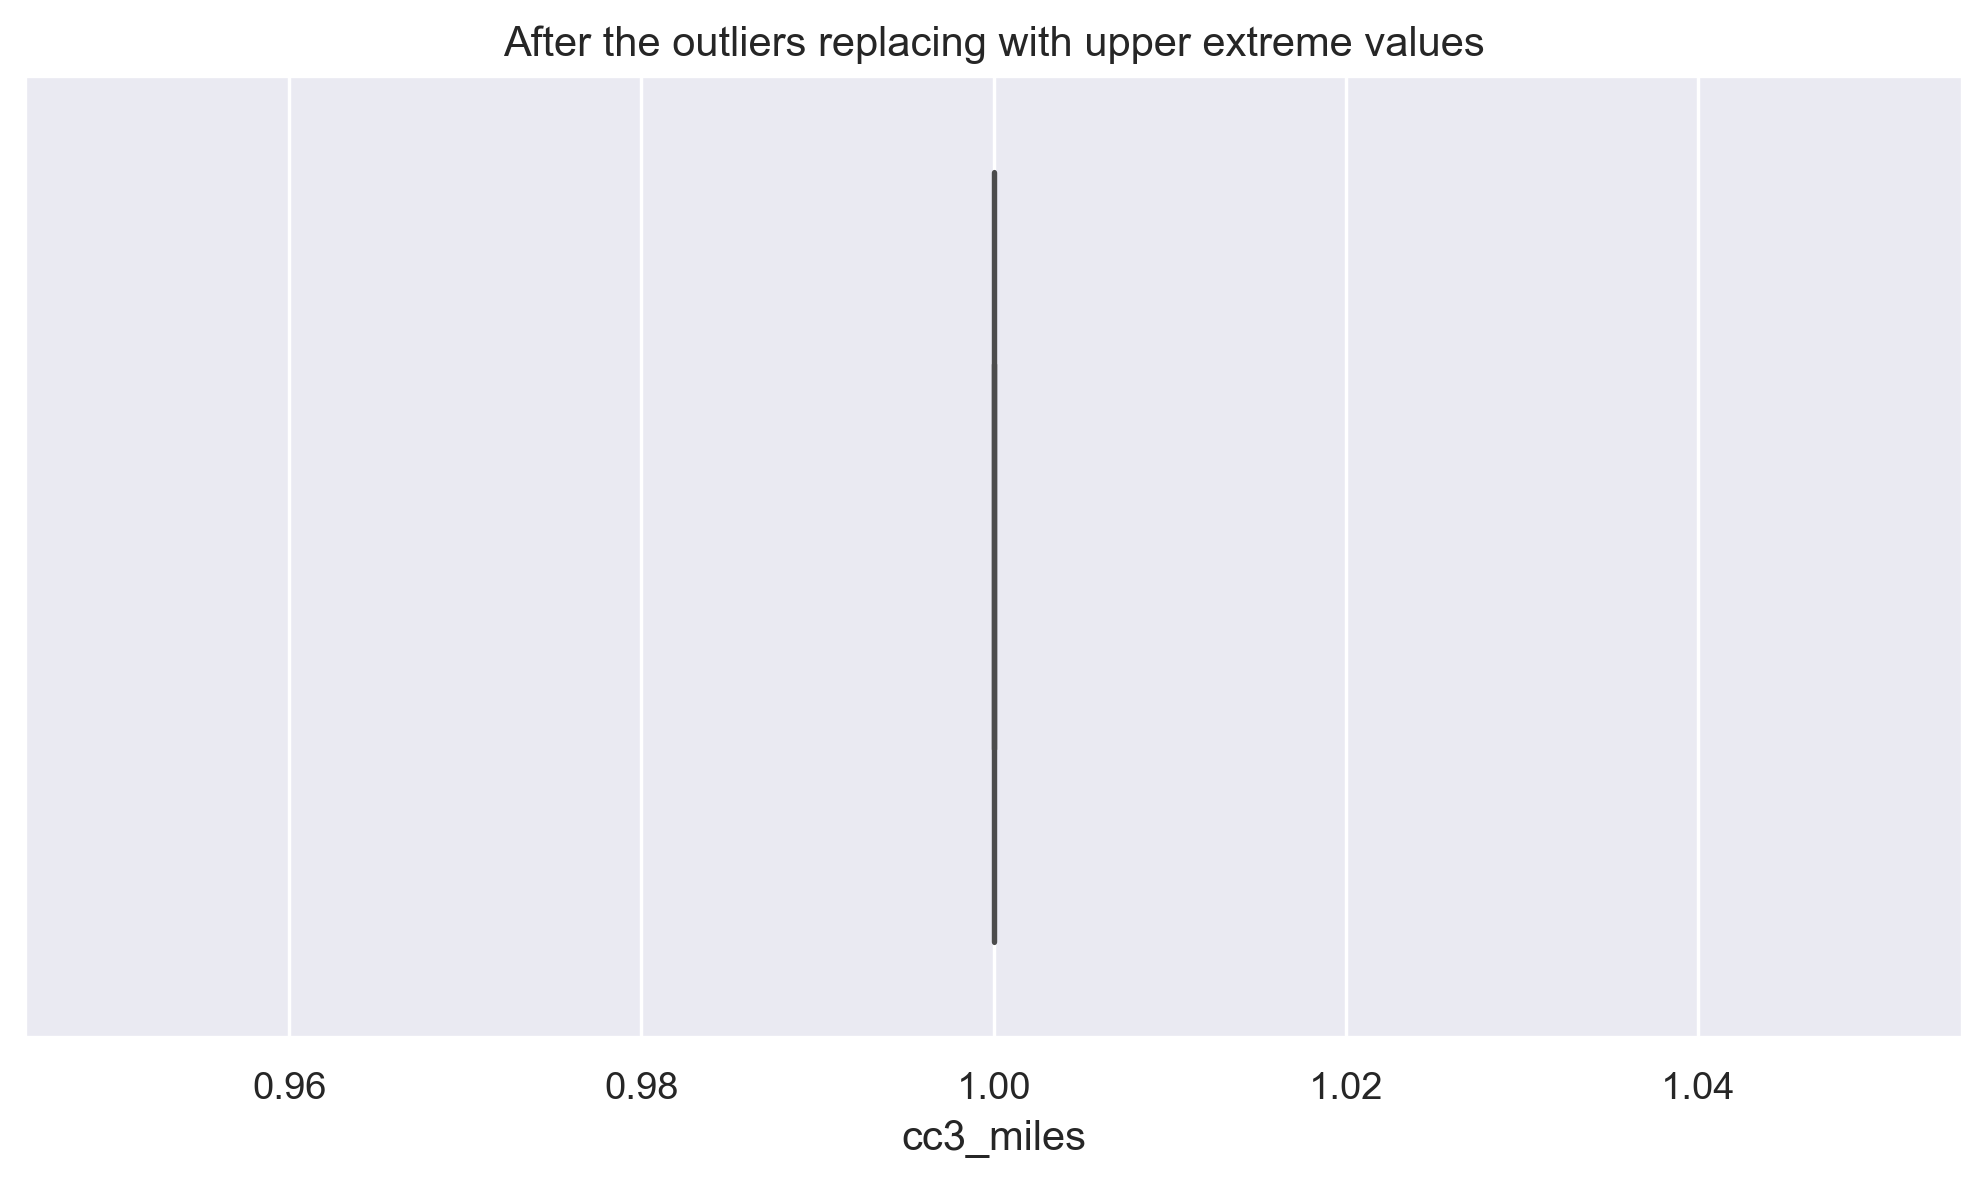

In [71]:
sns.boxplot(x = df["cc3_miles"])
plt.xlabel("cc3_miles")
plt.title("After the outliers replacing with upper extreme values")

In [73]:
outlier_detection(df, "Bonus_miles")

(-32591.125, 57651.875)

Text(0.5, 1.0, 'Before the outliers replacing with upper extreme values')

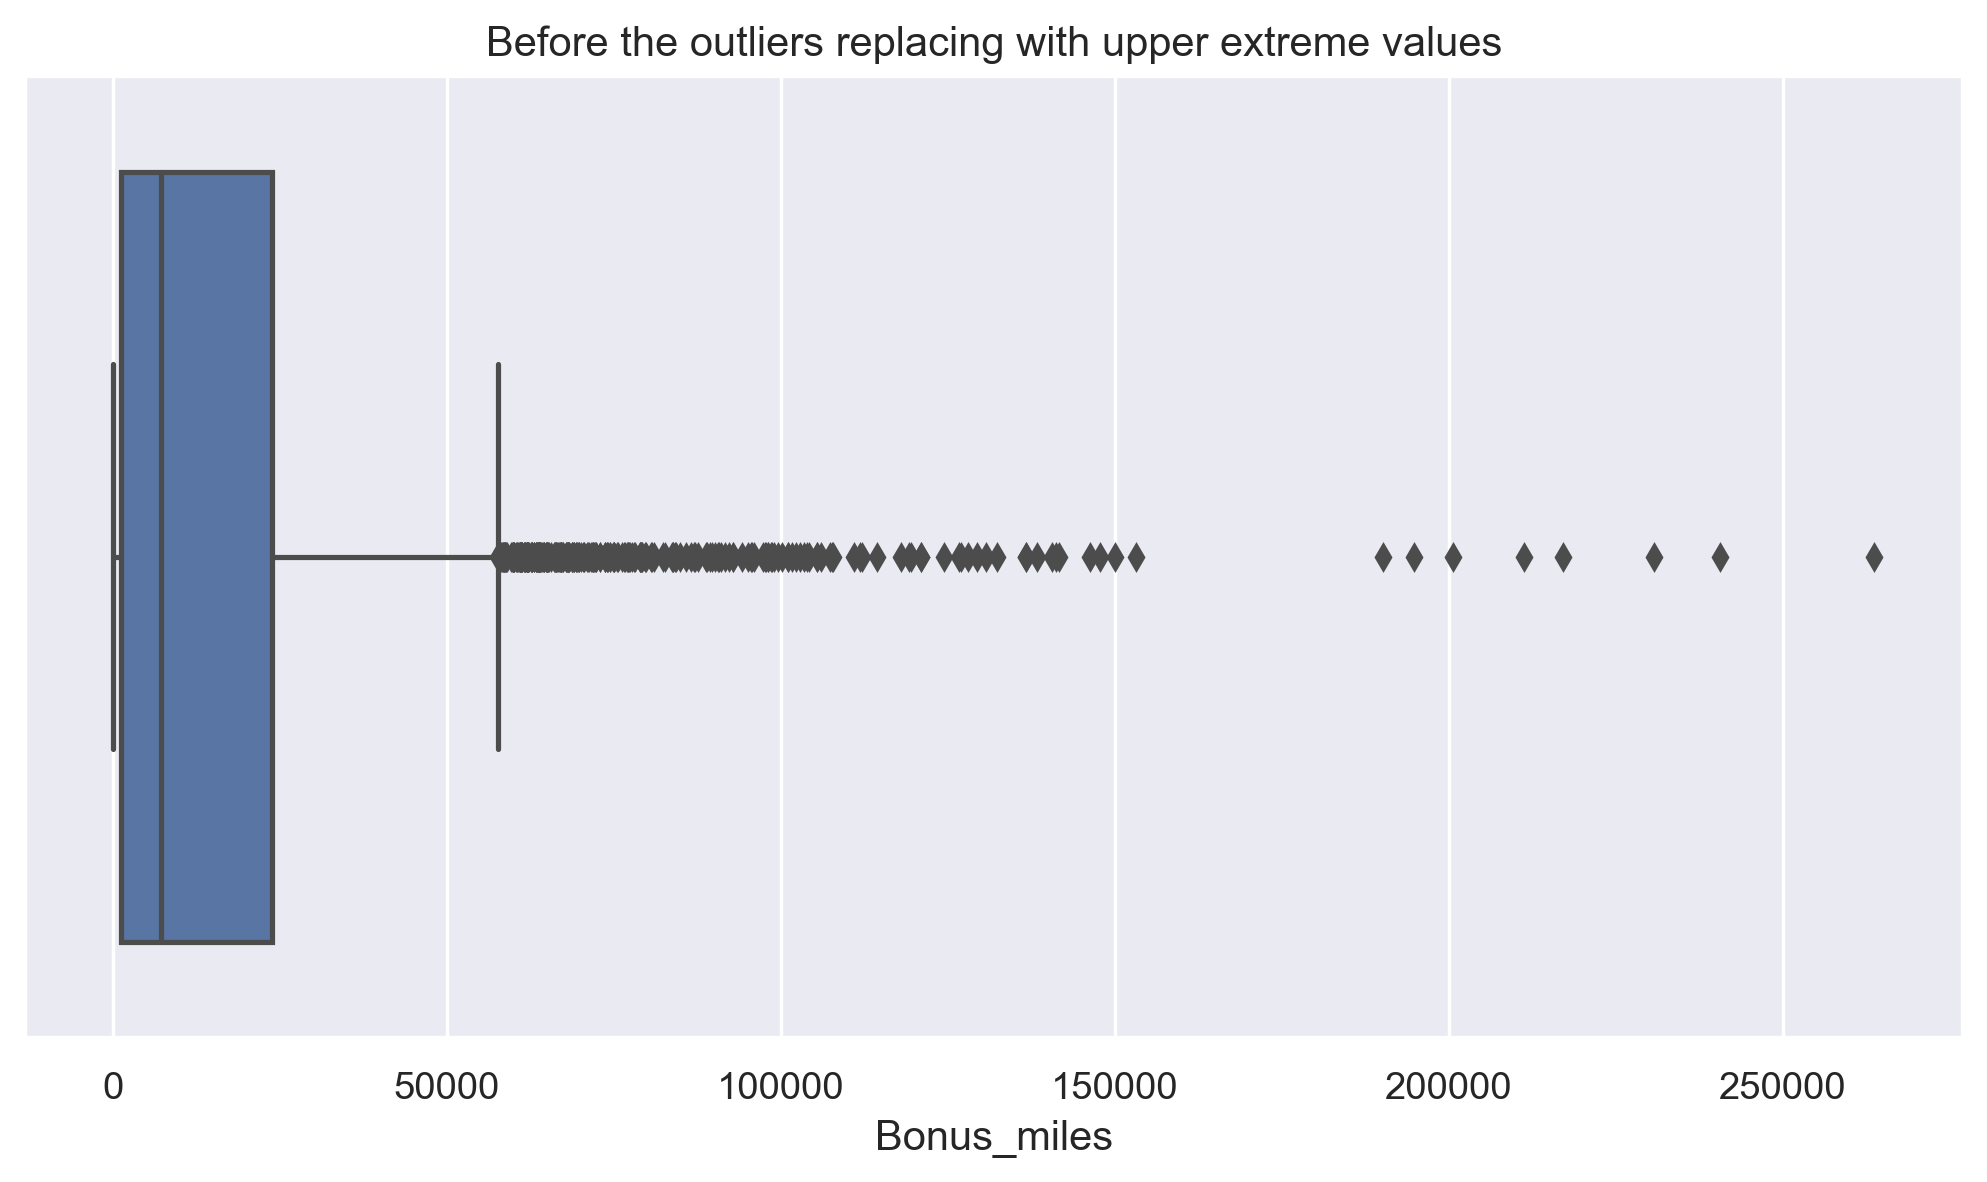

In [74]:
sns.boxplot(x = df["Bonus_miles"])
plt.xlabel("Bonus_miles")
plt.title("Before the outliers replacing with upper extreme values")

In [77]:
df.loc[df["Bonus_miles"]>57651.875, "Bonus_miles"] = 57651.875

Text(0.5, 1.0, 'After the outliers replacing with upper extreme values')

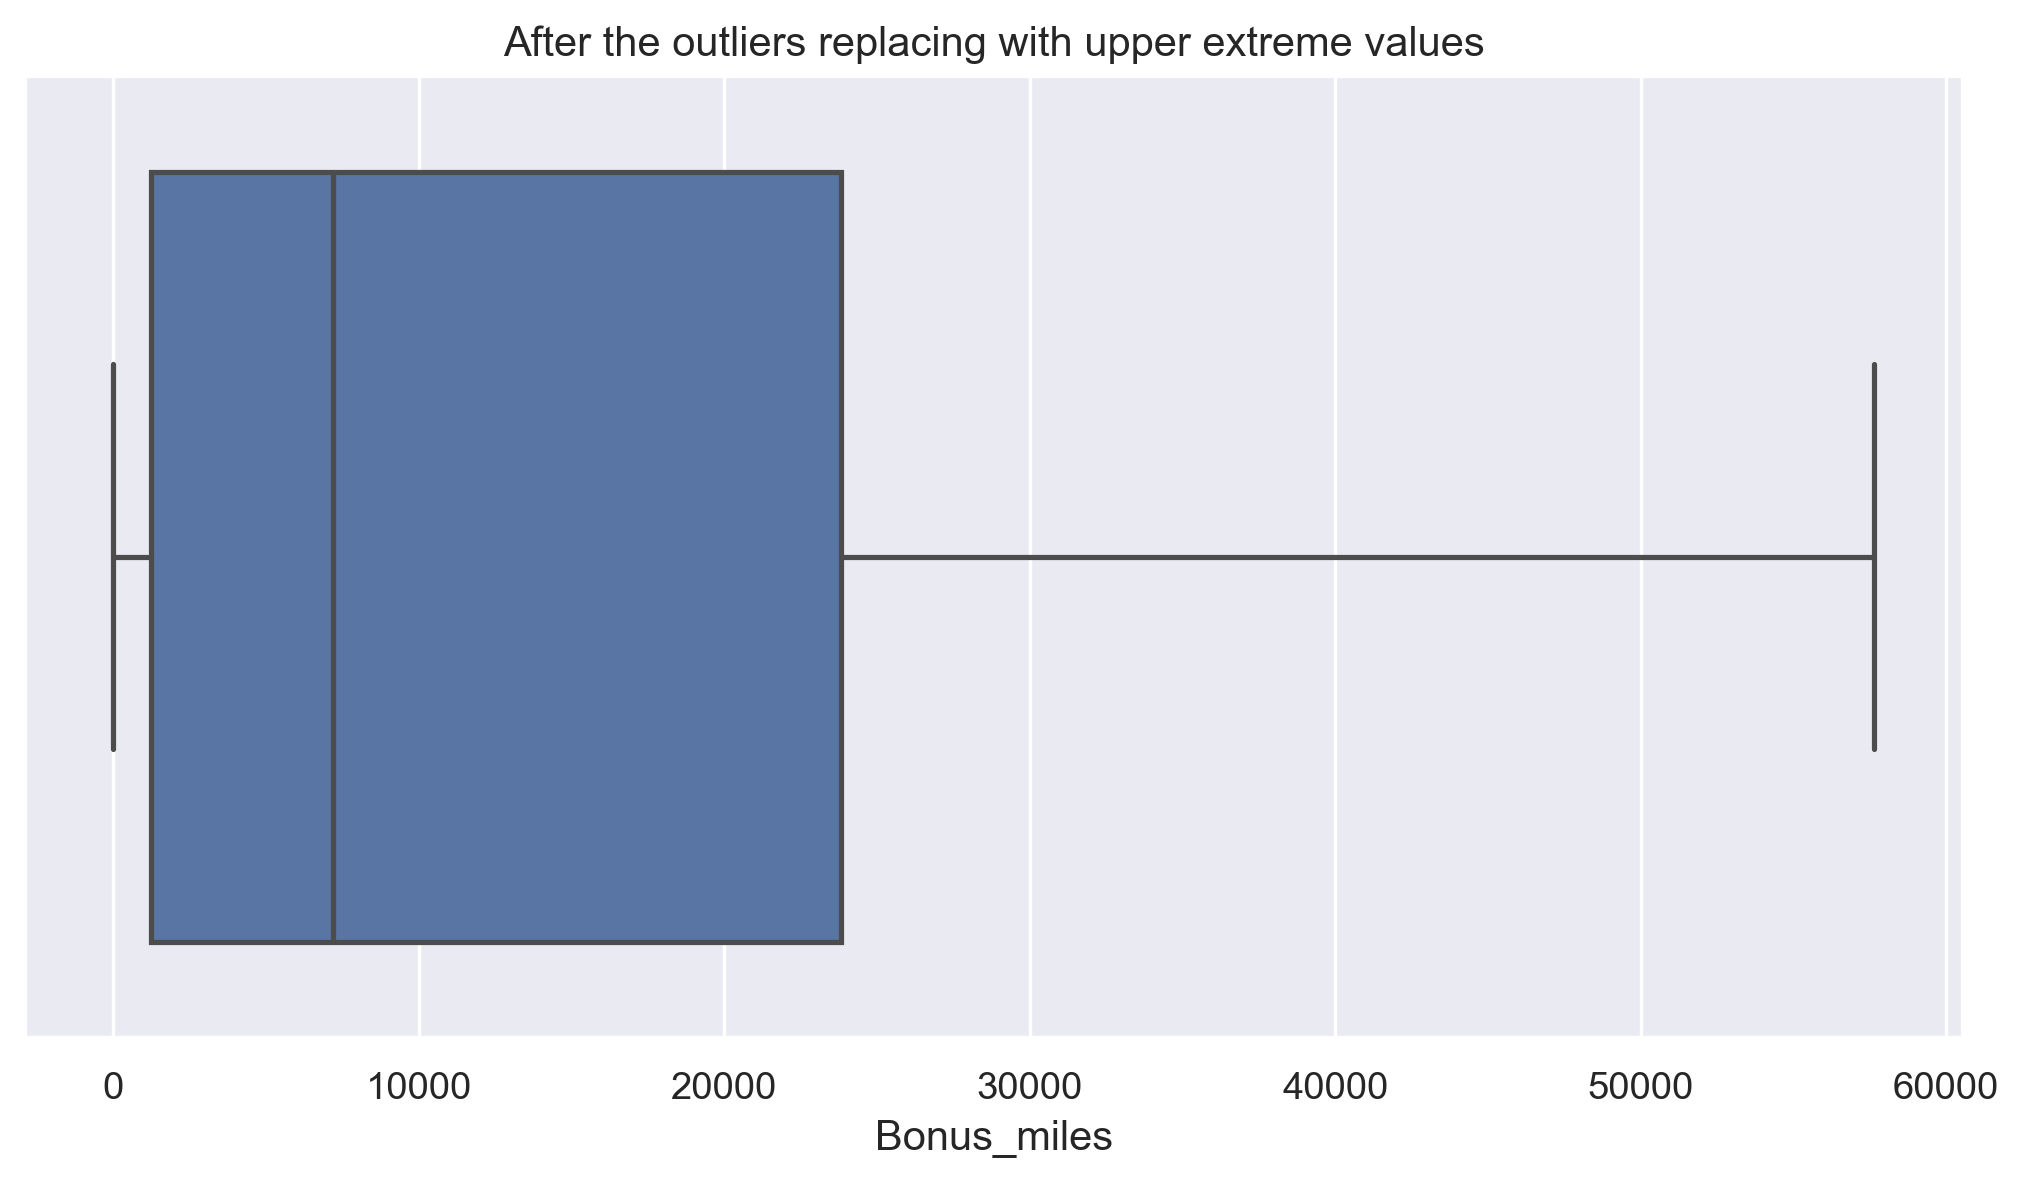

In [78]:
sns.boxplot(x = df["Bonus_miles"])
plt.xlabel("Bonus_miles")
plt.title("After the outliers replacing with upper extreme values")

In [131]:
outlier_detection(df, "Bonus_trans")

(-18.0, 38.0)

Text(0.5, 1.0, 'Before the outliers replacing with upper extreme values')

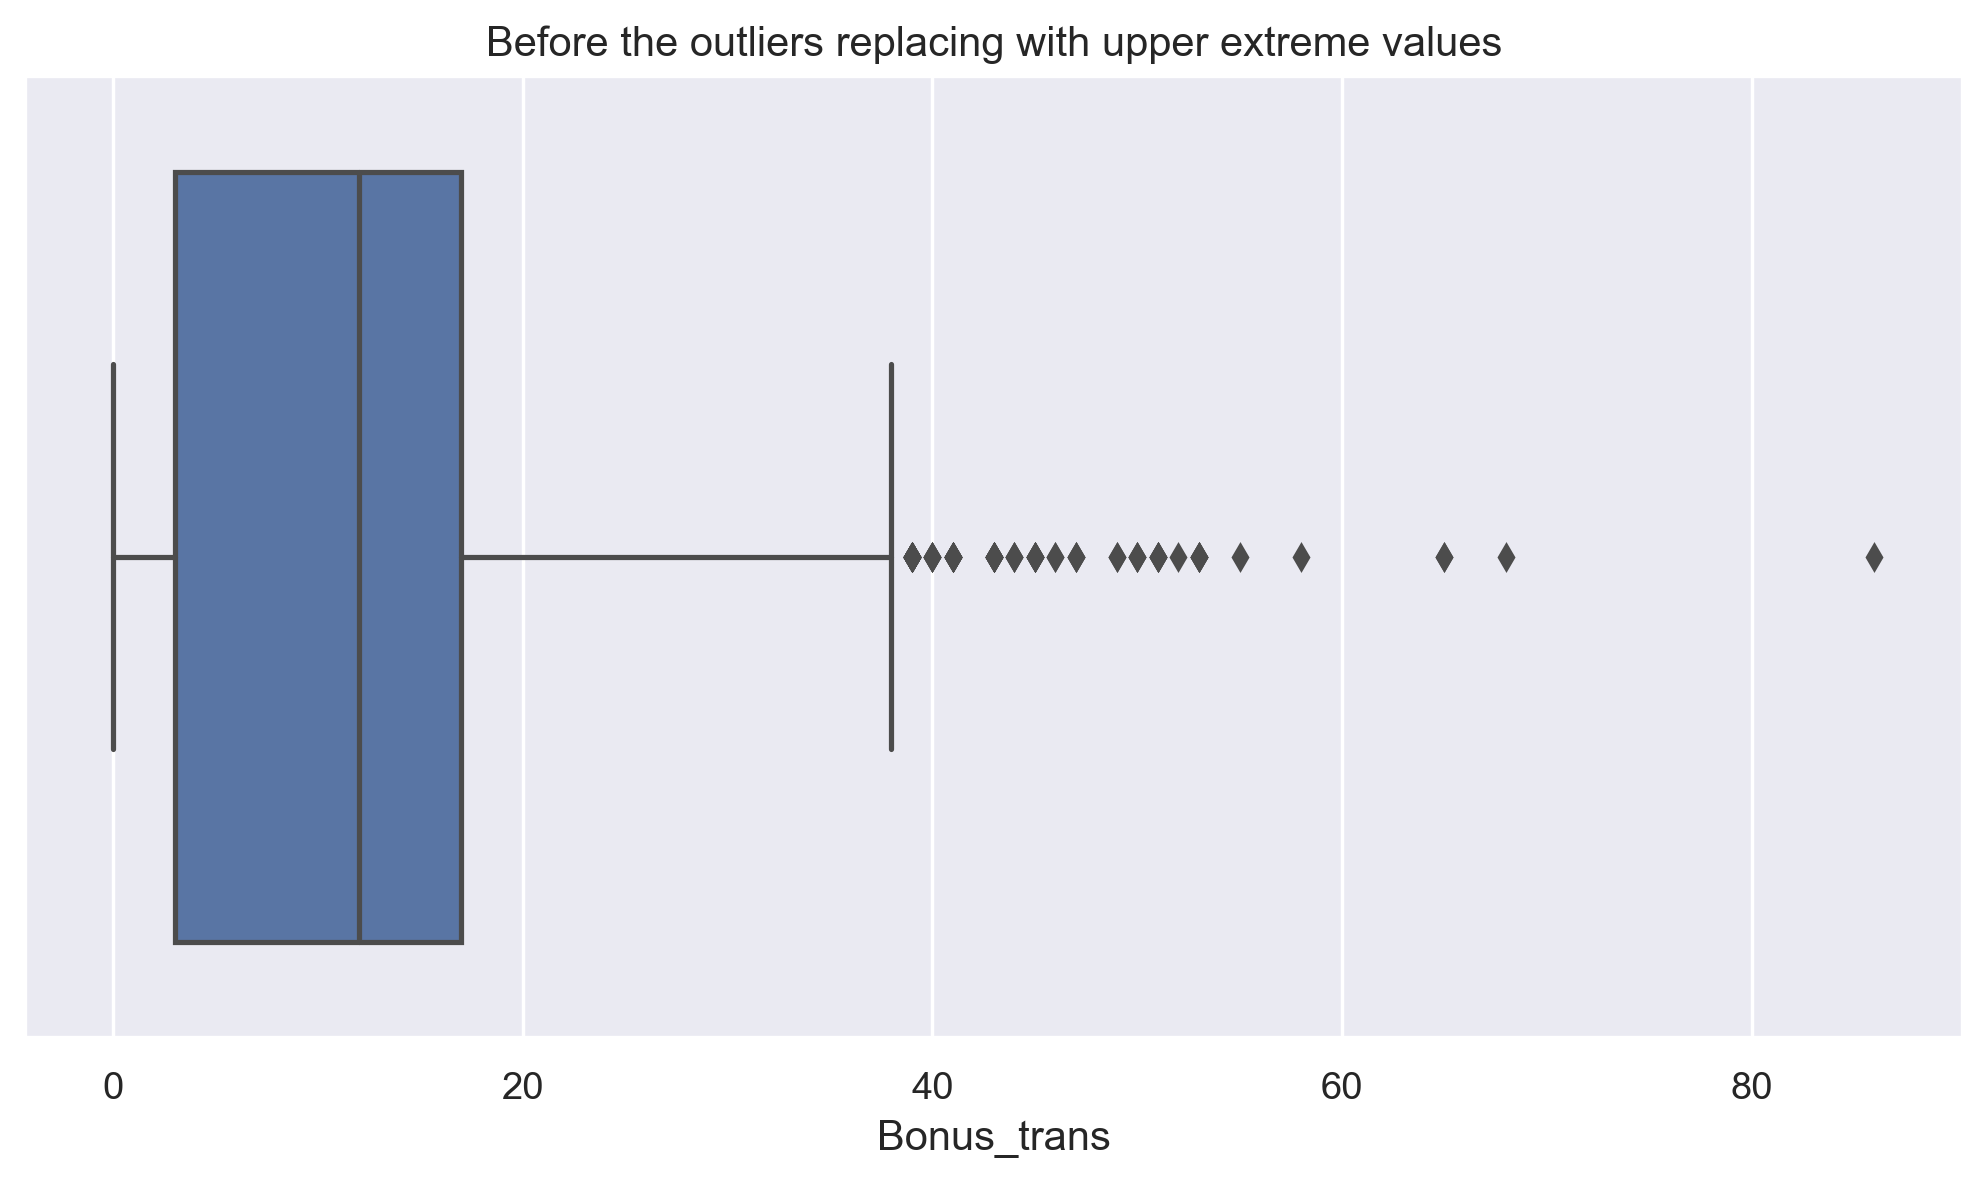

In [132]:
sns.boxplot(x=df["Bonus_trans"])
plt.xlabel("Bonus_trans")
plt.title("Before the outliers replacing with upper extreme values")

In [134]:
df.loc[df["Bonus_trans"]>38.0, "Bonus_trans"] = 38.0

Text(0.5, 1.0, 'After the outliers replacing with upper extreme values')

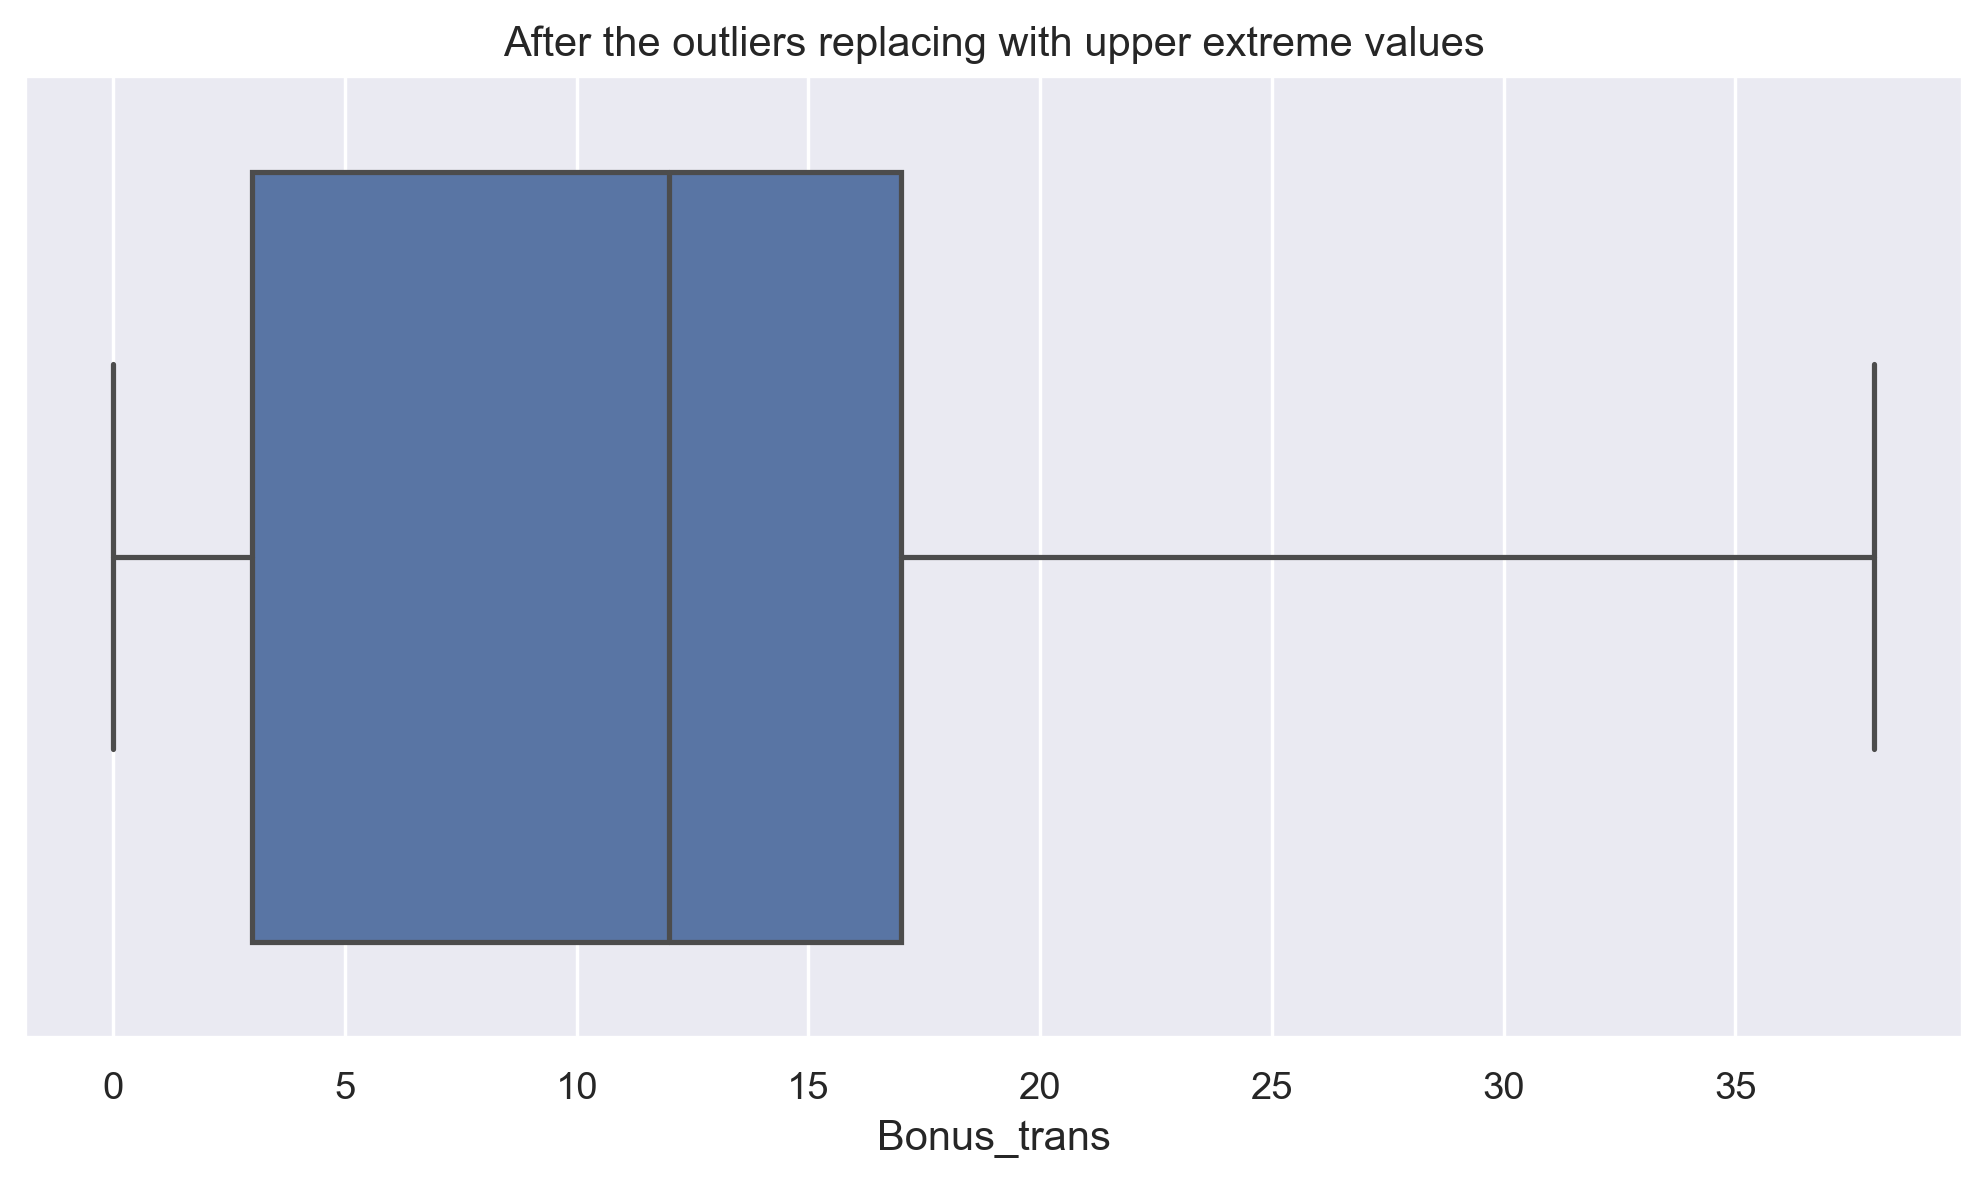

In [135]:
sns.boxplot(x=df["Bonus_trans"])
plt.xlabel("Bonus_trans")
plt.title("After the outliers replacing with upper extreme values")

In [81]:
outlier_detection(df, "Flight_miles_12mo")

(-470.25, 783.75)

In [83]:
df.loc[df["Flight_miles_12mo"]>783.75, "Flight_miles_12mo"] = 783.75

Text(0.5, 1.0, 'After the outliers replacing with upper extreme values')

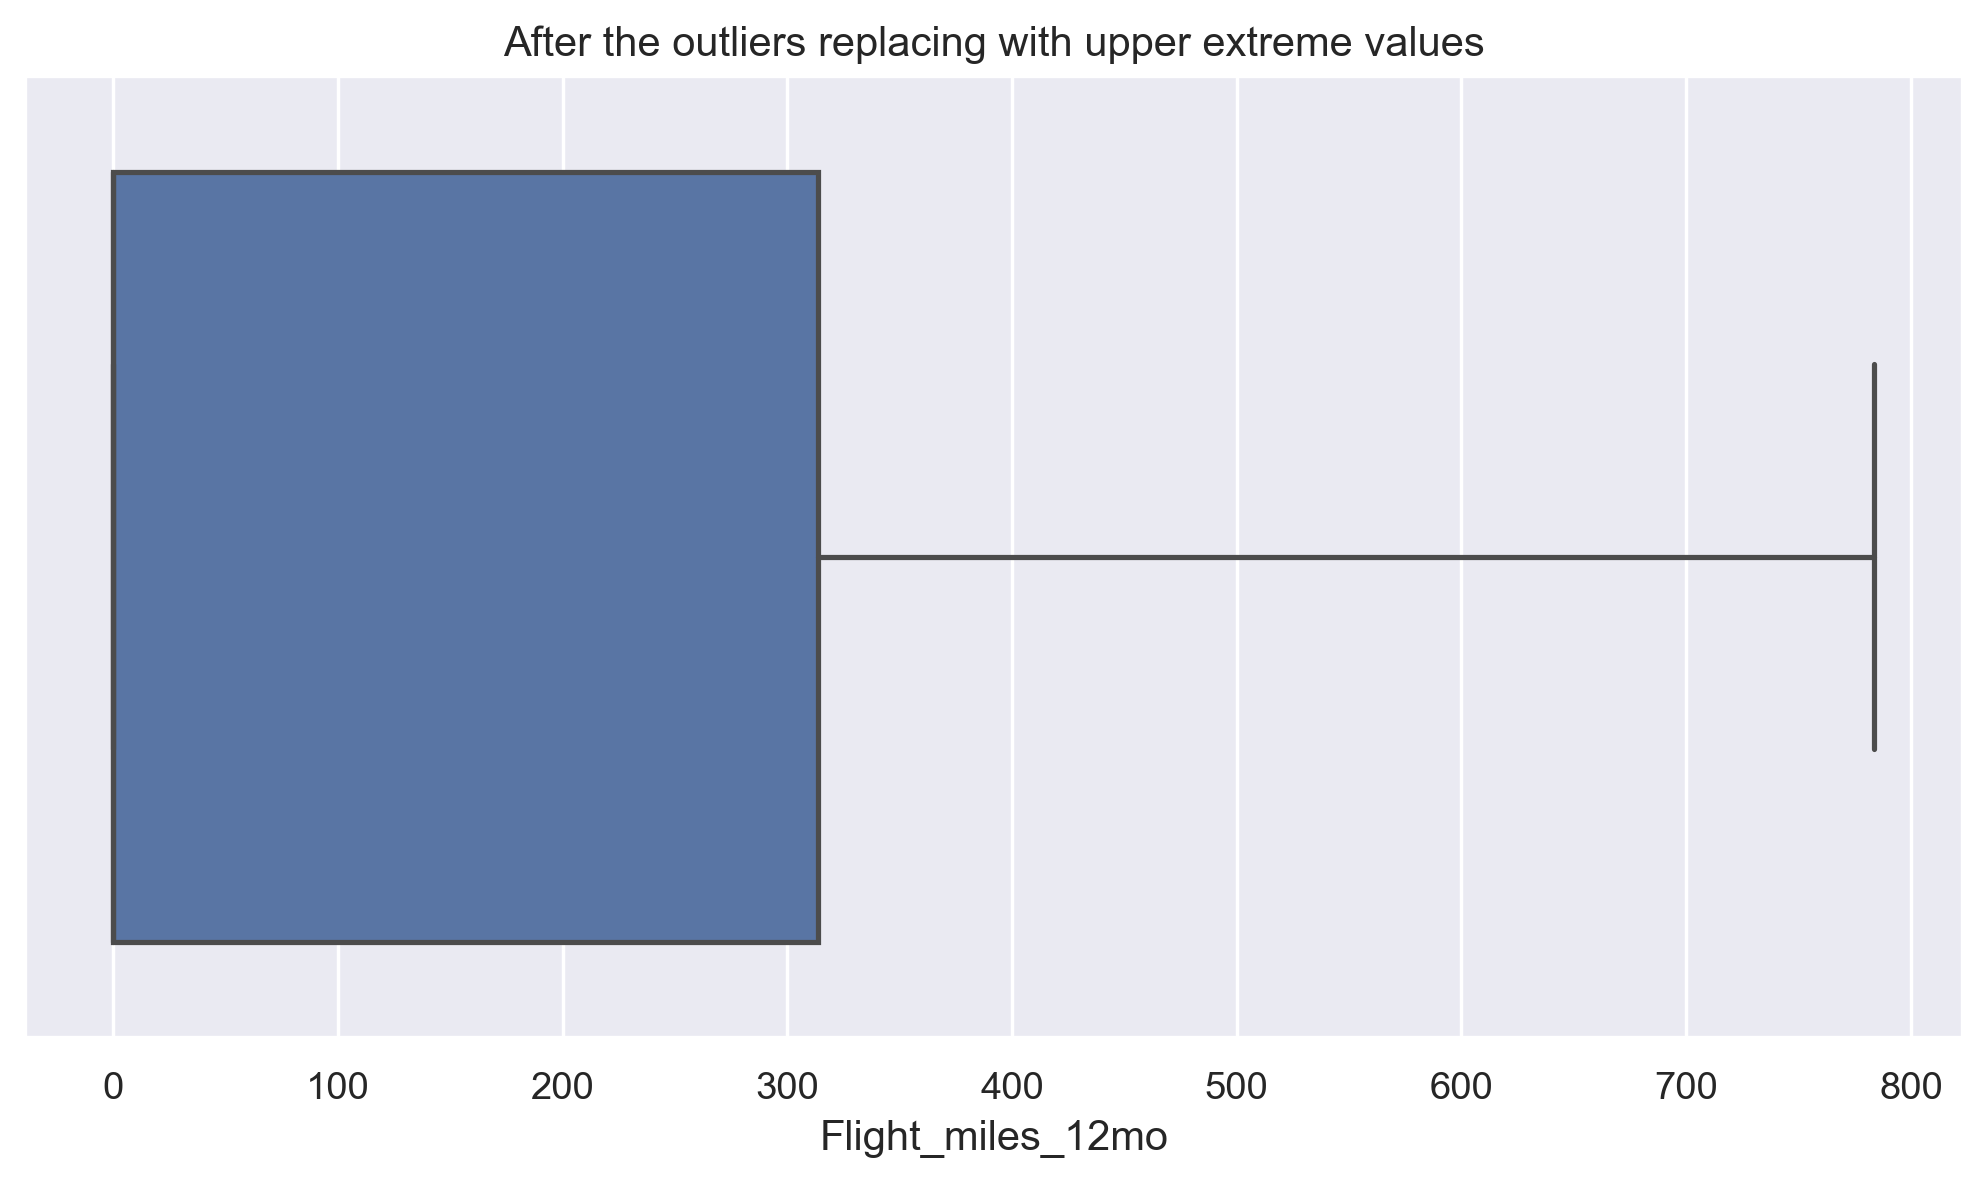

In [84]:
sns.boxplot(x = df["Flight_miles_12mo"])
plt.xlabel("Flight_miles_12mo")
plt.title("After the outliers replacing with upper extreme values")

In [87]:
outlier_detection(df, "Flight_trans_12")

(-1.5, 2.5)

Text(0.5, 1.0, 'Before the outilers replacing with upper extreme values')

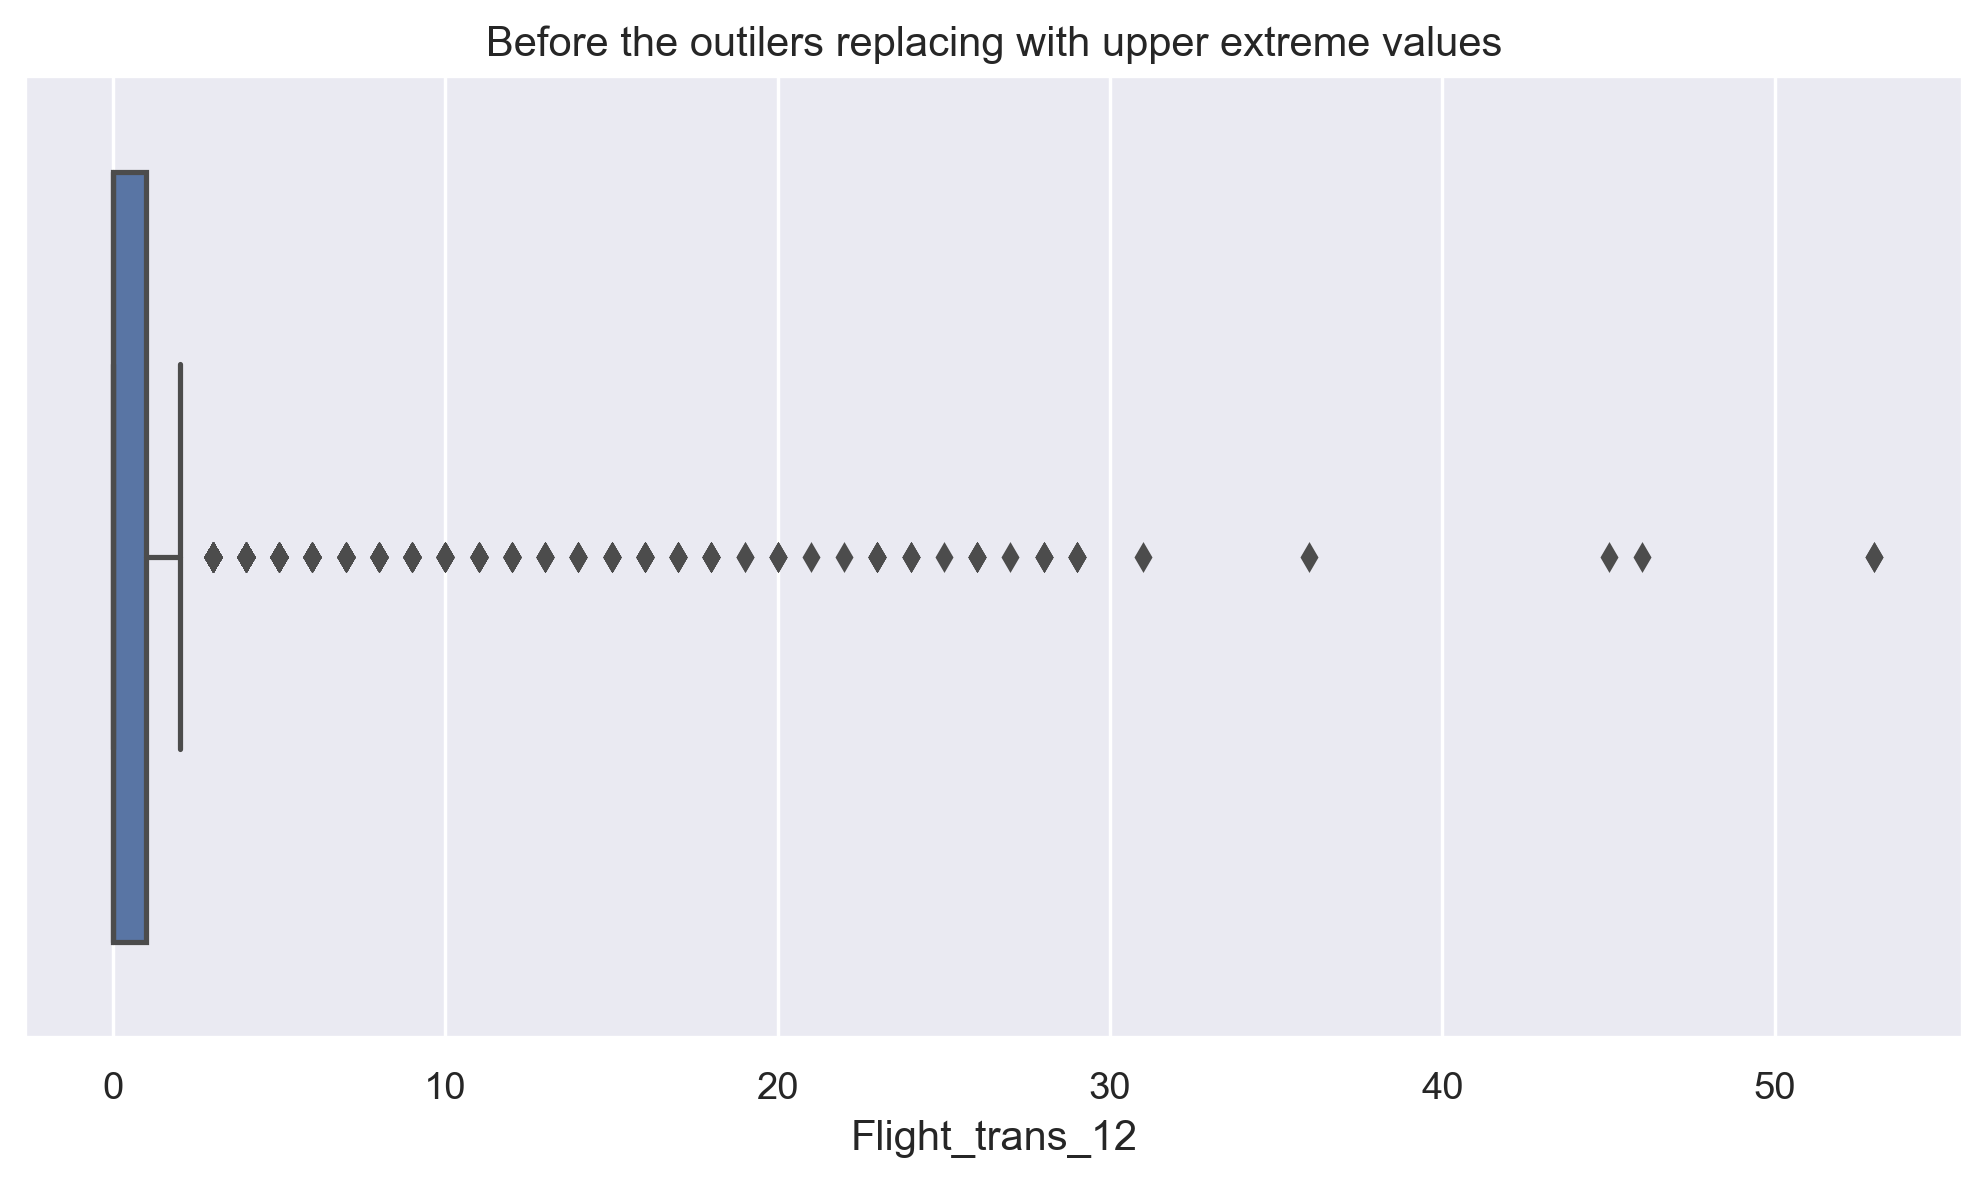

In [88]:
sns.boxplot(x = df["Flight_trans_12"])
plt.xlabel("Flight_trans_12")
plt.title("Before the outilers replacing with upper extreme values")

In [90]:
df.loc[df["Flight_trans_12"]>2.5, "Flight_trans_12"] = 2.5

Text(0.5, 1.0, 'After the outilers replacing with upper extreme values')

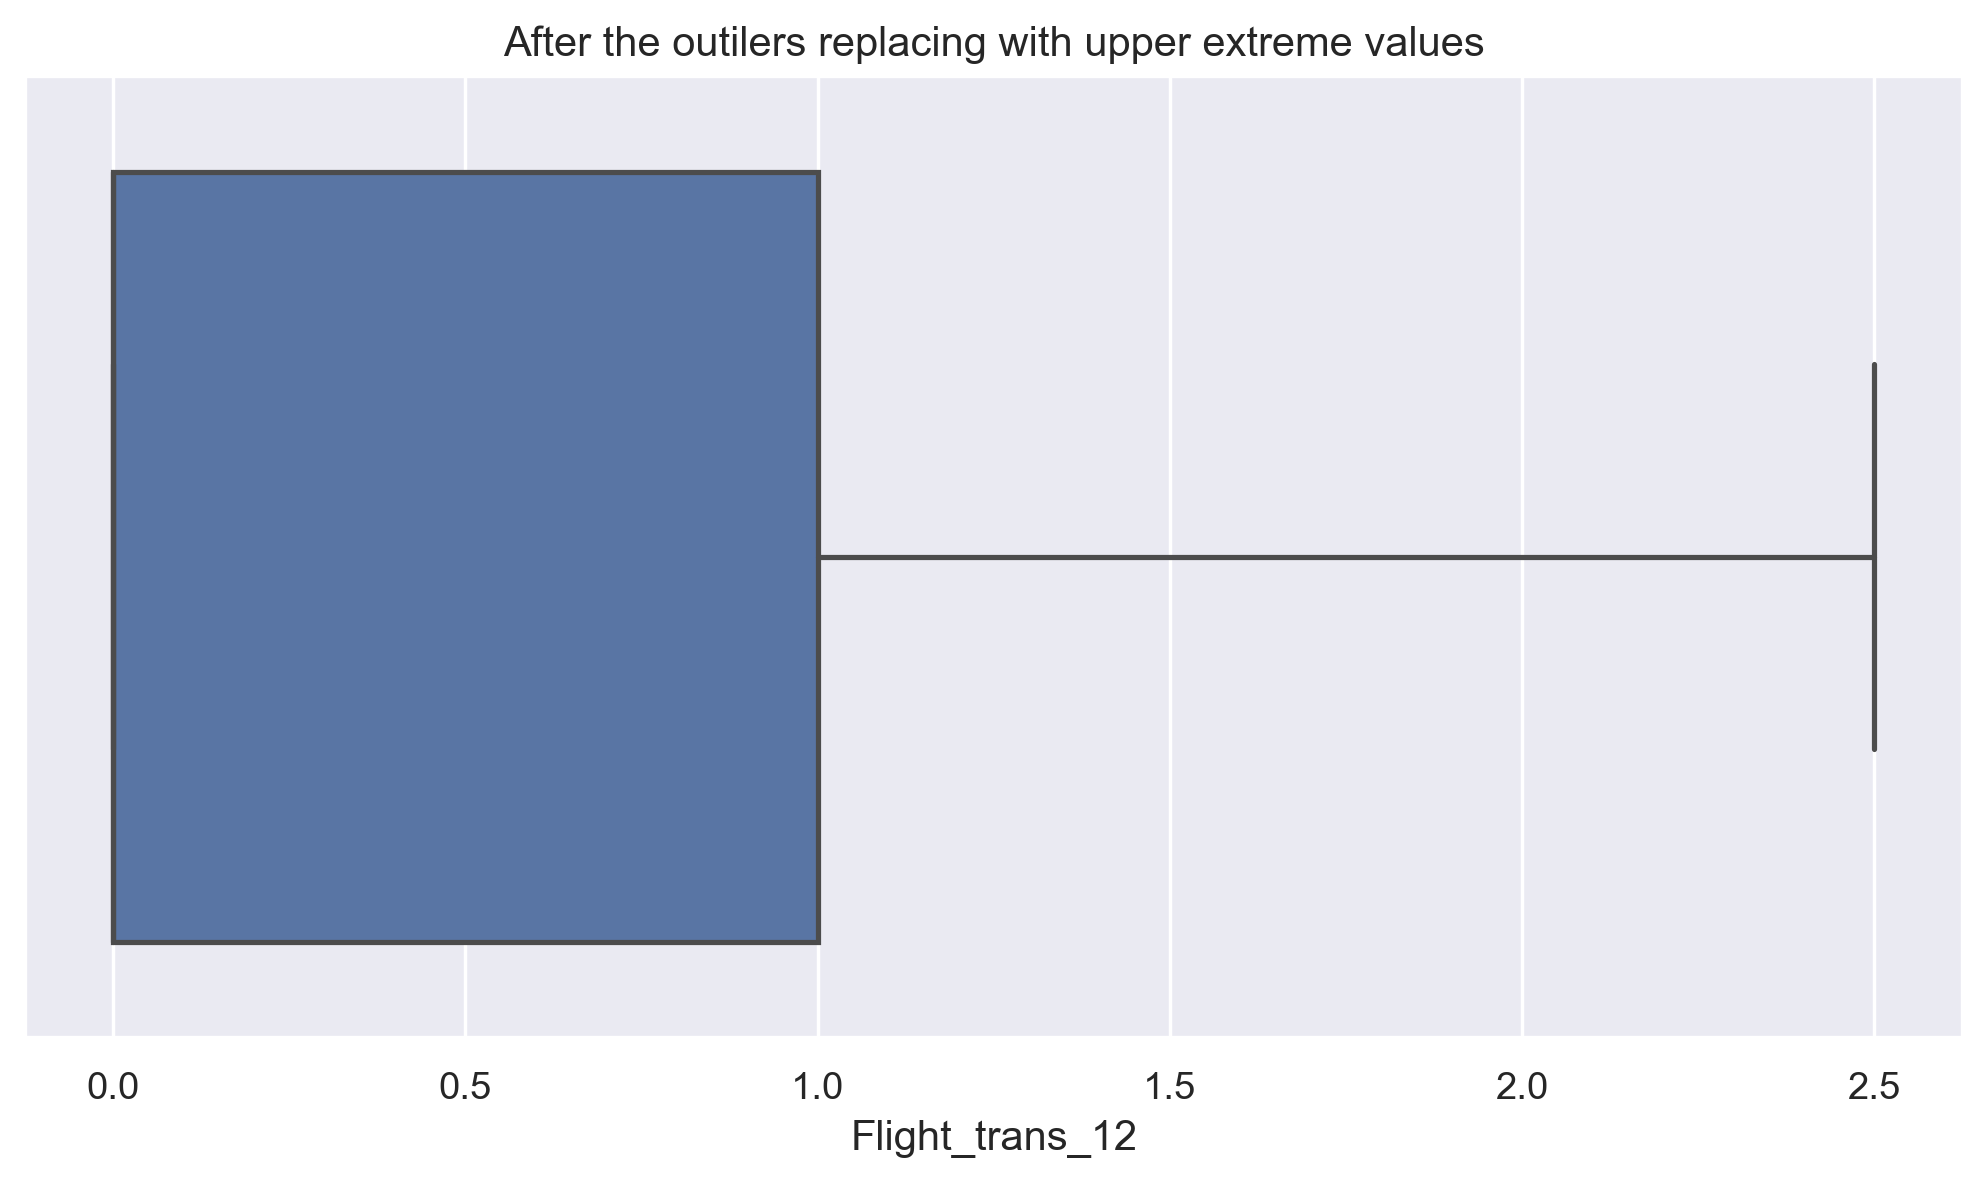

In [91]:
sns.boxplot(x = df["Flight_trans_12"])
plt.xlabel("Flight_trans_12")
plt.title("After the outilers replacing with upper extreme values")

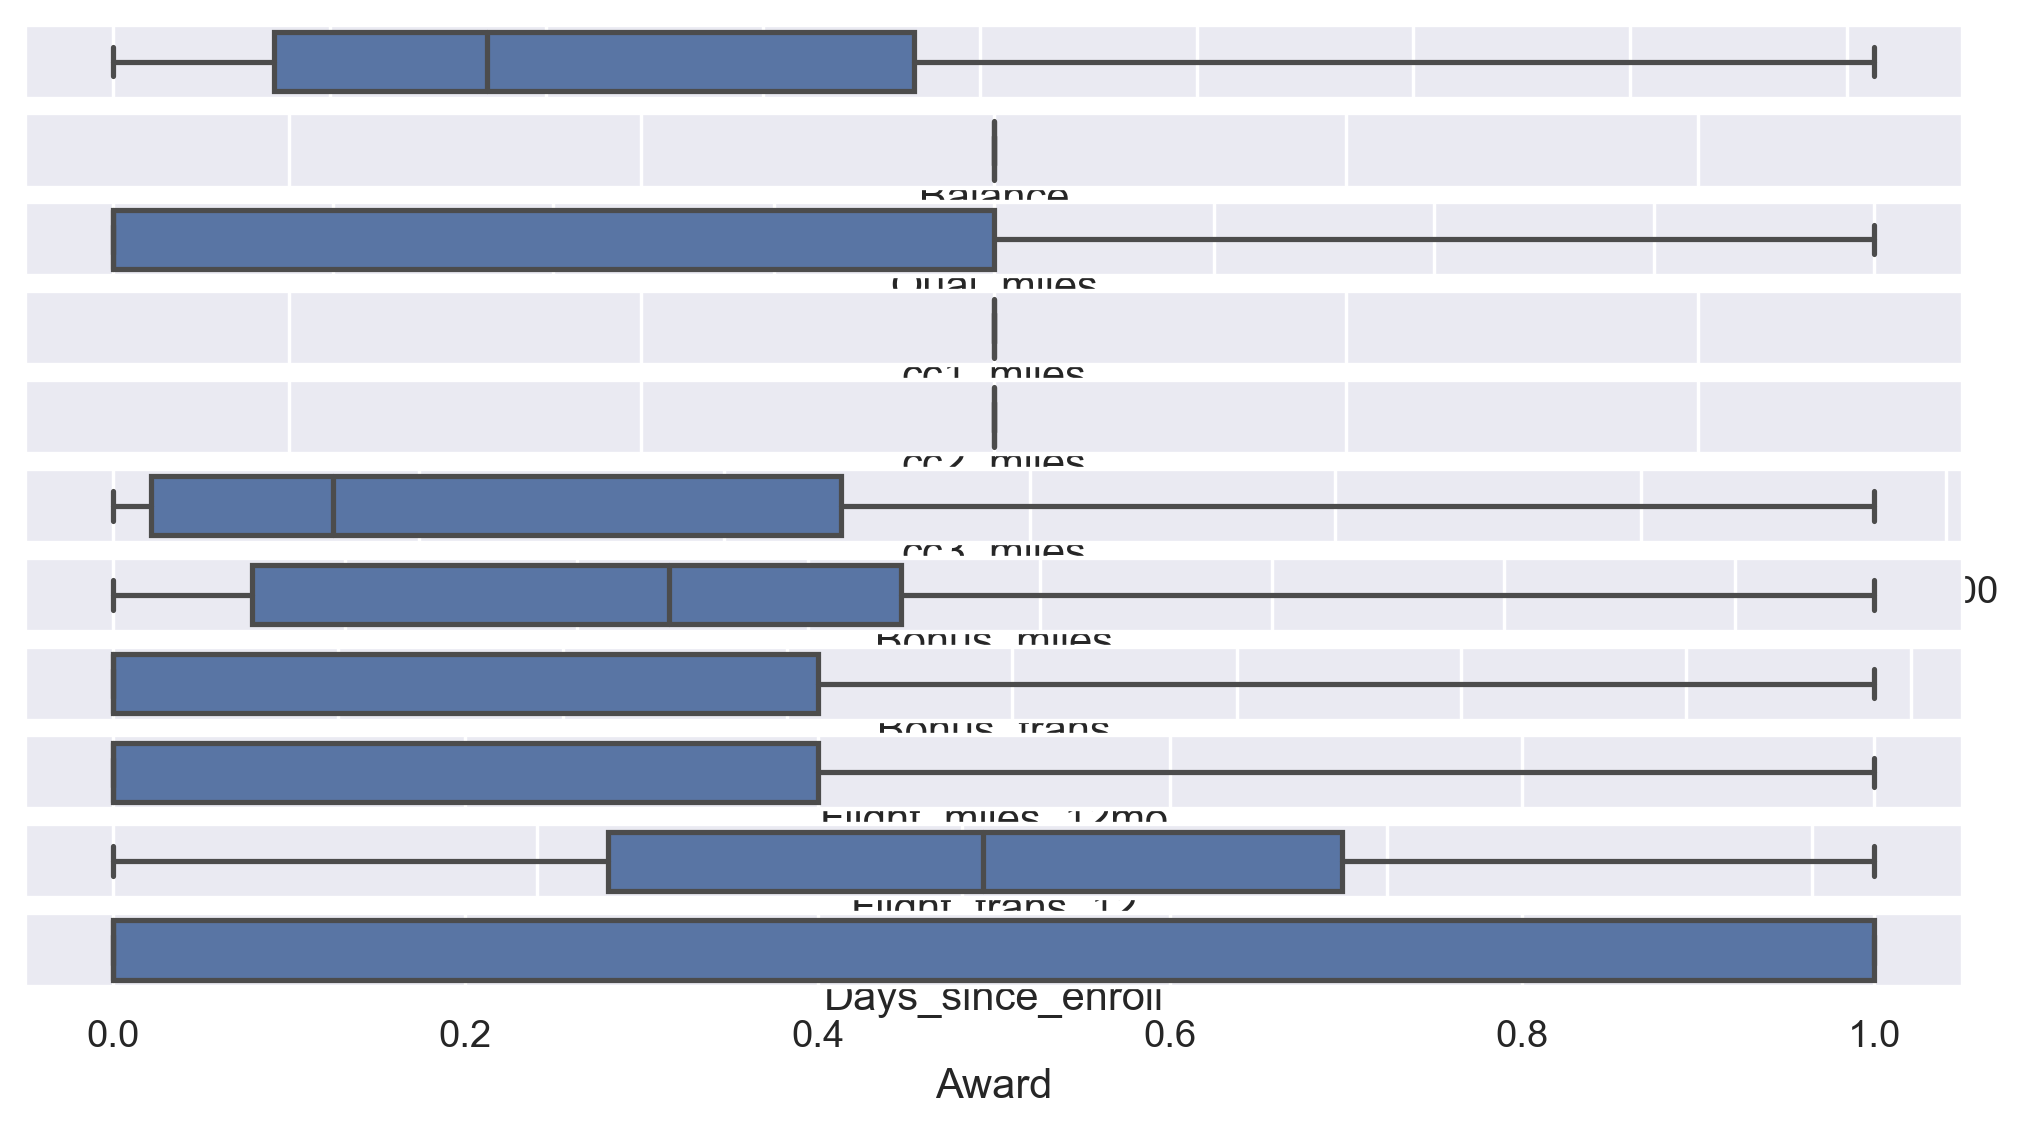

In [136]:
plt.subplot(11, 1, 1)
sns.boxplot(x=df["Balance"])
plt.tight_layout()

plt.subplot(11,1,2)
sns.boxplot(x=df["Qual_miles"])
plt.tight_layout()

plt.subplot(11,1,3)
sns.boxplot(x=df["cc1_miles"])
plt.tight_layout()

plt.subplot(11,1,4)
sns.boxplot(x=df["cc2_miles"])
plt.tight_layout()

plt.subplot(11,1,5)
sns.boxplot(x=df["cc3_miles"])
plt.tight_layout()

plt.subplot(11,1,6)
sns.boxplot(x=df["Bonus_miles"])
plt.tight_layout()

plt.subplot(11,1,7)
sns.boxplot(x=df["Bonus_trans"])
plt.tight_layout()

plt.subplot(11,1,8)
sns.boxplot(x=df["Flight_miles_12mo"])
plt.tight_layout()

plt.subplot(11,1,9)
sns.boxplot(x=df["Flight_trans_12"])
plt.tight_layout()

plt.subplot(11,1,10)
sns.boxplot(x=df["Days_since_enroll"])
plt.tight_layout()

plt.subplot(11,1,11)
sns.boxplot(x=df["Award"])
plt.tight_layout()

# While looking at the above all the boxplot, now we can replace all the outliers with upper extreme values.

# Scatter Plot and Correlation

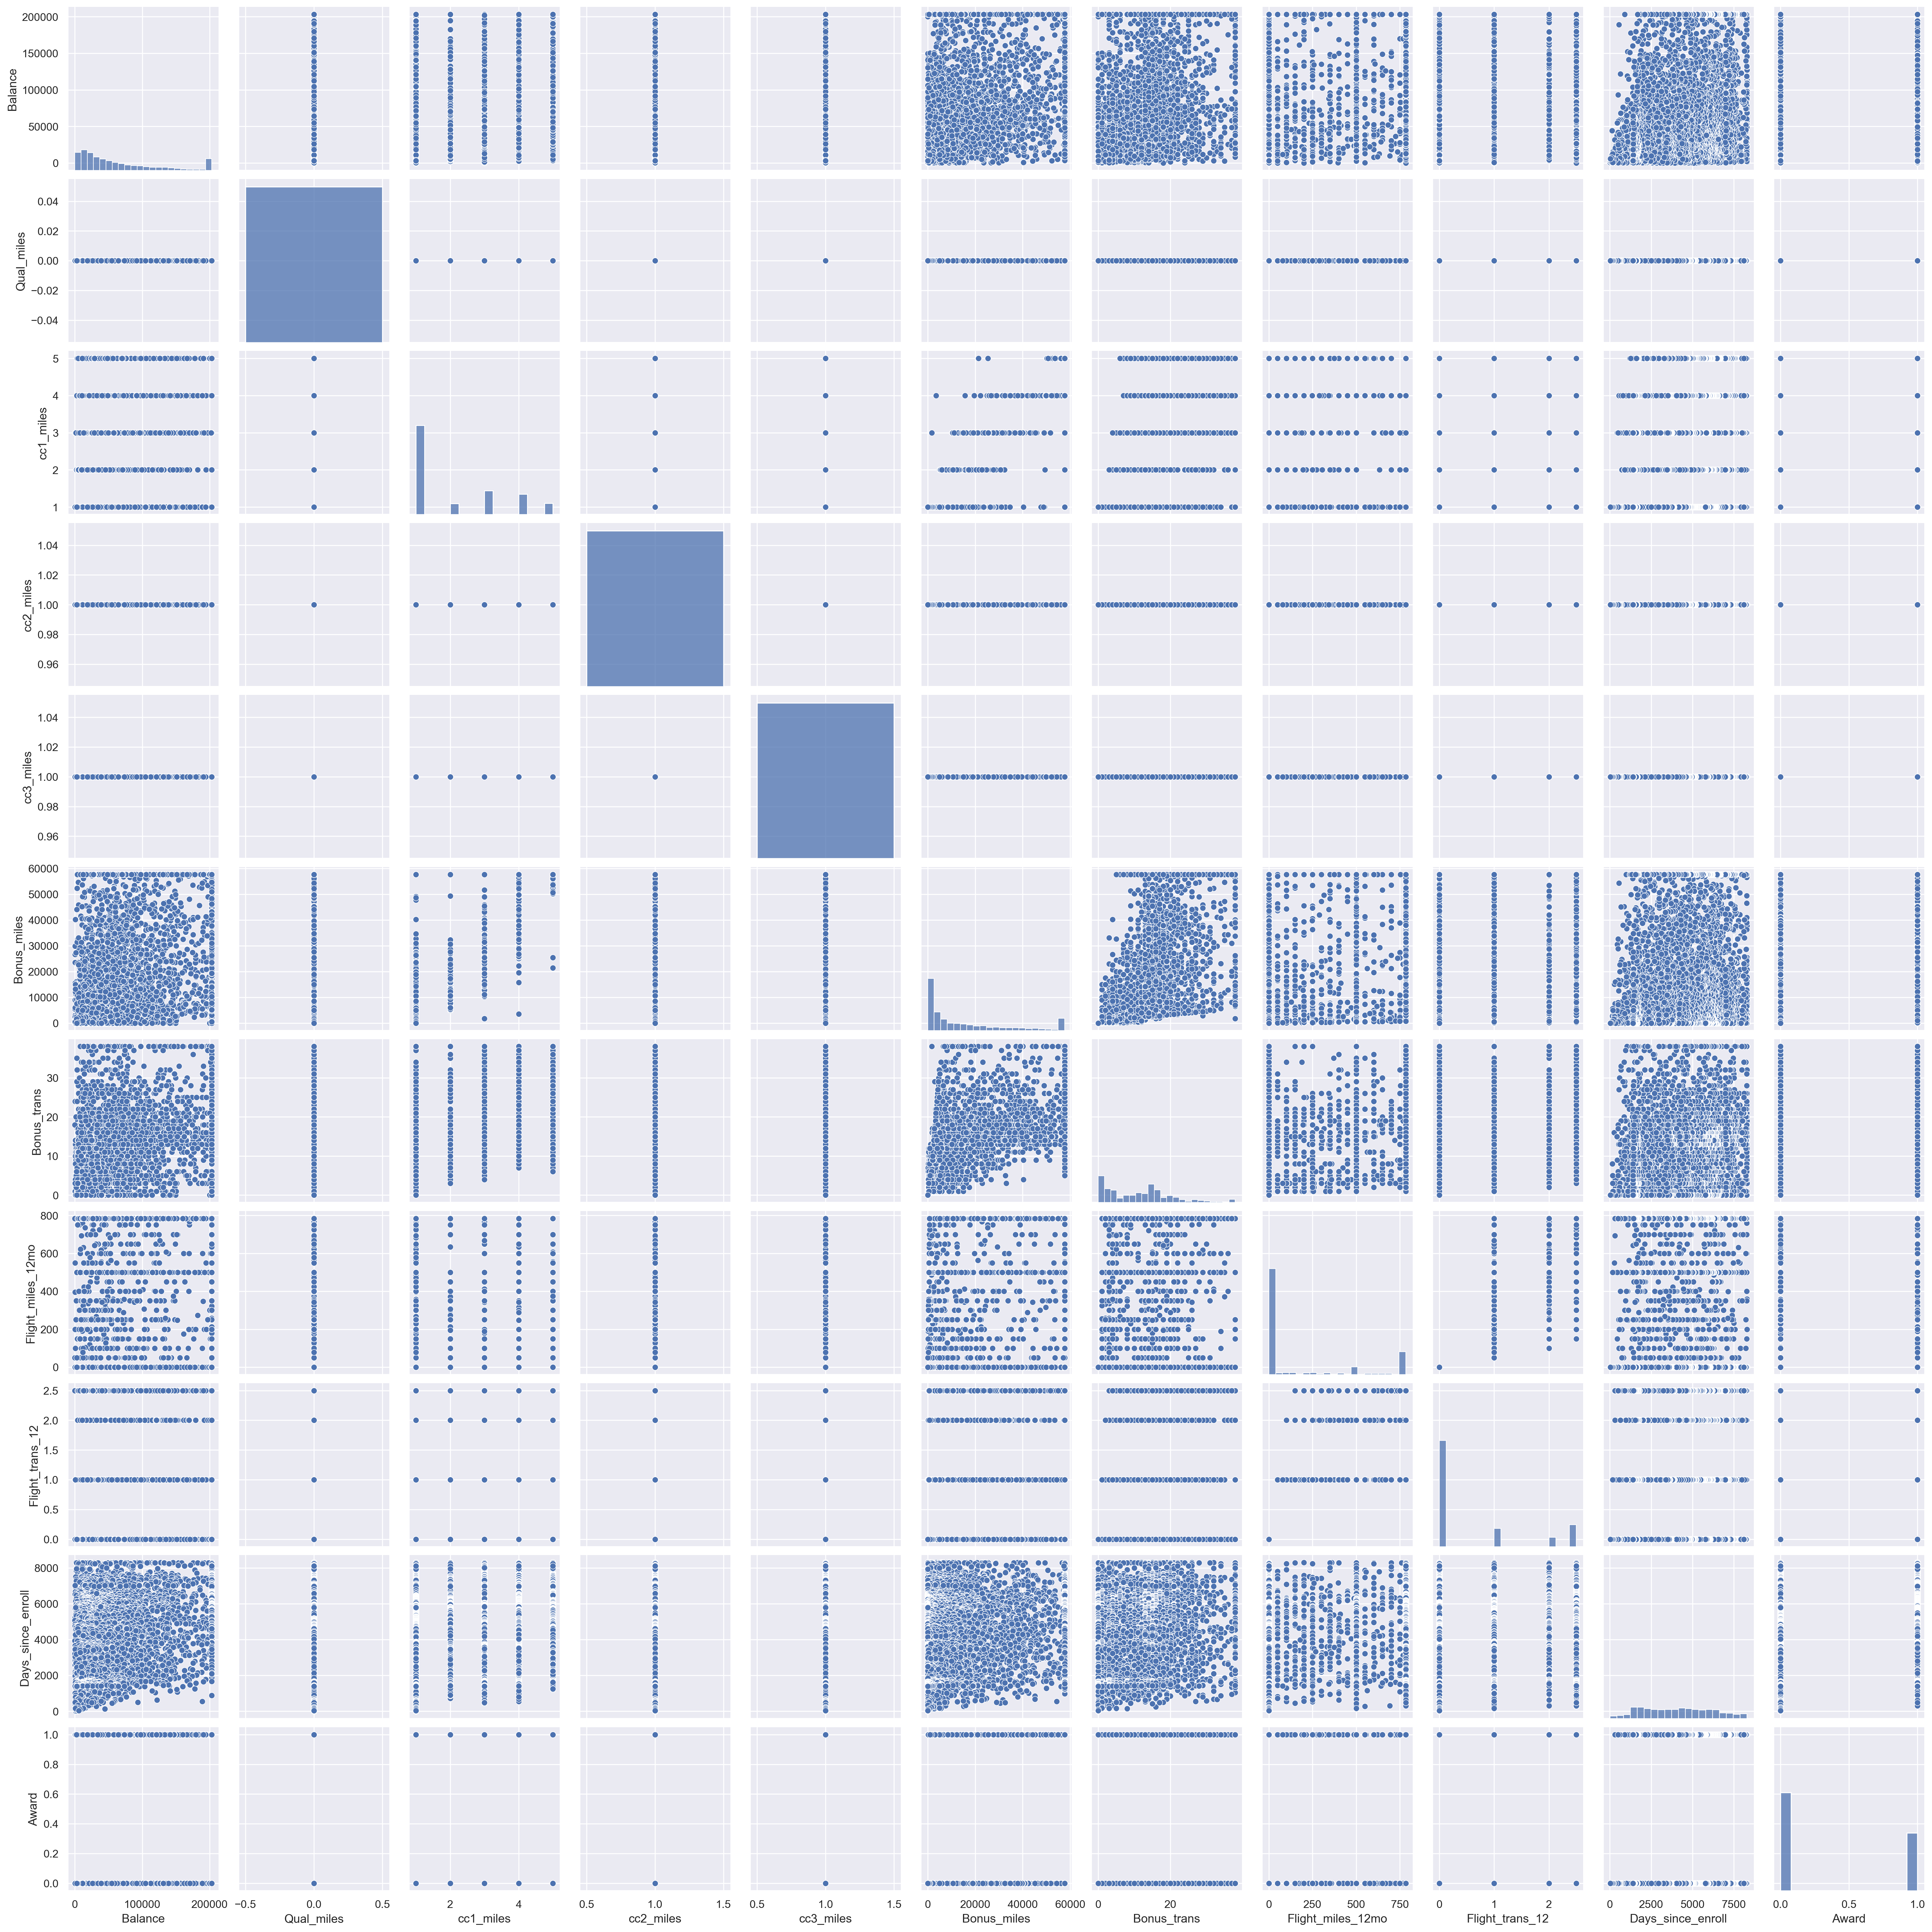

In [139]:
sns.pairplot(df)

# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [1]:
from sklearn.preprocessing import StandardScaler

In [141]:
#Standardization
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-0.60754076,  0.        , -0.76973166, ..., -0.62625242,
         1.39523468, -0.76707163],
       [-0.75923491,  0.        , -0.76973166, ..., -0.62625242,
         1.37973643, -0.76707163],
       [-0.38234339,  0.        , -0.76973166, ..., -0.62625242,
         1.41170157, -0.76707163],
       ...,
       [ 0.1672773 ,  0.        ,  0.68289387, ..., -0.62625242,
        -1.31599028,  1.30365921],
       [-0.15145258,  0.        , -0.76973166, ...,  0.43219492,
        -1.3164746 , -0.76707163],
       [-1.03586068,  0.        , -0.76973166, ..., -0.62625242,
        -1.31792757, -0.76707163]])

In [142]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [143]:
pd.DataFrame(x, columns= df.columns)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.607541         0.0  -0.769732        0.0        0.0    -0.843179   
1    -0.759235         0.0  -0.769732        0.0        0.0    -0.840911   
2    -0.382343         0.0  -0.769732        0.0        0.0    -0.624728   
3    -0.835397         0.0  -0.769732        0.0        0.0    -0.825145   
4     0.579028         0.0   1.409207        0.0        0.0     1.542468   
...        ...         ...        ...        ...        ...          ...   
3993 -0.772326         0.0  -0.769732        0.0        0.0    -0.381218   
3994  0.010248         0.0  -0.769732        0.0        0.0    -0.798537   
3995  0.167277         0.0   0.682894        0.0        0.0     0.554875   
3996 -0.151453         0.0  -0.769732        0.0        0.0    -0.825145   
3997 -1.035861         0.0  -0.769732        0.0        0.0    -0.852804   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.149253          -0.603723        -0.626252           1.395235   
1       -1.039523          -0.603723        -0.626252           1.379736   
2       -0.820064          -0.603723        -0.626252           1.411702   
3       -1.149253          -0.603723        -0.626252           1.371987   
4        1.593991           2.039825         2.019866           1.363754   
...           ...                ...              ...                ...   
3993    -0.820064           0.070867         0.432195          -1.315506   
3994    -0.710334          -0.603723        -0.626252          -1.319381   
3995    -0.381145          -0.603723        -0.626252          -1.315990   
3996    -1.149253           1.082751         0.432195          -1.316475   
3997    -1.258983          -0.603723        -0.626252          -1.317928   

         Award  
0    -0.767072  
1    -0.767072  
2    -0.767072  
3    -0.767072  
4     1.303659  
...        ...  
3993  1.303659  
3994  1.303659  
3995  1.303659  
3996 -0.767072  
3997 -0.767072  

[3998 rows x 11 columns]

# Hierarchical Clustering

# Dendrogram with single and complete linkage

In [144]:
from scipy.cluster import hierarchy

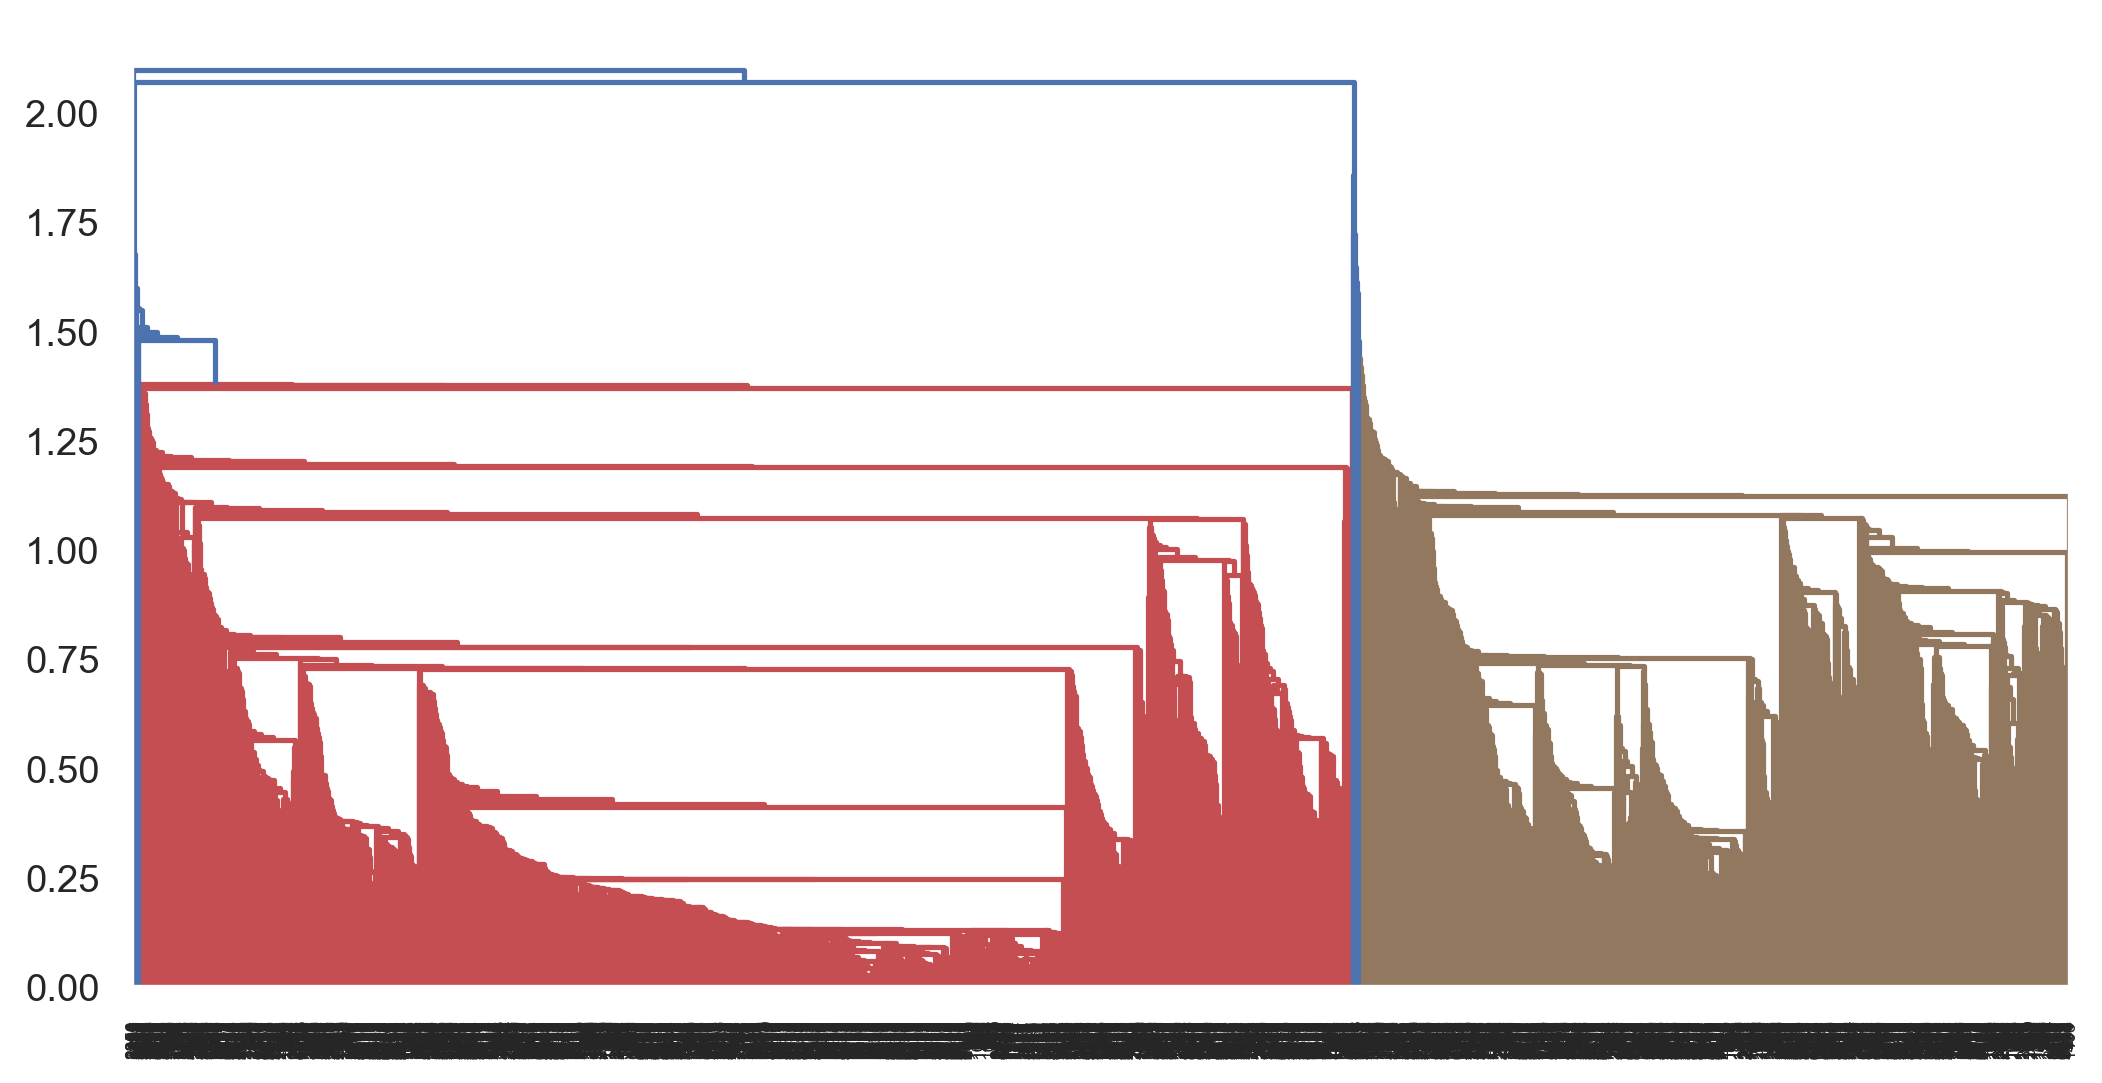

In [145]:
lk = hierarchy.linkage(x, method="single")
dendrogram = hierarchy.dendrogram(lk)

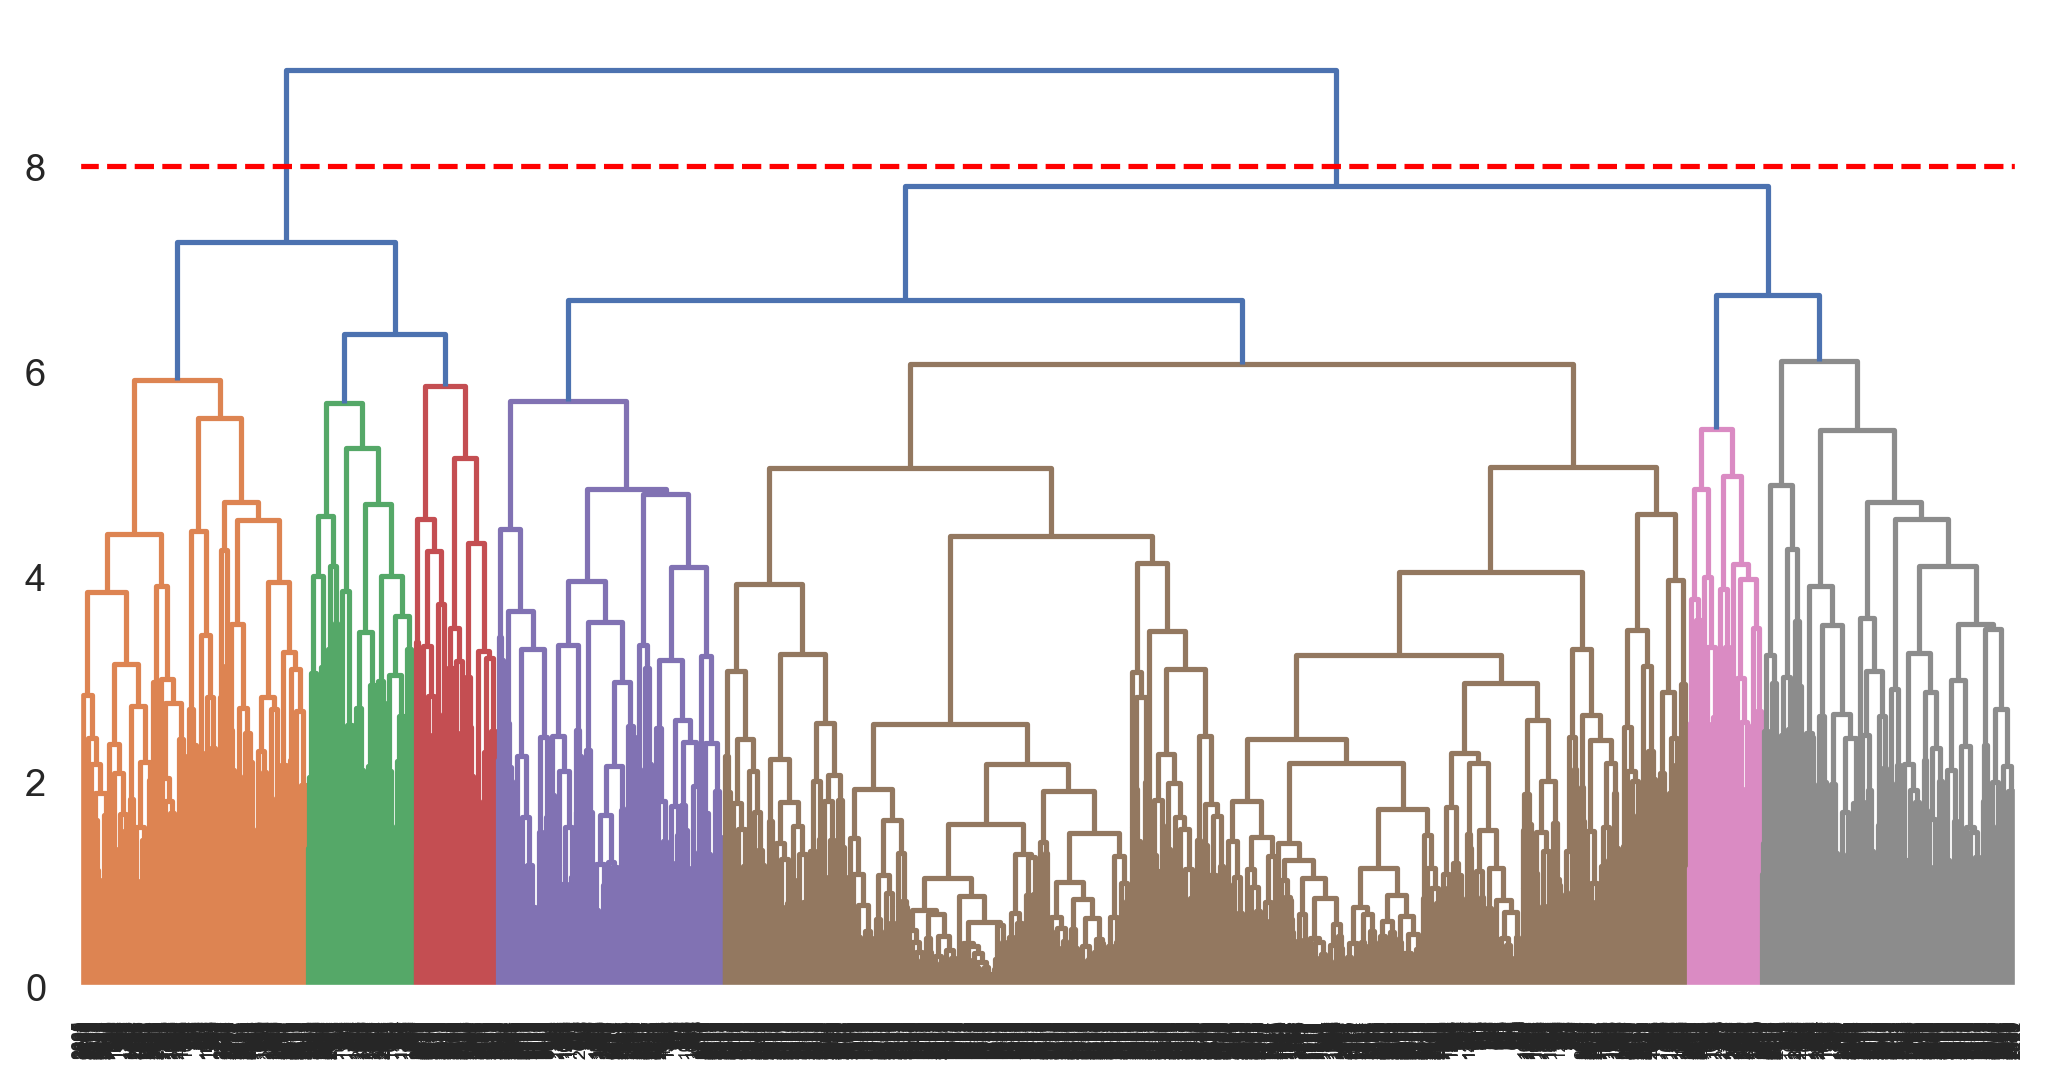

In [150]:
lk = hierarchy.linkage(x, method="complete")
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y =8, linestyle = "--", color ="red")

# Model Building

In [151]:
from sklearn.cluster import AgglomerativeClustering

In [153]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [154]:
len(ypred)

3998

In [158]:
df.drop(columns=["Cluster"], inplace=True)

In [159]:
df["Hierarchical Clustering"] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0           0          1          1          1        174.0   
2     19244.0           0          1          1          1        215.0   
3     41354.0           0          1          1          1       4123.0   
4     14776.0           0          1          1          1        500.0   
5     97752.0           0          4          1          1      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0           0          1          1          1       8525.0   
4018  64385.0           0          1          1          1        981.0   
4019  73597.0           0          3          1          1      25447.0   
4020  54899.0           0          1          1          1        500.0   
4021   3016.0           0          1          1          1          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1               0.00              0.0               7000   
2               2               0.00              0.0               6968   
3               4               0.00              0.0               7034   
4               1               0.00              0.0               6952   
5              26             783.75              2.5               6935   
...           ...                ...              ...                ...   
4017            4             200.00              1.0               1403   
4018            5               0.00              0.0               1395   
4019            8               0.00              0.0               1402   
4020            1             500.00              1.0               1401   
4021            0               0.00              0.0               1398   

      Award  Hierarchical Clustering  
ID#                                   
1         0                        1  
2         0                        1  
3         0                        1  
4         0                        1  
5         1                        0  
...     ...                      ...  
4017      1                        1  
4018      1                        1  
4019      1                        1  
4020      0                        0  
4021      0                        1  

[3998 rows x 12 columns]

# Analyzing the clusters

In [160]:
df.groupby('Hierarchical Clustering').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical Clustering                                                   
0                        97958.211257         0.0   2.792529        1.0   
1                        30219.399975         0.0   1.340109        1.0   

                         cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical Clustering                                         
0                              1.0  25579.458922    15.653205   
1                              1.0   5434.689638     7.368369   

                         Flight_miles_12mo  Flight_trans_12  \
Hierarchical Clustering                                       
0                               344.763756         1.125946   
1                                16.174393         0.066931   

                         Days_since_enroll     Award  
Hierarchical Clustering                               
0                              4496.702171  0.451287  
1                              3748.415964  0.291026

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

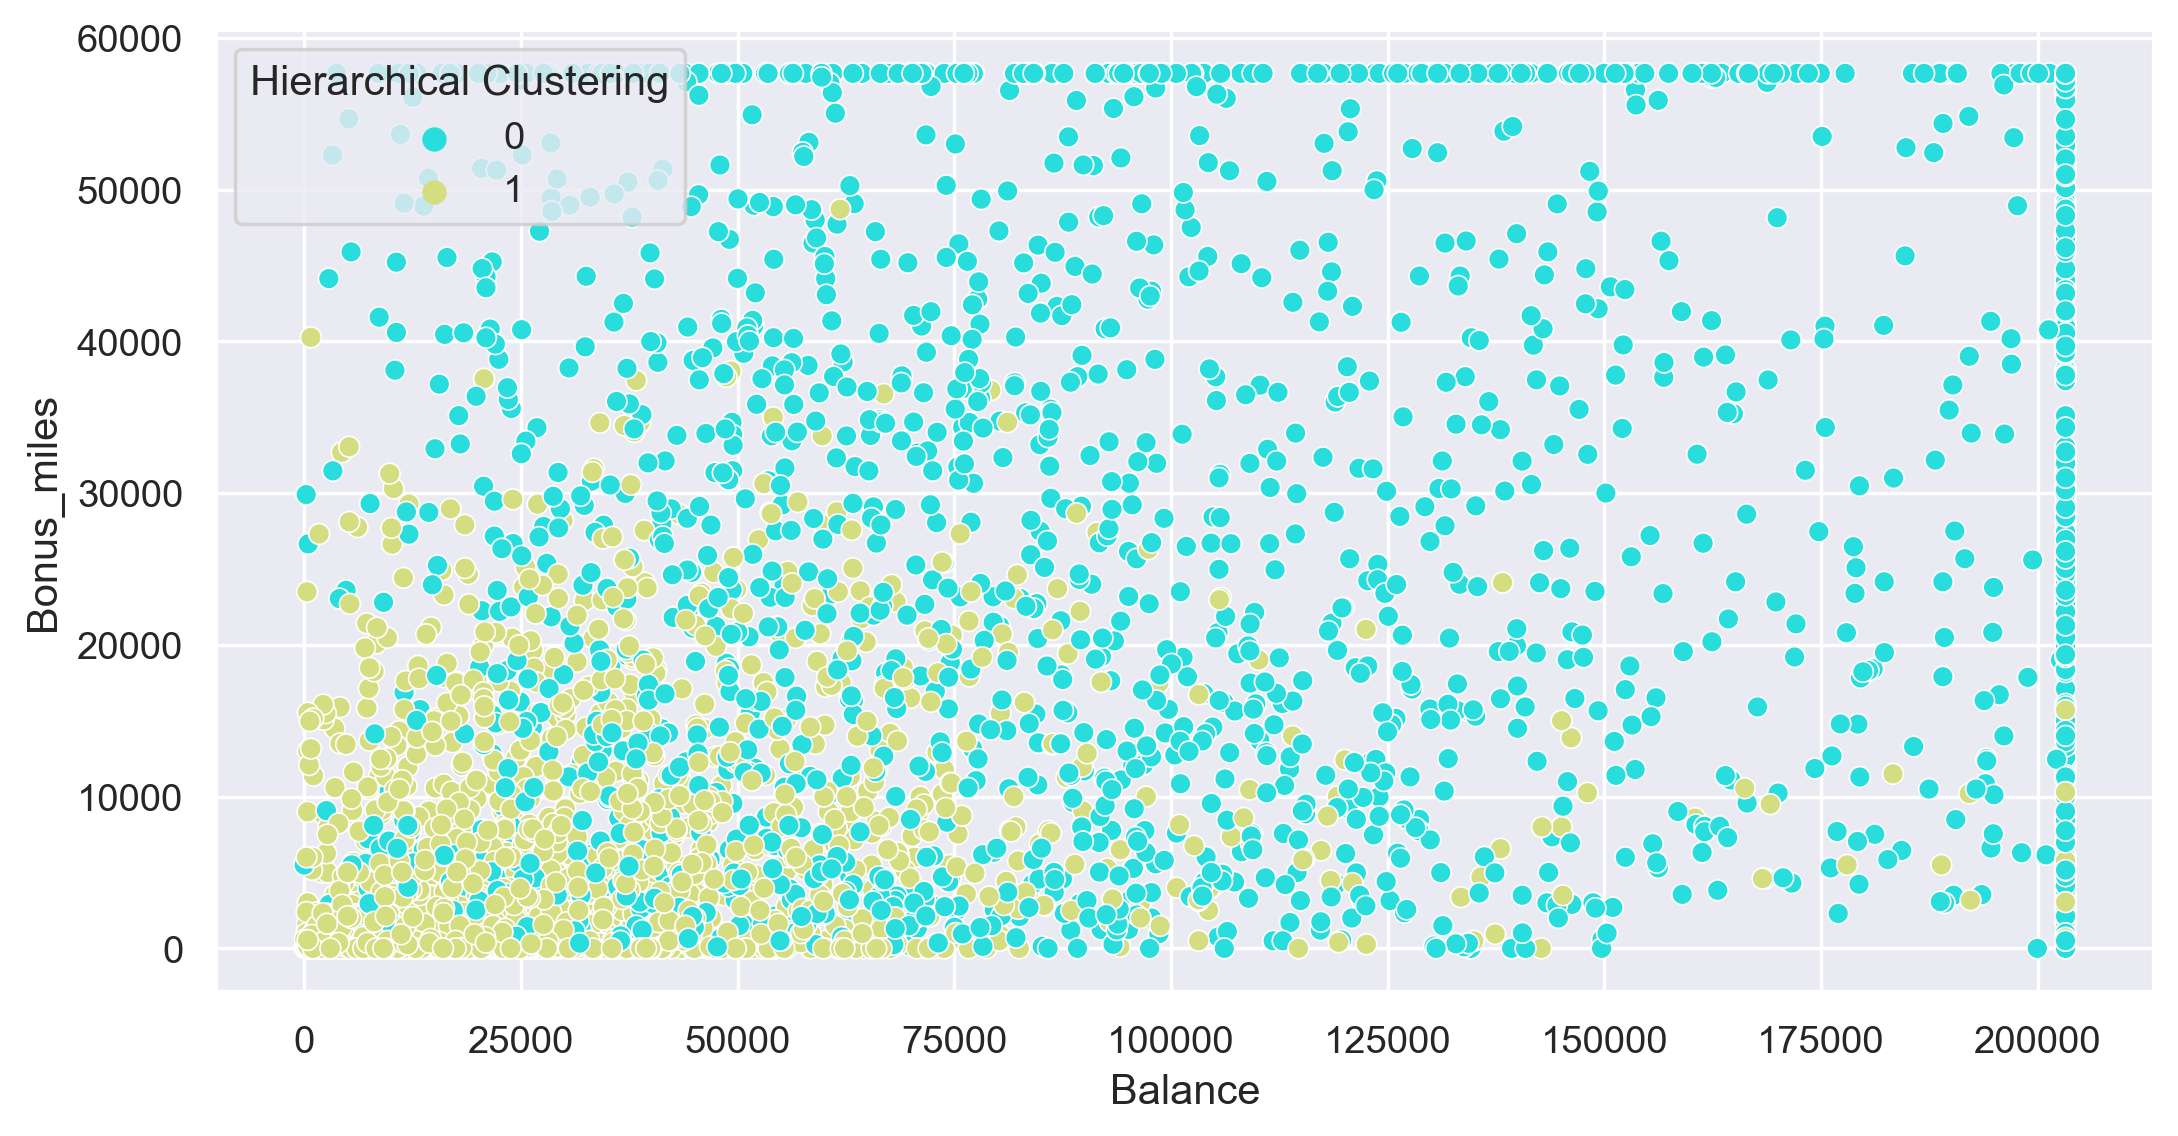

In [164]:
sns.scatterplot(x = df['Balance'],y=  df['Bonus_miles'], hue=df['Hierarchical Clustering'], palette='rainbow')

# K-Means Clustering

In [165]:
x

array([[-0.60754076,  0.        , -0.76973166, ..., -0.62625242,
         1.39523468, -0.76707163],
       [-0.75923491,  0.        , -0.76973166, ..., -0.62625242,
         1.37973643, -0.76707163],
       [-0.38234339,  0.        , -0.76973166, ..., -0.62625242,
         1.41170157, -0.76707163],
       ...,
       [ 0.1672773 ,  0.        ,  0.68289387, ..., -0.62625242,
        -1.31599028,  1.30365921],
       [-0.15145258,  0.        , -0.76973166, ...,  0.43219492,
        -1.3164746 , -0.76707163],
       [-1.03586068,  0.        , -0.76973166, ..., -0.62625242,
        -1.31792757, -0.76707163]])

In [166]:
x[:,0].mean()

7.108981848525264e-17

In [177]:
x[:,2].mean()

-1.4217963697050529e-16

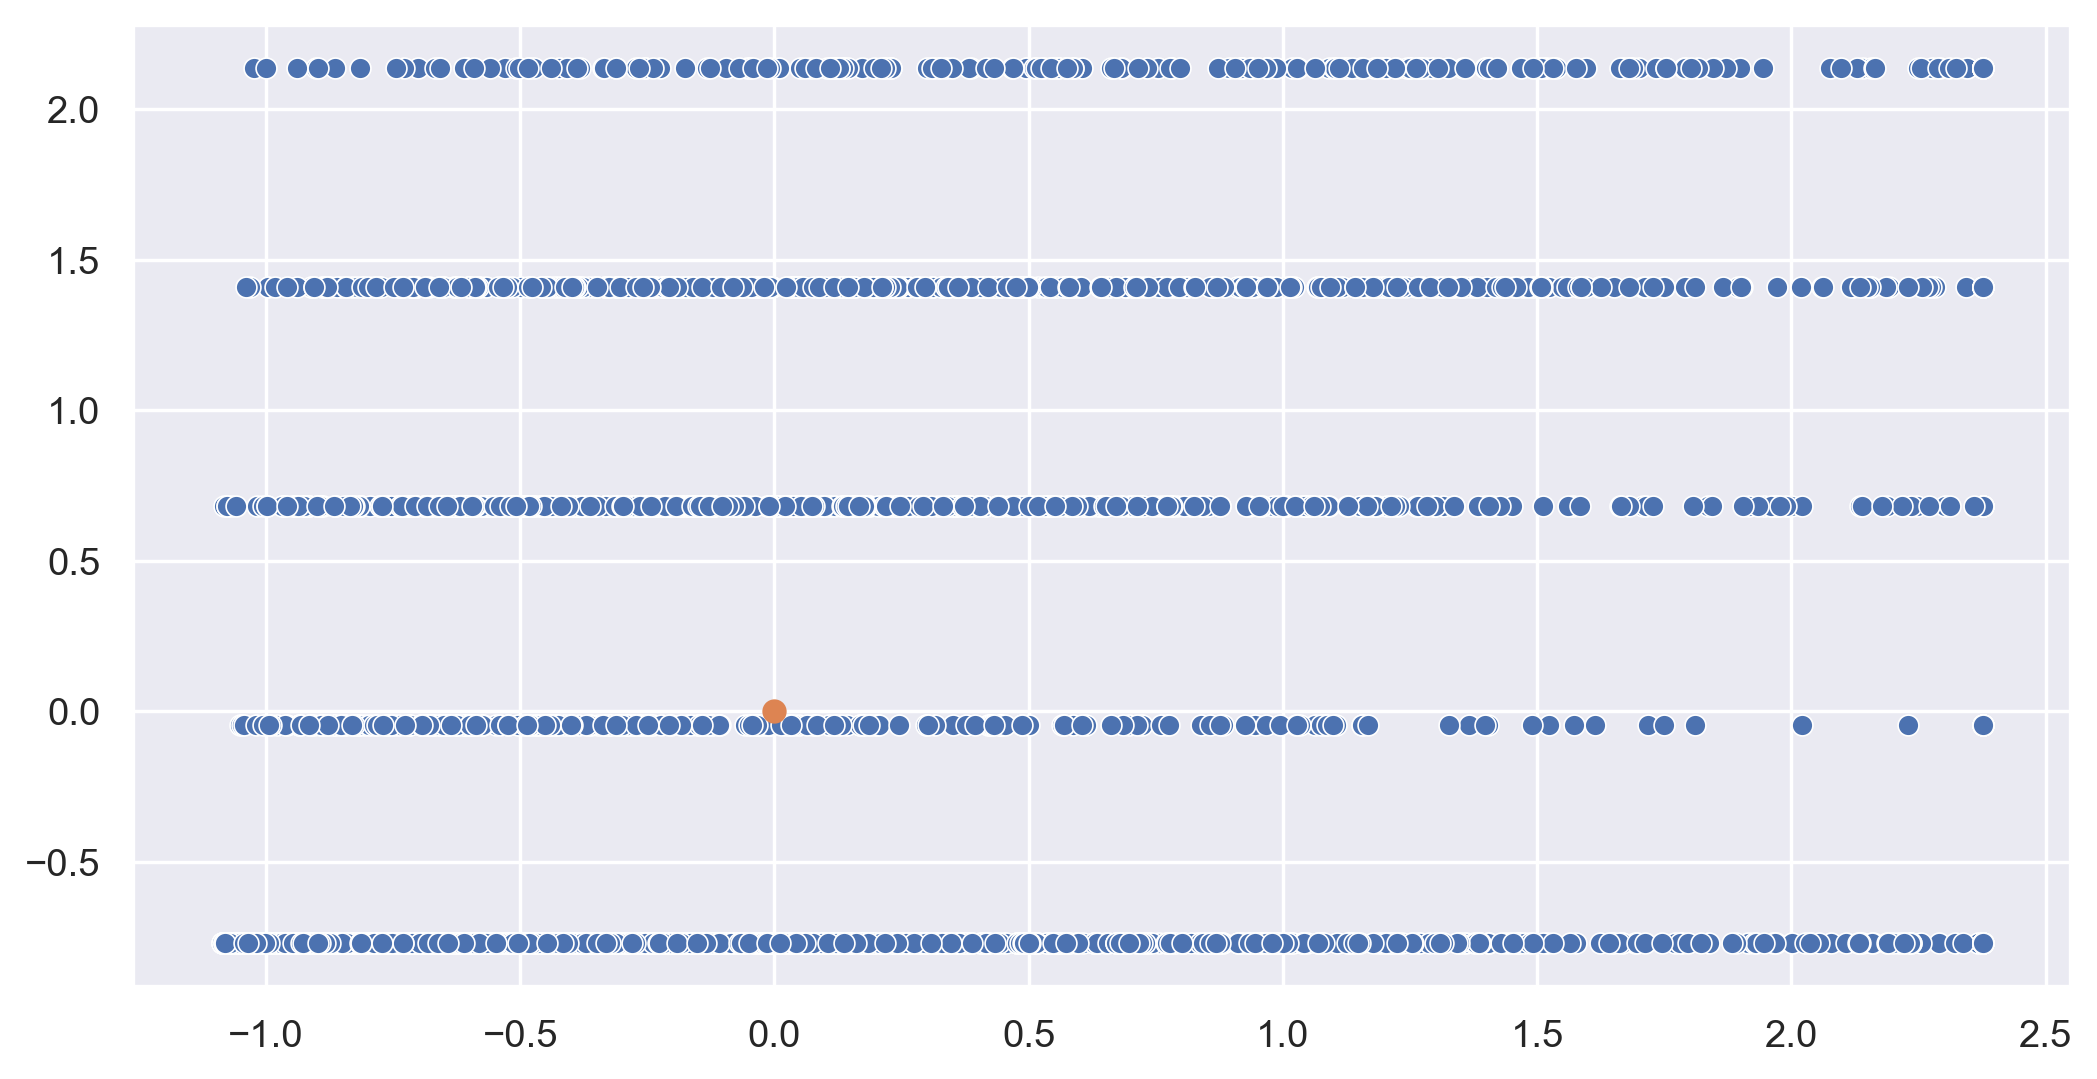

In [170]:
sns.scatterplot(x = x[:,0], y = x[:,2])
plt.scatter(x[:,0].mean(),x[:,2].mean())

# Model Building

In [171]:
from sklearn.cluster import KMeans

In [172]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([4, 4, 4, ..., 1, 6, 3])

In [173]:
len(yp)

3998

# cluster centre

In [174]:
km.cluster_centers_

array([[ 0.77787365,  0.        ,  0.96601032,  0.        ,  0.        ,
         0.73421016,  0.58203859, -0.47641722, -0.48743966,  0.19771439,
        -0.76329981],
       [-0.42792939,  0.        , -0.26326069,  0.        ,  0.        ,
        -0.32761151, -0.2058295 , -0.47027829, -0.47417666,  0.01541732,
         1.30365921],
       [ 0.49251569,  0.        , -0.54361542,  0.        ,  0.        ,
        -0.23221449,  0.19234841,  1.69415125,  1.73694762,  0.13840983,
         1.30365921],
       [-0.625661  ,  0.        , -0.67680275,  0.        ,  0.        ,
        -0.67564199, -0.5992497 , -0.57186358, -0.57398342, -1.04641577,
        -0.76707163],
       [-0.43660942,  0.        , -0.67947349,  0.        ,  0.        ,
        -0.69595817, -0.65017529, -0.57273526, -0.56899723,  0.72286925,
        -0.76707163],
       [ 1.11774791,  0.        ,  1.53642702,  0.        ,  0.        ,
         1.74762514,  1.59154462,  1.70026943,  1.64233057,  0.47302407,
         0.901

# Visualize the clusters

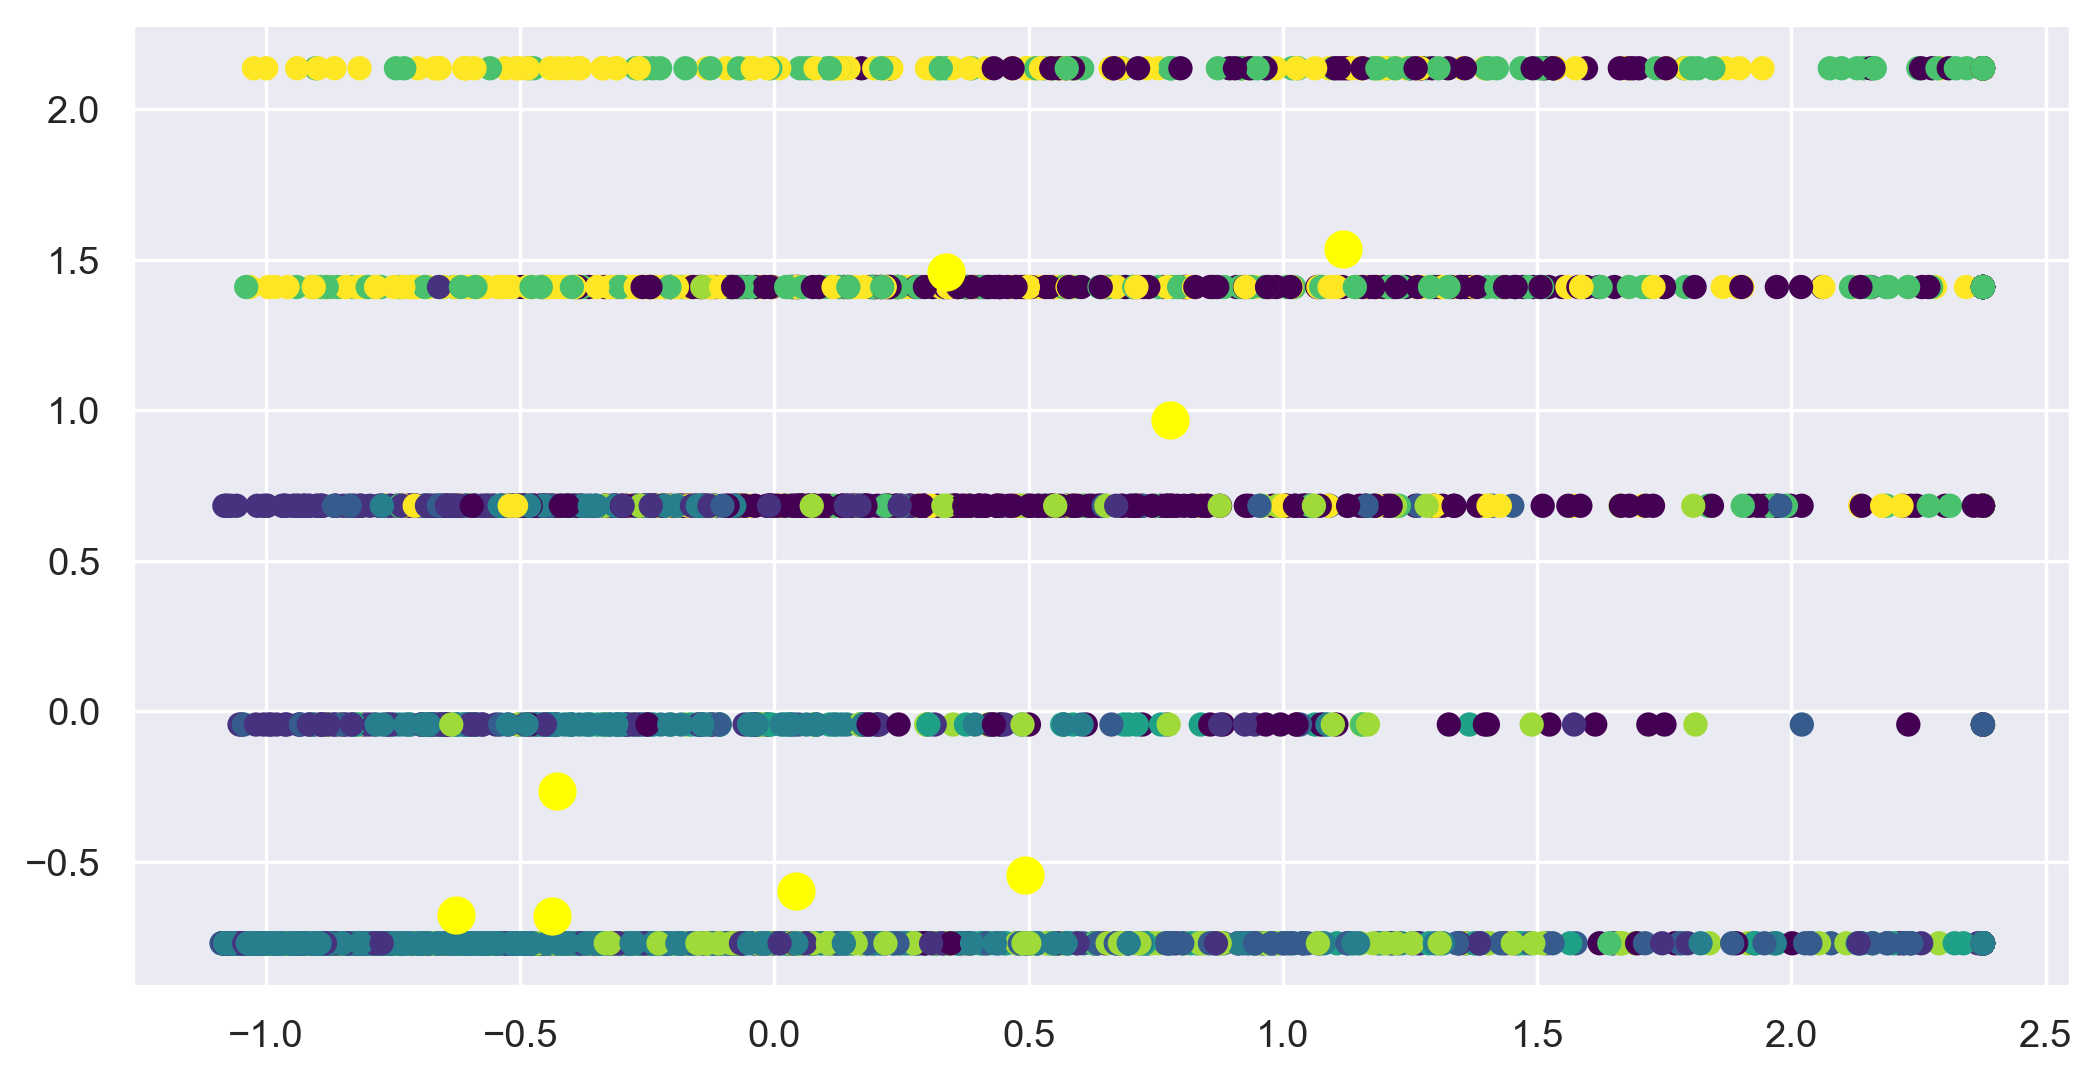

In [179]:
plt.scatter(x[:,0],x[:,2],c = yp, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,2], c = 'yellow', s = 100)

In [180]:
km.inertia_

10669.71007808594

# Elbow graph 

In [181]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [182]:
wcss

[31983.999999999993,
 22255.45630717514,
 17641.21241227983,
 15200.718980021087,
 13695.677737240381,
 12408.625531023363,
 11369.188905015115,
 10669.225516231123,
 10034.604834454756,
 9537.878824963804]

Text(0.5, 1.0, 'Elbow Graph')

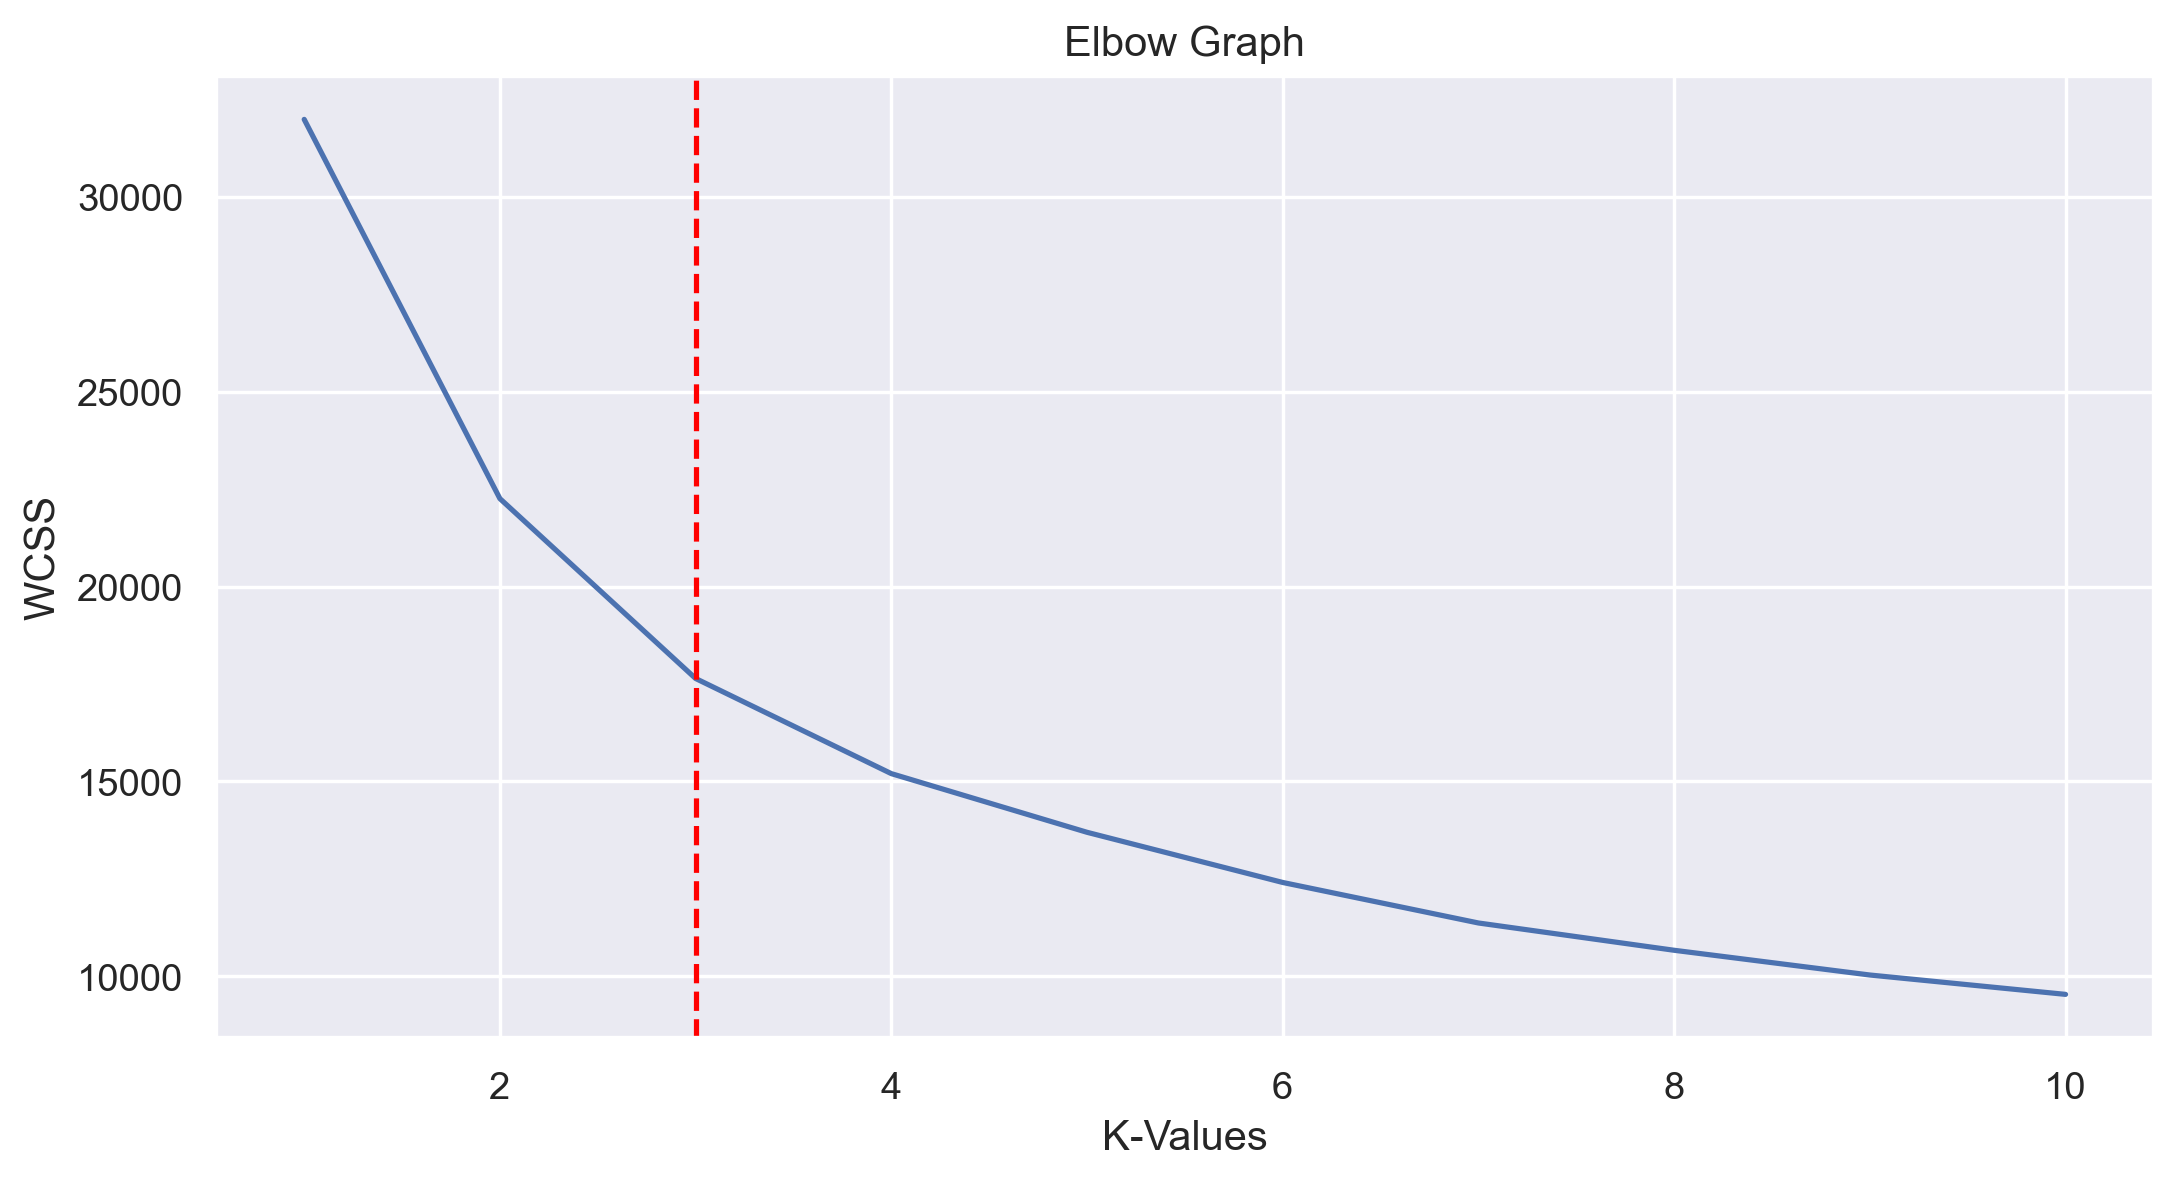

In [184]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 3, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Final Model

In [209]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0])

# Visualize the clusters

In [210]:
km.cluster_centers_

array([[-0.49509462,  0.        , -0.65304649,  0.        ,  0.        ,
        -0.64515326, -0.57537552, -0.48493647, -0.47962768, -0.23828936,
        -0.43041602],
       [ 0.51682829,  0.        ,  1.153249  ,  0.        ,  0.        ,
         0.99739224,  0.65784946, -0.39737421, -0.39456686,  0.30954608,
         0.37455745],
       [ 0.56268186,  0.        ,  0.1075263 ,  0.        ,  0.        ,
         0.297243  ,  0.57691131,  1.76734955,  1.75007831,  0.18898941,
         0.58978868]])

In [211]:
km.cluster_centers_[:,0]

array([-0.49509462,  0.51682829,  0.56268186])

In [212]:
km.cluster_centers_[:,1]

array([0., 0., 0.])

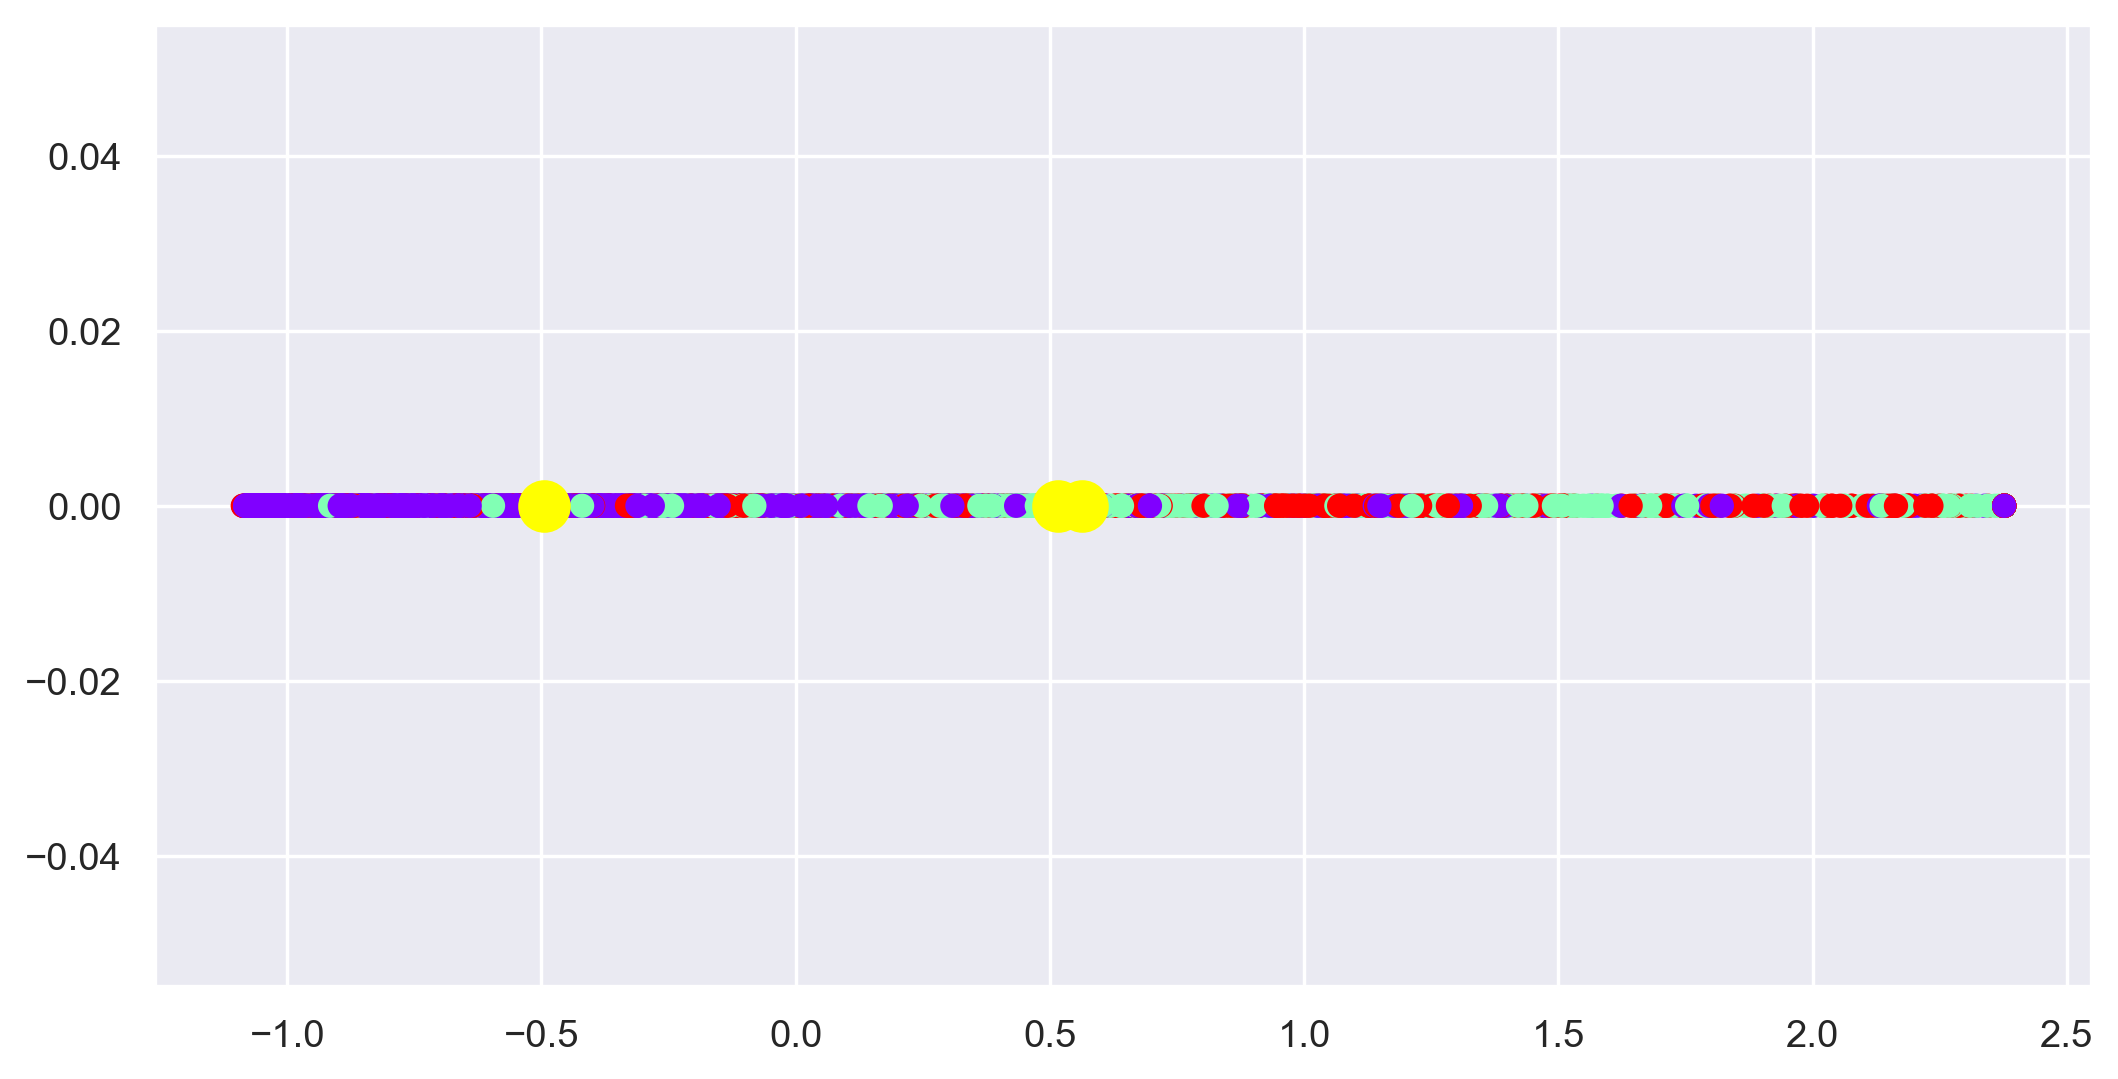

In [213]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

# Evaluation of Kmeans

# Silhouette score

In [214]:
from sklearn.metrics import silhouette_score

In [215]:
silhouette_score(x,ypred)

0.3091190922505733

# Analyzing clusters

In [216]:
df['Kmeans cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0           0          1          1          1        174.0   
2     19244.0           0          1          1          1        215.0   
3     41354.0           0          1          1          1       4123.0   
4     14776.0           0          1          1          1        500.0   
5     97752.0           0          4          1          1      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0           0          1          1          1       8525.0   
4018  64385.0           0          1          1          1        981.0   
4019  73597.0           0          3          1          1      25447.0   
4020  54899.0           0          1          1          1        500.0   
4021   3016.0           0          1          1          1          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1               0.00              0.0               7000   
2               2               0.00              0.0               6968   
3               4               0.00              0.0               7034   
4               1               0.00              0.0               6952   
5              26             783.75              2.5               6935   
...           ...                ...              ...                ...   
4017            4             200.00              1.0               1403   
4018            5               0.00              0.0               1395   
4019            8               0.00              0.0               1402   
4020            1             500.00              1.0               1401   
4021            0               0.00              0.0               1398   

      Award  Hierarchical Clustering  Kmeans cluster  
ID#                                                   
1         0                        1               0  
2         0                        1               0  
3         0                        1               0  
4         0                        1               0  
5         1                        0               2  
...     ...                      ...             ...  
4017      1                        1               0  
4018      1                        1               0  
4019      1                        1               1  
4020      0                        0               0  
4021      0                        1               0  

[3998 rows x 13 columns]

In [217]:
df.groupby('Kmeans cluster').agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Kmeans cluster                                                              
0               34763.120915         0.0   1.162422        1.0        1.0   
1               94166.493631         0.0   3.648772        1.0        1.0   
2               96793.050275         0.0   2.207824        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Kmeans cluster                                                                  
0                3765.780334     6.236905          35.183566         0.138395   
1               33477.794586    17.475887          61.288899         0.219290   
2               20789.721271    16.731051         702.967298         2.245110   

                Days_since_enroll     Award  Hierarchical Clustering  
Kmeans cluster                                                        
0                     3627.415666  0.162422                 0.825565  
1                     4759.941765  0.552320                 0.232029  
2                     4509.405868  0.655257                 0.053790

# DBSCAN

In [218]:
from sklearn.cluster import DBSCAN

In [219]:
db = DBSCAN(eps=0.5, min_samples=5)

y = db.fit_predict(x)

In [220]:
y

array([ 0,  0,  0, ..., -1, 30,  0], dtype=int64)

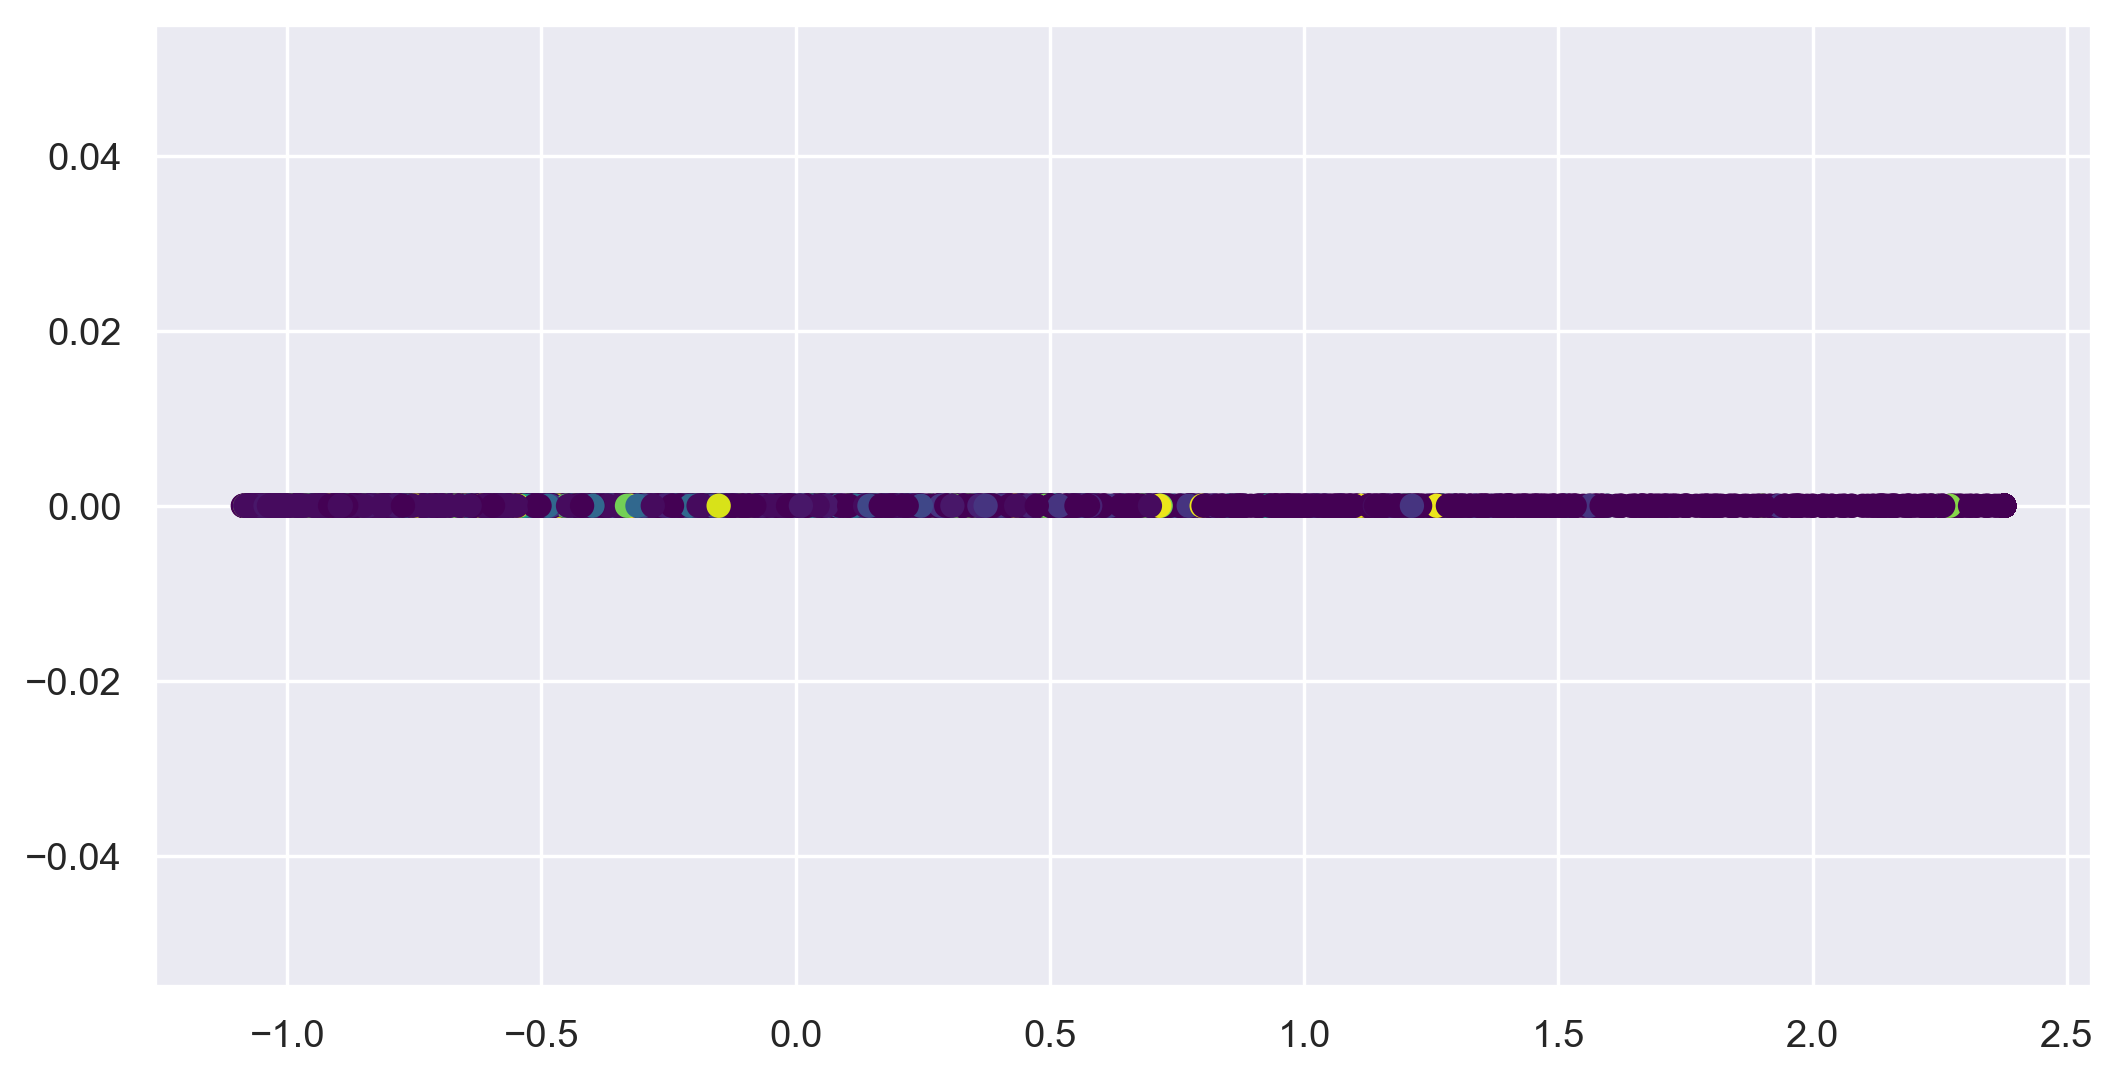

In [221]:
plt.scatter(x[:,0],x[:,1],c = y,cmap='viridis')

In [222]:
from sklearn.metrics import silhouette_score

In [223]:
silhouette_score(x,y)

-0.16726195555591128

# Hyperparameter tuning

# Selecting Min_samples:
1. Number of columns + 1
2. Number of columns * 2
3. Always keep min_sample at least 3.

# Finding out the best eps value(K-dist Plot)
- This technique calculates the average distance between each point and its k nearest neighbors, where k is the MinPts value you selected. 
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [224]:
from sklearn.neighbors import NearestNeighbors

In [225]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [226]:
pd.DataFrame(d)

0         1         2
0     0.0  0.127123  0.180444
1     0.0  0.126735  0.134722
2     0.0  0.209409  0.233434
3     0.0  0.053716  0.073964
4     0.0  0.577906  0.706328
...   ...       ...       ...
3993  0.0  0.458341  0.573863
3994  0.0  0.262287  0.364547
3995  0.0  0.233561  0.335973
3996  0.0  0.362315  0.444130
3997  0.0  0.004181  0.011596

[3998 rows x 3 columns]

In [227]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilon value')

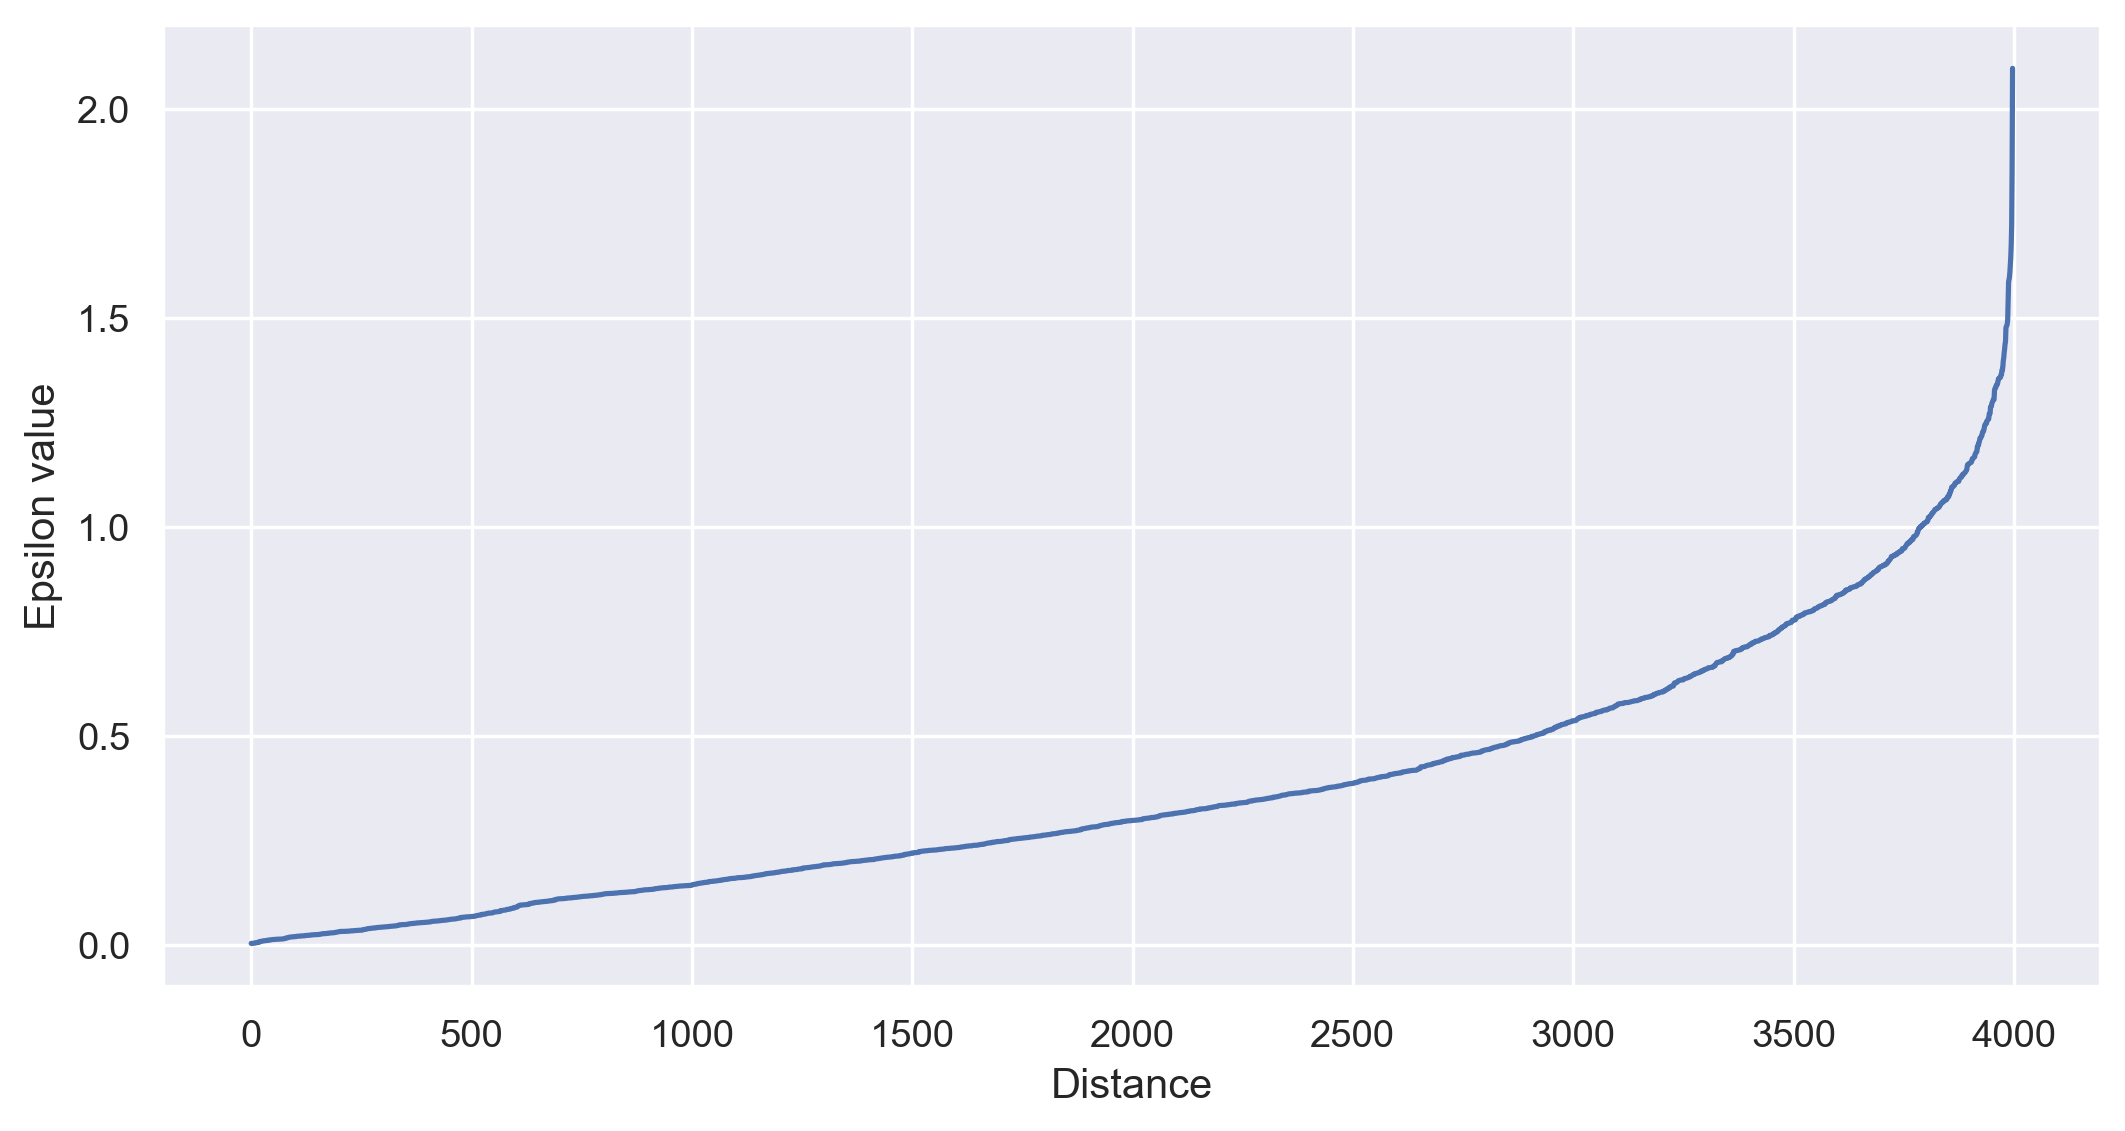

In [228]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [245]:
db = DBSCAN(eps=2,min_samples=3)
ypred = db.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Evalute the model

In [246]:
silhouette_score(x,ypred)

0.21291934782944041

In [247]:
df['DBSCAN'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0           0          1          1          1        174.0   
2     19244.0           0          1          1          1        215.0   
3     41354.0           0          1          1          1       4123.0   
4     14776.0           0          1          1          1        500.0   
5     97752.0           0          4          1          1      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0           0          1          1          1       8525.0   
4018  64385.0           0          1          1          1        981.0   
4019  73597.0           0          3          1          1      25447.0   
4020  54899.0           0          1          1          1        500.0   
4021   3016.0           0          1          1          1          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1               0.00              0.0               7000   
2               2               0.00              0.0               6968   
3               4               0.00              0.0               7034   
4               1               0.00              0.0               6952   
5              26             783.75              2.5               6935   
...           ...                ...              ...                ...   
4017            4             200.00              1.0               1403   
4018            5               0.00              0.0               1395   
4019            8               0.00              0.0               1402   
4020            1             500.00              1.0               1401   
4021            0               0.00              0.0               1398   

      Award  Hierarchical Clustering  Kmeans cluster  DBSCAN  
ID#                                                           
1         0                        1               0       0  
2         0                        1               0       0  
3         0                        1               0       0  
4         0                        1               0       0  
5         1                        0               2       1  
...     ...                      ...             ...     ...  
4017      1                        1               0       1  
4018      1                        1               0       1  
4019      1                        1               1       1  
4020      0                        0               0       0  
4021      0                        1               0       0  

[3998 rows x 14 columns]

In [250]:
df.groupby("DBSCAN").agg('mean')

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN                                                               
-1      122117.520833         0.0   2.833333        1.0        1.0   
 0       55997.795197         0.0   1.702068        1.0        1.0   
 1       76790.652233         0.0   2.665088        1.0        1.0   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN                                                                  
-1      56159.895833    35.666667         547.500000         2.083333   
 0       9896.636784     9.086317         111.780330         0.371718   
 1      24639.765139    15.435724         291.813261         0.959743   

        Days_since_enroll  Award  Hierarchical Clustering  Kmeans cluster  
DBSCAN                                                                     
-1            3162.333333    0.5                 0.166667        1.666667  
 0            3821.741846    0.0                 0.568815        0.418059  
 1            4629.018268    1.0                 0.396482        1.132612

In [252]:
df[df['DBSCAN']==-1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                          
247   118934.000           0          5          1          1    57651.875   
1544   57857.000           0          1          1          1    57651.875   
3338  203211.125           0          5          1          1    57651.875   
3389   61841.000           0          1          1          1    48700.000   
3606  160114.000           0          1          1          1    57651.875   
3940  130748.000           0          4          1          1    57651.875   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
247            37             783.75              2.5               7354   
1544           37             783.75              2.5               4996   
3338           27             150.00              2.5               2047   
3389           38               0.00              0.0               1659   
3606           38             783.75              2.5               1373   
3940           37             783.75              2.5               1545   

      Award  Hierarchical Clustering  Kmeans cluster  DBSCAN  
ID#                                                           
247       0                        0               2      -1  
1544      1                        0               2      -1  
3338      0                        0               1      -1  
3389      1                        1               1      -1  
3606      1                        0               2      -1  
3940      0                        0               2      -1

In [253]:
df[df['DBSCAN']==0]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0           0          1          1          1        174.0   
2     19244.0           0          1          1          1        215.0   
3     41354.0           0          1          1          1       4123.0   
4     14776.0           0          1          1          1        500.0   
6     16420.0           0          1          1          1          0.0   
...       ...         ...        ...        ...        ...          ...   
4014  39142.0           0          3          1          1      14981.0   
4015  11181.0           0          1          1          1        929.0   
4016   3974.0           0          1          1          1        365.0   
4020  54899.0           0          1          1          1        500.0   
4021   3016.0           0          1          1          1          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                0.0              0.0               7000   
2               2                0.0              0.0               6968   
3               4                0.0              0.0               7034   
4               1                0.0              0.0               6952   
6               0                0.0              0.0               6942   
...           ...                ...              ...                ...   
4014           28                0.0              0.0               1408   
4015           12                0.0              0.0               1407   
4016            3                0.0              0.0               1397   
4020            1              500.0              1.0               1401   
4021            0                0.0              0.0               1398   

      Award  Hierarchical Clustering  Kmeans cluster  DBSCAN  
ID#                                                           
1         0                        1               0       0  
2         0                        1               0       0  
3         0                        1               0       0  
4         0                        1               0       0  
6         0                        1               0       0  
...     ...                      ...             ...     ...  
4014      0                        1               1       0  
4015      0                        1               0       0  
4016      0                        1               0       0  
4020      0                        0               0       0  
4021      0                        1               0       0  

[2514 rows x 14 columns]